# bout t

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Image**

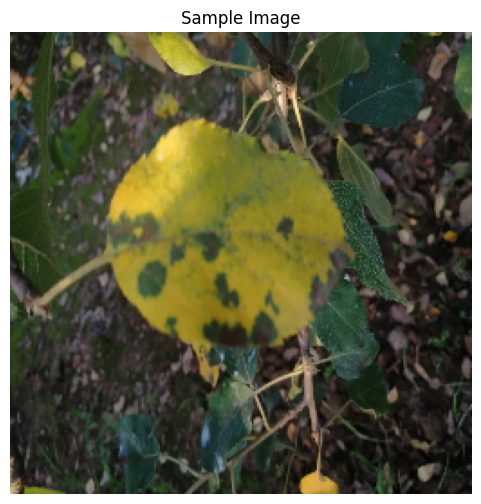

In [1]:
import cv2
import matplotlib.pyplot as plt

# ---- Read image ----
image_path = "/kaggle/input/apple-data/Apple/Brown spot/image/褐斑病IMG_20190726_190315.jpg"  # change this path
img = cv2.imread(image_path)

# Check if image is loaded properly
if img is None:
    print("❌ Error: Image not found or path is incorrect.")
else:
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---- Display image ----
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")  # remove axes
    plt.title("Sample Image", fontsize=12)
    plt.show()


**Different class**

Discovered 1641 paired samples.


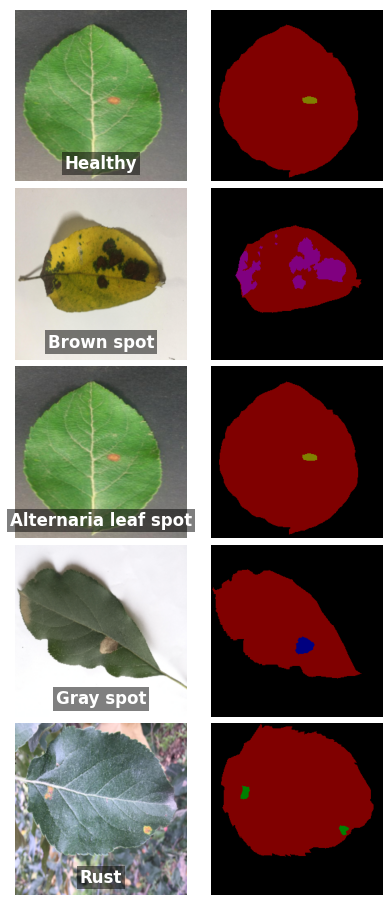


✅ Saved figure to: ./image_output/step1_data_collection_vertical.png


In [2]:
import matplotlib.pyplot as plt
import cv2, os
import numpy as np
from pathlib import Path

# ------------ Parameters ------------
BASE_DIR = "/kaggle/input/apple-data/Apple"   # change if needed
IMG_SIZE = 512
OUTPUT_DIR = "./image_output"  # <-- all figures saved here
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "step1_data_collection_vertical.png")

CLASS_NAMES = ["Background", "Healthy", "Brown spot", "Alternaria leaf spot", "Gray spot", "Rust"]

PALETTE = {
    0: (0, 0, 0),
    1: (128, 0, 0),
    2: (128, 0, 128),
    3: (128, 128, 0),
    4: (0, 0, 128),
    5: (0, 128, 0),
}

# ------------ Helper functions ------------
def list_images_recursive(folder, exts=(".png",".jpg",".jpeg",".bmp",".tif",".tiff")):
    paths = []
    for p in Path(folder).rglob("*"):
        if p.is_file() and p.suffix.lower() in exts:
            paths.append(str(p))
    return sorted(paths)

def discover_pairs(base_dir):
    base = Path(base_dir)
    pairs = []
    for cls_folder in sorted(base.iterdir()):
        if not cls_folder.is_dir():
            continue
        img_dir = cls_folder / "image"
        msk_dir = cls_folder / "label"
        if img_dir.exists() and msk_dir.exists():
            img_files = {p.stem.lower(): str(p) for p in img_dir.iterdir() if p.is_file()}
            msk_files = {p.stem.lower(): str(p) for p in msk_dir.iterdir() if p.is_file()}
            common = sorted(set(img_files.keys()) & set(msk_files.keys()))
            for s in common:
                pairs.append((img_files[s], msk_files[s]))
    return pairs

def rgb_mask_to_classes(mask_rgb):
    h, w, _ = mask_rgb.shape
    out = np.zeros((h, w), dtype=np.uint8)
    for cls, (r, g, b) in PALETTE.items():
        m = (mask_rgb[:, :, 0] == r) & (mask_rgb[:, :, 1] == g) & (mask_rgb[:, :, 2] == b)
        out[m] = cls
    return out

def colorize_mask(mask):
    h, w = mask.shape
    out = np.zeros((h, w, 3), dtype=np.uint8)
    for cls, col in PALETTE.items():
        out[mask == cls] = col
    return out

# ------------ Data Loading ------------
pairs = discover_pairs(BASE_DIR)
print(f"Discovered {len(pairs)} paired samples.")

target_classes = [1, 2, 3, 4, 5]
found = {c: None for c in target_classes}

for img_path, msk_path in pairs:
    msk = cv2.imread(msk_path)
    if msk is None:
        continue
    msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
    cls_map = rgb_mask_to_classes(msk)
    for c in target_classes:
        if found[c] is None and (cls_map == c).sum() > 0:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            msk = cv2.resize(msk, (IMG_SIZE, IMG_SIZE))
            found[c] = {"img": img, "mask": cls_map}

# ------------ Visualization ------------
n = len(target_classes)
fig, axes = plt.subplots(n, 2, figsize=(5, 2.3 * n))  # vertical layout

for i, c in enumerate(target_classes):
    data = found[c]
    ax_img, ax_mask = axes[i]
    if data is None:
        ax_img.axis("off")
        ax_mask.axis("off")
        continue

    img = data["img"]
    mask = data["mask"]
    colored = colorize_mask(mask)

    # Image
    ax_img.imshow(img)
    ax_img.axis("off")
    ax_img.text(
        0.5, 0.05, CLASS_NAMES[c],
        color="white", fontsize=12, weight="bold",
        ha="center", va="bottom",
        transform=ax_img.transAxes,
        bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=2)
    )

    # Mask
    ax_mask.imshow(colored)
    ax_mask.axis("off")

plt.subplots_adjust(wspace=0.02, hspace=0.04)
os.makedirs(OUTPUT_DIR, exist_ok=True)
plt.savefig(OUTPUT_FILE, dpi=600, bbox_inches="tight")
plt.show()

print(f"\n✅ Saved figure to: {OUTPUT_FILE}")


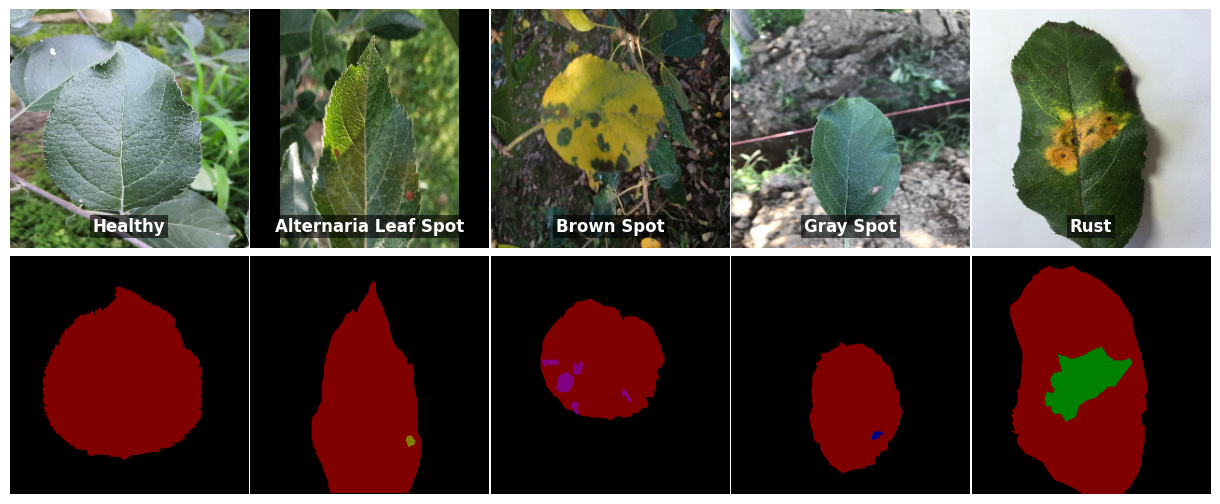


✅ Visualization saved successfully to: ./image_output/step1_data_collection_fixed.png


In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# ---- Image paths ----
images = {
    "Healthy": {
        "img": "/kaggle/input/apple-data/Apple/Healthy leaf/image/IMG_20190726_191225.jpg",
        "mask": "/kaggle/input/apple-data/Apple/Healthy leaf/label/IMG_20190726_191225.png"
    },
    "Alternaria Leaf Spot": {
        "img": "/kaggle/input/apple-data/Apple/Alternaria leaf spot/image/000526.jpg",
        "mask": "/kaggle/input/apple-data/Apple/Alternaria leaf spot/label/000526.png"
    },
    "Brown Spot": {
        "img": "/kaggle/input/apple-data/Apple/Brown spot/image/褐斑病IMG_20190726_190315.jpg",
        "mask": "/kaggle/input/apple-data/Apple/Brown spot/label/褐斑病IMG_20190726_190315.png"
    },
    "Gray Spot": {
        "img": "/kaggle/input/apple-data/Apple/Gray spot/image/003029.jpg",
        "mask": "/kaggle/input/apple-data/Apple/Gray spot/label/003029.png"
    },
    "Rust": {
        "img": "/kaggle/input/apple-data/Apple/Rust/image/004191.JPG",
        "mask": "/kaggle/input/apple-data/Apple/Rust/label/004191.png"
    }
}

IMG_SIZE = 256
OUTPUT_DIR = "./image_output"
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "step1_data_collection_fixed.png")

# ---- Make output folder ----
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---- Visualization ----
fig, axes = plt.subplots(2, len(images), figsize=(12, 5))

for i, (cls_name, paths) in enumerate(images.items()):
    img_path = paths["img"]
    mask_path = paths["mask"]
    
    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Could not read {img_path}")
        axes[0, i].axis("off")
        axes[1, i].axis("off")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    # Load mask
    mask = cv2.imread(mask_path)
    if mask is None:
        print(f"❌ Could not read {mask_path}")
        mask = None
    else:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)
    
    # --- Top: RGB image ---
    axes[0, i].imshow(img)
    axes[0, i].axis("off")
    axes[0, i].text(
        0.5, 0.05, cls_name,
        color="white", fontsize=12, weight="bold",
        ha="center", va="bottom",
        transform=axes[0, i].transAxes,
        bbox=dict(facecolor="black", alpha=0.6, edgecolor="none", pad=2)
    )
    
    # --- Bottom: Mask image ---
    if mask is not None:
        axes[1, i].imshow(mask)
    axes[1, i].axis("off")

# ---- Adjust spacing ----
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout(pad=0)

# ---- Save and show ----
plt.savefig(OUTPUT_FILE, dpi=600, bbox_inches="tight")  # high quality for paper
plt.show()

print(f"\n✅ Visualization saved successfully to: {OUTPUT_FILE}")


**Distribution of image in different classes**

✅ Image counts per class:
  Alternaria leaf spot: 278 images
  Brown spot: 215 images
  Gray spot: 395 images
  Healthy leaf: 409 images
  Rust: 344 images


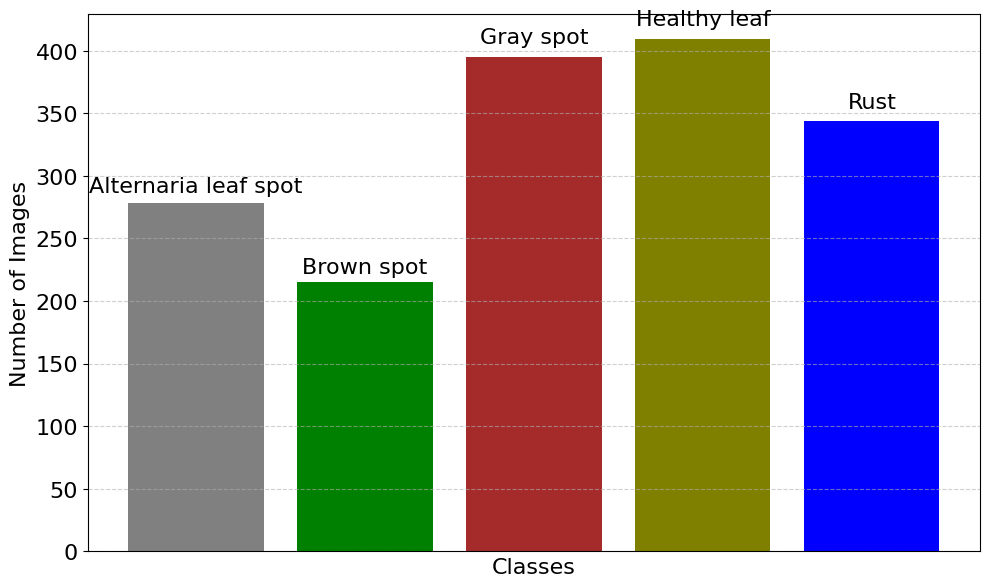


✅ Saved high-quality bar graph (only class names) to: ./image_output/image_count_distribution_nocount.png


In [4]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# ---- Set font to avoid warnings ----
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['figure.figsize'] = [10, 6]

# ---- Base dataset directory ----
BASE_DIR = "/kaggle/input/apple-data/Apple"

# ---- Discover all class folders ----
class_folders = [f for f in sorted(Path(BASE_DIR).iterdir()) if f.is_dir()]

CLASS_NAMES = []
image_counts = []

# ---- Count number of images in each class ----
for cls in class_folders:
    img_dir = cls / "image"
    if img_dir.exists():
        count = len([f for f in img_dir.iterdir() if f.is_file()])
        CLASS_NAMES.append(cls.name)
        image_counts.append(count)

print("✅ Image counts per class:")
for name, count in zip(CLASS_NAMES, image_counts):
    print(f"  {name}: {count} images")

# ---- Ensure output directory exists ----
os.makedirs("./image_output", exist_ok=True)

# ---- Plot bar chart ----
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for bars
colors = ['gray', 'green', 'brown', 'olive', 'blue', 'darkgreen'][:len(CLASS_NAMES)]
bars = ax.bar(range(len(CLASS_NAMES)), image_counts, color=colors)

# ---- Axis labels and style ----
ax.set_ylabel("Number of Images", fontsize=16)
ax.set_xlabel("Classes", fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# ---- Remove x-axis class labels ----
ax.set_xticks([])

# ---- Add only class names (no counts) on top of bars ----
for bar, name in zip(bars, CLASS_NAMES):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.02,          # slightly above the bar
        f"{name}",
        ha='center',
        va='bottom',
        fontsize=16,
        color='black'
    )

# ---- Optimize layout ----
plt.tight_layout()

# ---- Save and show ----
output_path = "./image_output/image_count_distribution_nocount.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')
plt.show()

print(f"\n✅ Saved high-quality bar graph (only class names) to: {output_path}")

✅ Image counts per class:
  Alternaria leaf spot: 278 images
  Brown spot: 215 images
  Gray spot: 395 images
  Healthy leaf: 409 images
  Rust: 344 images


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



✅ Saved AAAI-style bar graphs to:
   PNG: ./image_output/image_count_distribution_aaai.png
   PDF: ./image_output/image_count_distribution_aaai.pdf
   EPS: ./image_output/image_count_distribution_aaai.eps


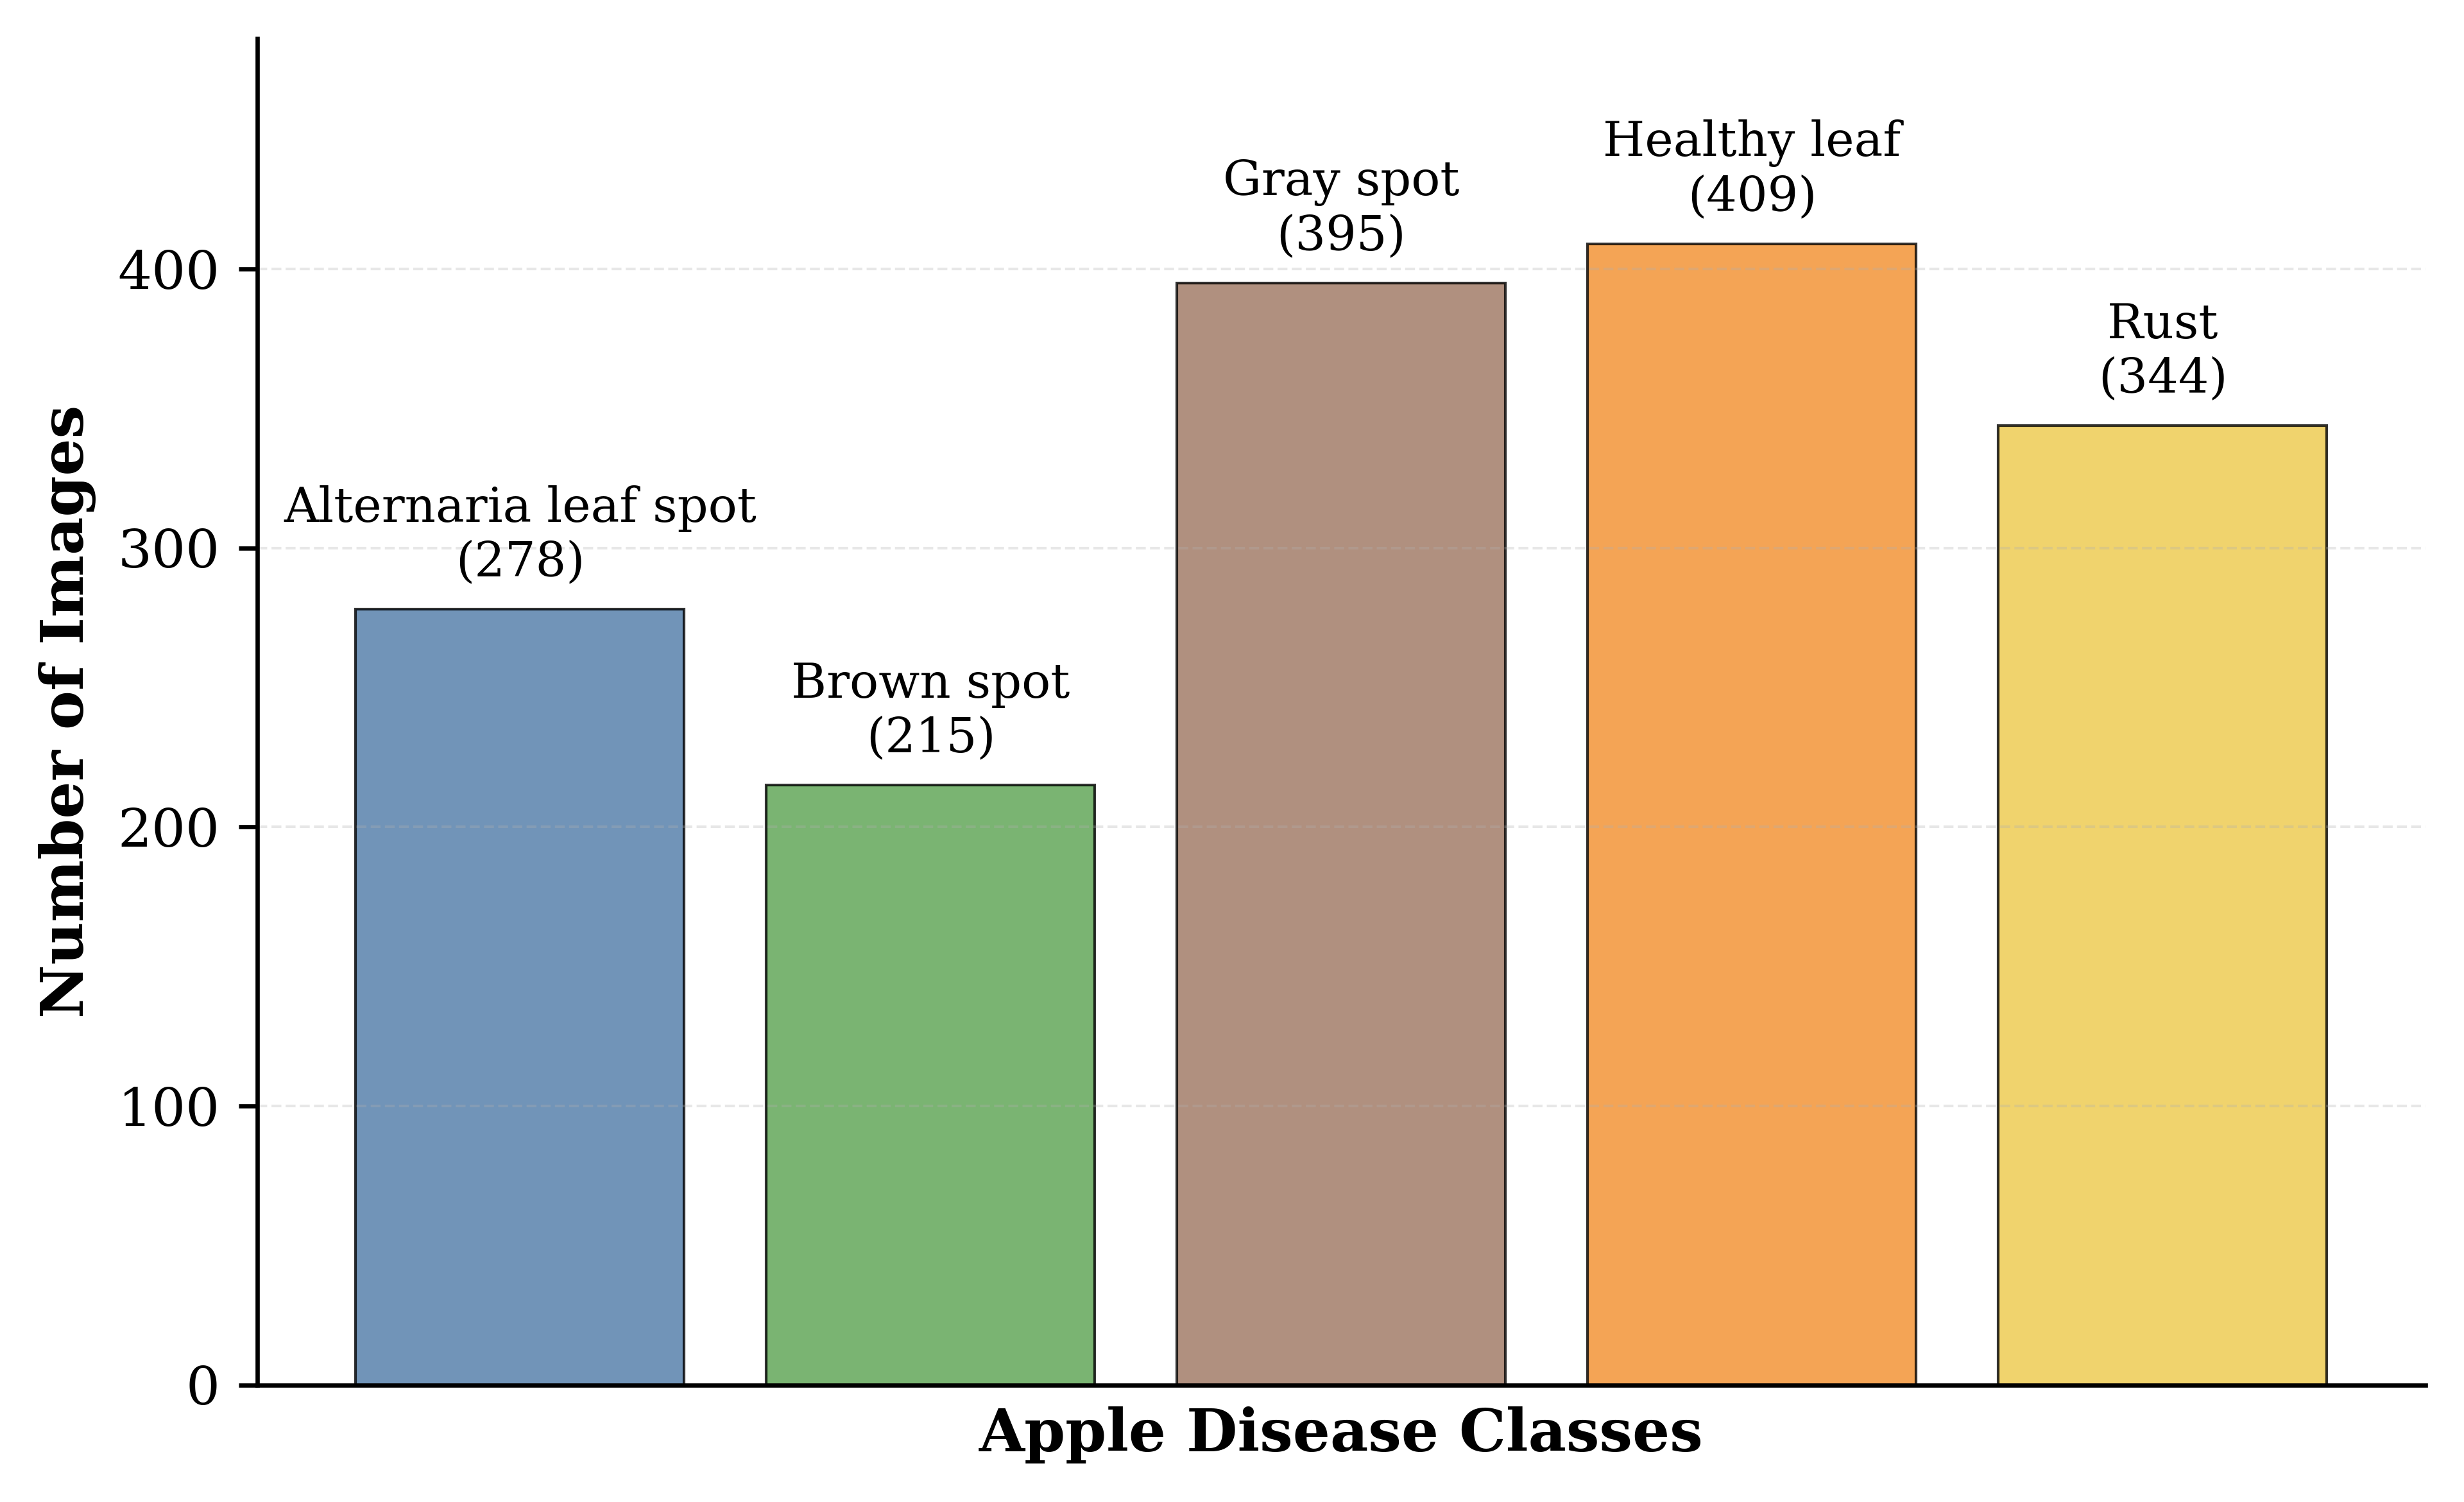


📊 Using font family: ['serif']
📊 Available serif fonts: ['DejaVu Serif', 'Liberation Serif', 'serif']


In [5]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

# ---- AAAI Style Configuration with Font Fallbacks ----
# Check available fonts and use appropriate serif font
available_fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# Choose the best available serif font
if 'Times New Roman' in available_fonts:
    preferred_serif = ['Times New Roman', 'Times', 'DejaVu Serif']
elif 'Times' in available_fonts:
    preferred_serif = ['Times', 'DejaVu Serif', 'Liberation Serif']
else:
    preferred_serif = ['DejaVu Serif', 'Liberation Serif', 'serif']

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': preferred_serif,
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# ---- Base dataset directory ----
BASE_DIR = "/kaggle/input/apple-data/Apple"

# ---- Discover all class folders ----
class_folders = [f for f in sorted(Path(BASE_DIR).iterdir()) if f.is_dir()]

CLASS_NAMES = []
image_counts = []

# ---- Count number of images in each class ----
for cls in class_folders:
    img_dir = cls / "image"
    if img_dir.exists():
        count = len([f for f in img_dir.iterdir() if f.is_file()])
        CLASS_NAMES.append(cls.name)
        image_counts.append(count)

print("✅ Image counts per class:")
for name, count in zip(CLASS_NAMES, image_counts):
    print(f"  {name}: {count} images")

# ---- Ensure output directory exists ----
os.makedirs("./image_output", exist_ok=True)

# ---- Create AAAI-style figure ----
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))  # AAAI column width

# Colors suitable for both print and digital (colorblind-friendly)
colors = ['#4E79A7', '#59A14F', '#9C755F', '#F28E2B', '#EDC948', '#76B7B2'][:len(CLASS_NAMES)]

bars = ax.bar(range(len(CLASS_NAMES)), image_counts, color=colors, 
              edgecolor='black', linewidth=0.5, alpha=0.8)

# ---- Axis labels and style ----
ax.set_ylabel("Number of Images", fontsize=11, fontweight='bold')
ax.set_xlabel("Apple Disease Classes", fontsize=11, fontweight='bold')

# Customize y-axis
ax.tick_params(axis='y', which='major', labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.5)

# Remove x-axis ticks but keep the spine
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ---- Add class names on top of bars ----
for bar, name, count in zip(bars, CLASS_NAMES, image_counts):
    height = bar.get_height()
    # Adjust text position based on bar height
    vertical_offset = max(image_counts) * 0.02
    
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + vertical_offset,
        f"{name}\n({count})",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='normal',
        color='black',
        linespacing=1.2
    )

# Set y-axis limit to accommodate labels
y_max = max(image_counts) * 1.18  # Increased space for two-line labels
ax.set_ylim(0, y_max)

# ---- Add data source/caption if needed ----
# ax.text(0.02, 0.98, 'Dataset: Apple Disease Classification', 
#         transform=ax.transAxes, fontsize=8, va='top', alpha=0.7)

# ---- Optimize layout ----
plt.tight_layout()

# ---- Save in multiple formats for AAAI submission ----
output_base = "./image_output/image_count_distribution_aaai"

try:
    # Save as PNG for review
    plt.savefig(f"{output_base}.png", dpi=600, bbox_inches='tight')
    # Save as PDF for AAAI submission
    plt.savefig(f"{output_base}.pdf", bbox_inches='tight')
    
    print(f"\n✅ Saved AAAI-style bar graphs to:")
    print(f"   PNG: {output_base}.png")
    print(f"   PDF: {output_base}.pdf")
    
    # EPS might not be available in all environments
    try:
        plt.savefig(f"{output_base}.eps", bbox_inches='tight', format='eps')
        print(f"   EPS: {output_base}.eps")
    except Exception as e:
        print(f"   Note: EPS format not available: {e}")
        
except Exception as e:
    print(f"Error saving figures: {e}")
    # Fallback: save just PNG
    plt.savefig(f"{output_base}.png", dpi=300, bbox_inches='tight')

plt.show()

# Print font information for debugging
print(f"\n📊 Using font family: {plt.rcParams['font.family']}")
print(f"📊 Available serif fonts: {preferred_serif[:3]}")

🔍 Analyzing mask color distribution...
✅ Found 1641 label images
Mask 1: 2 unique colors
Mask 2: 2 unique colors
Mask 3: 2 unique colors
Mask 4: 2 unique colors
Mask 5: 2 unique colors
🎨 Unique colors found: {(128, 0, 0), (0, 0, 0)}
✅ Processed 1641/1641 masks successfully


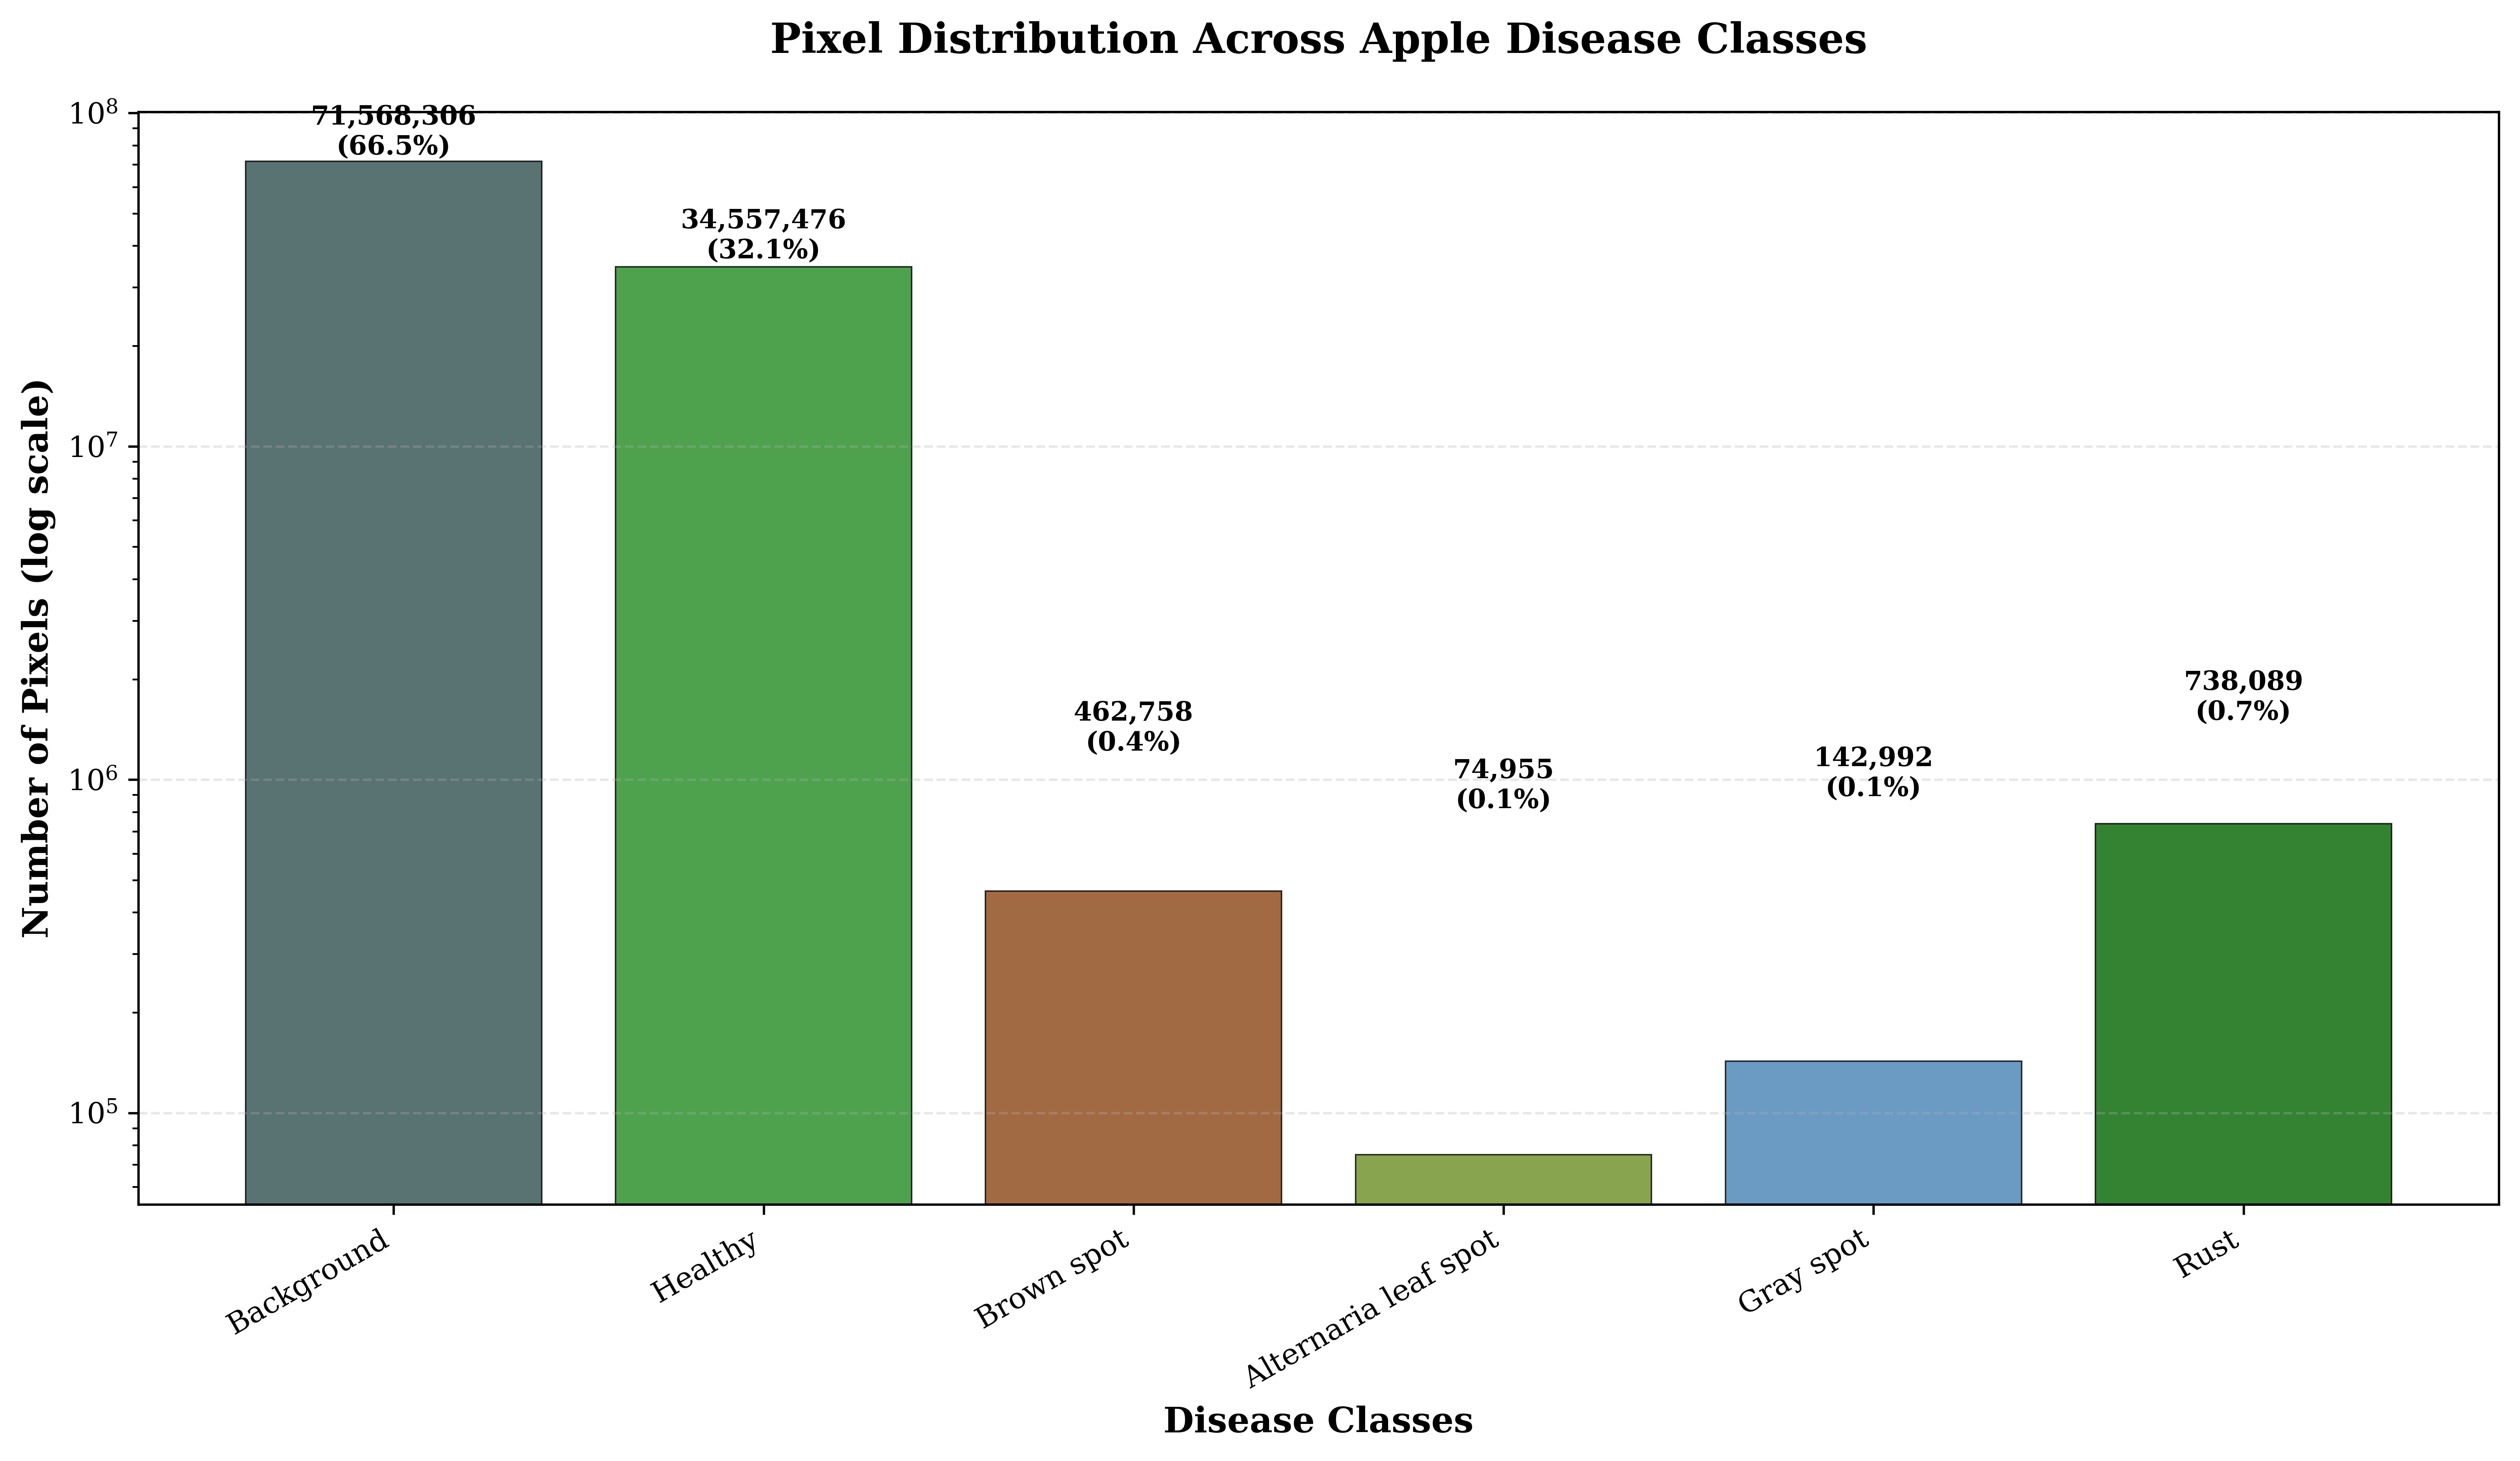


📊 PIXEL DISTRIBUTION STATISTICS:
Background          :   71,568,306 pixels ( 66.55%)
Healthy             :   34,557,476 pixels ( 32.13%)
Brown spot          :      462,758 pixels (  0.43%)
Alternaria leaf spot:       74,955 pixels (  0.07%)
Gray spot           :      142,992 pixels (  0.13%)
Rust                :      738,089 pixels (  0.69%)
TOTAL               :  107,544,576 pixels (100.00%)

⚖️ CLASS IMBALANCE ANALYSIS:
Max/Min ratio: 954.82:1
⚠️  Significant class imbalance detected!


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# === CONFIG ===
BASE_DIR = "/kaggle/input/apple-data/Apple"
CLASS_NAMES = ["Background", "Healthy", "Brown spot", "Alternaria leaf spot", "Gray spot", "Rust"]
COLOR_MAP = {
    (0,   0,   0): 0,   # Background - Black
    (128, 0,   0): 1,   # Healthy - Maroon
    (128, 0, 128): 2,   # Brown spot - Purple
    (128, 128, 0): 3,   # Alternaria - Olive
    (0,   0, 128): 4,   # Gray spot - Navy
    (0, 128,   0): 5,   # Rust - Green
}

# === READ ALL MASKS AND COLLECT PIXELS ===
def get_label_paths(base_dir):
    """Get all label image paths with error handling"""
    label_paths = []
    base_path = Path(base_dir)
    
    for class_folder in base_path.iterdir():
        if class_folder.is_dir():
            label_dir = class_folder / "label"
            if label_dir.exists():
                for img_file in label_dir.glob("*.*"):
                    if img_file.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                        label_paths.append(img_file)
    
    print(f"✅ Found {len(label_paths)} label images")
    return label_paths

def rgb_to_class(mask, color_map):
    """Convert RGB mask to class mask with validation"""
    if mask is None:
        return None
        
    h, w, _ = mask.shape
    class_mask = np.zeros((h, w), dtype=np.uint8)
    
    # Set unknown pixels to background
    class_mask[:, :] = 0
    
    for color, cls_id in color_map.items():
        # Handle slight color variations
        color_tolerance = 2
        color_match = np.all(np.abs(mask - color) <= color_tolerance, axis=-1)
        class_mask[color_match] = cls_id
    
    return class_mask

def analyze_mask_colors(mask_path, color_map):
    """Analyze unique colors in a mask for debugging"""
    mask = cv2.imread(str(mask_path))
    if mask is None:
        return set()
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    unique_colors = set(tuple(pixel) for pixel in mask.reshape(-1, 3))
    return unique_colors

# === COLLECT ALL UNIQUE COLORS FOR DEBUGGING ===
print("🔍 Analyzing mask color distribution...")
label_paths = get_label_paths(BASE_DIR)

if not label_paths:
    print("❌ No label images found! Check the directory structure.")
    exit()

# Debug: Check unique colors in first few masks
all_colors = set()
for i, path in enumerate(label_paths[:5]):  # Check first 5 masks
    colors = analyze_mask_colors(path, COLOR_MAP)
    all_colors.update(colors)
    print(f"Mask {i+1}: {len(colors)} unique colors")

print(f"🎨 Unique colors found: {all_colors}")

# === COUNT PIXELS PER CLASS ===
pixel_counts = np.zeros(len(CLASS_NAMES), dtype=np.int64)
processed_count = 0

for path in label_paths:
    mask = cv2.imread(str(path))
    if mask is None:
        print(f"⚠️ Could not read: {path}")
        continue
        
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    class_mask = rgb_to_class(mask, COLOR_MAP)
    
    if class_mask is not None:
        for i in range(len(CLASS_NAMES)):
            pixel_counts[i] += np.sum(class_mask == i)
        processed_count += 1

print(f"✅ Processed {processed_count}/{len(label_paths)} masks successfully")

# === CALCULATE PERCENTAGES ===
total_pixels = np.sum(pixel_counts)
percentages = (pixel_counts / total_pixels * 100) if total_pixels > 0 else np.zeros(len(CLASS_NAMES))

# === ENHANCED PLOT ===
plt.figure(figsize=(12, 7))

# Create bar plot
bars = plt.bar(CLASS_NAMES, pixel_counts, 
               color=['#2F4F4F', '#228B22', '#8B4513', '#6B8E23', '#4682B4', '#006400'],
               edgecolor='black', linewidth=0.5, alpha=0.8)

# Add value labels on bars
for bar, count, percentage in zip(bars, pixel_counts, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (max(pixel_counts) * 0.01),
             f'{count:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Pixel Distribution Across Apple Disease Classes", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("Number of Pixels", fontsize=12, fontweight='bold')
plt.xlabel("Disease Classes", fontsize=12, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Set y-axis to logarithmic if there's large variation
if max(pixel_counts) / min(pixel_counts[pixel_counts > 0]) > 100:
    plt.yscale('log')
    plt.ylabel("Number of Pixels (log scale)")

plt.tight_layout()
plt.show()

# === PRINT DETAILED STATISTICS ===
print("\n📊 PIXEL DISTRIBUTION STATISTICS:")
print("=" * 50)
for i, (class_name, count, pct) in enumerate(zip(CLASS_NAMES, pixel_counts, percentages)):
    print(f"{class_name:<20}: {count:>12,} pixels ({pct:6.2f}%)")

print("=" * 50)
print(f"{'TOTAL':<20}: {total_pixels:>12,} pixels (100.00%)")

# === CHECK FOR CLASS IMBALANCE ===
print("\n⚖️ CLASS IMBALANCE ANALYSIS:")
non_zero_counts = pixel_counts[pixel_counts > 0]
if len(non_zero_counts) > 1:
    imbalance_ratio = max(non_zero_counts) / min(non_zero_counts)
    print(f"Max/Min ratio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 10:
        print("⚠️  Significant class imbalance detected!")
    elif imbalance_ratio > 100:
        print("🚨 Severe class imbalance detected!")
    else:
        print("✅ Relatively balanced classes")

**Model trainning with result**

In [ ]:
# =========================================================
# Apple Leaf Segmentation — Complete Training Suite with Enhanced Severity Analysis
# AND Publication-Ready Visualizations for Research Papers
# Multiple Models: U-Net, FCN, PSPNet, SegFormer
# =========================================================
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_PROFILER"] = "1"

import cv2
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import pandas as pd
import time
import random
import json
from collections import defaultdict
from enum import Enum
import seaborn as sns

# ============ Config ============
BASE_DIR    = "/kaggle/input/apple-data/Apple"   # <--- change if needed
IMG_SIZE    = 256   # Try 384 or 512 for higher IoU if GPU allows
BATCH_SIZE  = 8
EPOCHS      = 50
SEED        = 2025

OUTDIR = "outputs"
SKIP_TRAIN_IF_CKPT = True
# Train all models
RUN_ONLY = ['UNet_MobileNetV2', 'FCN', 'PSPNet', 'SegFormer']
START_AT = None

# Training knobs
AUTO_CLASS_WEIGHTS    = True
USE_TTA_IN_VIZ        = True
OVERSAMPLE_DISEASE    = True
TOLERANT_LABEL_COLORS = True

# Inference on a single new image after training
DO_INFERENCE_AFTER_TRAIN = True
TEST_IMAGE_PATH = "/kaggle/input/test-data/apple disease 1.jpg"  # <--- change or set to None
OVERLAY_ALPHA = 0.45

random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

CLASS_NAMES = [
    "Background",           # 0
    "Healthy",              # 1
    "Brown spot",           # 2
    "Alternaria leaf spot", # 3
    "Gray spot",            # 4
    "Rust"                  # 5
]
NUM_CLASSES = len(CLASS_NAMES)

COLOR_MAP = {
    (0,   0,   0): 0,   # Background
    (128, 0,   0): 1,   # Healthy
    (128, 0, 128): 2,   # Brown spot
    (128,128,  0): 3,   # Alternaria
    (0,   0, 128): 4,   # Gray
    (0, 128,   0): 5,   # Rust
}

CLASS_WEIGHTS = tf.constant([0.25, 0.7, 1.1, 1.1, 1.1, 1.2], dtype=tf.float32)

# Augmentation knobs
A_ROT90_PROB   = 0.75
A_FLIP_H_PROB  = 0.5
A_FLIP_V_PROB  = 0.5
A_JITTER_PROB  = 0.6
A_NOISE_PROB   = 0.3
A_CROP_PROB    = 0.7
CROP_MIN_FRAC  = 0.65

training_histories = {}

# ============ Publication-Ready Settings ============
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'lines.linewidth': 2.5,
    'axes.linewidth': 1.5,
    'grid.linewidth': 1.0,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
})

PAPER_COLORS = {
    'categorical': ['#0173B2', '#DE8F05', '#029E73', '#CC78BC', 
                    '#CA9161', '#949494', '#ECE133', '#56B4E9'],
}

def get_model_colors(model_names):
    colors = {}
    palette = PAPER_COLORS['categorical']
    for i, name in enumerate(model_names):
        colors[name] = palette[i % len(palette)]
    return colors

# ============ Enhanced Disease Severity Analysis Classes ============
class DiseaseSeverity(Enum):
    HEALTHY = "Healthy"
    MILD = "Mild Disease"
    MODERATE = "Moderate Disease"
    SEVERE = "Severe Disease"
    CRITICAL = "Critical Disease"

class SeverityIndexCalculator:
    def __init__(self, class_names=None):
        self.class_names = class_names or CLASS_NAMES
        self.disease_weights = {2: 1.0, 3: 1.2, 4: 0.8, 5: 1.5}
        self.severity_thresholds = {
            DiseaseSeverity.HEALTHY: (0, 5),
            DiseaseSeverity.MILD: (5, 15),
            DiseaseSeverity.MODERATE: (15, 35),
            DiseaseSeverity.SEVERE: (35, 60),
            DiseaseSeverity.CRITICAL: (60, 100)
        }
    
    def compute_detailed_severity(self, mask_int):
        mask = np.asarray(mask_int, dtype=np.uint8)
        total_pixels = mask.size
        leaf_pixels = (mask != 0).sum()
        
        if leaf_pixels == 0:
            return self._empty_severity_result()
        
        class_percentages = {}
        class_pixel_counts = {}
        
        for class_id in range(1, len(self.class_names)):
            class_pixels = (mask == class_id).sum()
            percentage = 100.0 * float(class_pixels) / leaf_pixels
            class_percentages[self.class_names[class_id]] = percentage
            class_pixel_counts[self.class_names[class_id]] = int(class_pixels)
        
        healthy_pixels = (mask == 1).sum()
        healthy_percentage = 100.0 * float(healthy_pixels) / leaf_pixels
        disease_pixels = (mask >= 2).sum()
        disease_percentage = 100.0 * float(disease_pixels) / leaf_pixels
        
        weighted_severity_score = self._calculate_weighted_severity(mask, leaf_pixels)
        severity_level = self._classify_severity(disease_percentage, weighted_severity_score)
        dominant_disease = self._find_dominant_disease(class_percentages)
        disease_distribution = self._analyze_disease_distribution(mask)
        
        result = {
            'total_pixels': int(total_pixels),
            'leaf_pixels': int(leaf_pixels),
            'leaf_coverage_percentage': 100.0 * float(leaf_pixels) / total_pixels,
            'healthy_percentage': healthy_percentage,
            'disease_percentage': disease_percentage,
            'class_percentages': class_percentages,
            'class_pixel_counts': class_pixel_counts,
            'weighted_severity_score': weighted_severity_score,
            'severity_level': severity_level.value,
            'severity_category': severity_level.name,
            'dominant_disease': dominant_disease,
            'disease_distribution': disease_distribution,
            'risk_assessment': self._assess_risk(severity_level, dominant_disease, class_percentages),
            'treatment_priority': self._get_treatment_priority(severity_level, weighted_severity_score),
            'leaf_quality_score': max(0, 100 - weighted_severity_score),
        }
        return result
    
    def _empty_severity_result(self):
        return {
            'total_pixels': 0, 'leaf_pixels': 0, 'leaf_coverage_percentage': 0.0,
            'healthy_percentage': 0.0, 'disease_percentage': 0.0,
            'class_percentages': {name: 0.0 for name in self.class_names[1:]},
            'class_pixel_counts': {name: 0 for name in self.class_names[1:]},
            'weighted_severity_score': 0.0,
            'severity_level': DiseaseSeverity.HEALTHY.value,
            'severity_category': DiseaseSeverity.HEALTHY.name,
            'dominant_disease': 'None', 'disease_distribution': {},
            'risk_assessment': 'No leaf detected', 'treatment_priority': 'None',
            'leaf_quality_score': 0.0
        }
    
    def _calculate_weighted_severity(self, mask, leaf_pixels):
        weighted_score = 0.0
        for class_id, weight in self.disease_weights.items():
            class_pixels = (mask == class_id).sum()
            class_percentage = 100.0 * float(class_pixels) / leaf_pixels
            weighted_score += class_percentage * weight
        return weighted_score
    
    def _classify_severity(self, disease_percentage, weighted_score):
        combined_score = max(disease_percentage, weighted_score)
        for severity, (min_thresh, max_thresh) in self.severity_thresholds.items():
            if min_thresh <= combined_score < max_thresh:
                return severity
        return DiseaseSeverity.CRITICAL
    
    def _find_dominant_disease(self, class_percentages):
        disease_classes = {k: v for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 0.1}
        if not disease_classes:
            return 'None'
        return max(disease_classes, key=disease_classes.get)
    
    def _analyze_disease_distribution(self, mask):
        distribution = {}
        for class_id in range(2, len(self.class_names)):
            class_mask = (mask == class_id).astype(np.uint8)
            if class_mask.sum() == 0:
                continue
            num_components, labels = cv2.connectedComponents(class_mask, connectivity=8)
            if num_components > 1:
                component_sizes = []
                for comp_id in range(1, num_components):
                    comp_size = (labels == comp_id).sum()
                    component_sizes.append(comp_size)
                distribution[self.class_names[class_id]] = {
                    'num_spots': num_components - 1,
                    'average_spot_size': np.mean(component_sizes) if component_sizes else 0,
                    'largest_spot_size': max(component_sizes) if component_sizes else 0,
                    'total_affected_pixels': int(class_mask.sum())
                }
        return distribution
    
    def _assess_risk(self, severity_level, dominant_disease, class_percentages):
        risk_factors = []
        if severity_level in [DiseaseSeverity.SEVERE, DiseaseSeverity.CRITICAL]:
            risk_factors.append("High disease burden")
        if dominant_disease == 'Alternaria leaf spot':
            risk_factors.append("Highly aggressive pathogen detected")
        elif dominant_disease == 'Rust':
            risk_factors.append("Potentially spreading pathogen")
        active_diseases = [k for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 1.0]
        if len(active_diseases) > 1:
            risk_factors.append(f"Multiple diseases present ({len(active_diseases)} types)")
        if not risk_factors:
            return "Low risk - maintain current care"
        else:
            return "High risk - " + "; ".join(risk_factors)
    
    def _get_treatment_priority(self, severity_level, weighted_score):
        if severity_level == DiseaseSeverity.HEALTHY:
            return "Preventive care only"
        elif severity_level == DiseaseSeverity.MILD:
            return "Monitor closely, consider preventive treatment"
        elif severity_level == DiseaseSeverity.MODERATE:
            return "Active treatment recommended"
        elif severity_level == DiseaseSeverity.SEVERE:
            return "Immediate treatment required"
        else:
            return "Emergency treatment - consider plant removal"

# ============ Utils ============
def set_gpu_growth():
    try:
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            for g in gpus:
                tf.config.experimental.set_memory_growth(g, True)
            print(f"GPU found: {len(gpus)}; memory growth enabled")
        else:
            print("No GPU detected; running on CPU")
    except Exception as e:
        print("GPU mem-growth not set:", e)
set_gpu_growth()

def rgb_mask_to_classes(mask_rgb, tol=10):
    if not TOLERANT_LABEL_COLORS:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        R, G, B = mask_rgb[...,0], mask_rgb[...,1], mask_rgb[...,2]
        for (r,g,b), cls in COLOR_MAP.items():
            m = (R == r) & (G == g) & (B == b)
            out[m] = cls
        return out
    else:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        for (r,g,b), cls in COLOR_MAP.items():
            diff = np.abs(mask_rgb - np.array([r,g,b], np.uint8))
            m = (diff[...,0] <= tol) & (diff[...,1] <= tol) & (diff[...,2] <= tol)
            out[m] = cls
        return out

PALETTE = {0:(0,0,0), 1:(128,0,0), 2:(128,0,128), 3:(128,128,0), 4:(0,0,128), 5:(0,128,0)}
def mask_to_color(mask):
    h,w = mask.shape
    out = np.zeros((h,w,3), dtype=np.uint8)
    for c, col in PALETTE.items():
        out[mask==c] = col
    return out

# ============ Enhanced Metrics ============
class IoUMetric(keras.metrics.Metric):
    def __init__(self, num_classes, name='mean_iou', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.total_cm = self.add_weight(
            name='total_confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros'
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        cm = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )
        self.total_cm.assign_add(cm)

    def result(self):
        diag = tf.linalg.diag_part(self.total_cm)
        row_sum = tf.reduce_sum(self.total_cm, axis=1)
        col_sum = tf.reduce_sum(self.total_cm, axis=0)
        union = row_sum + col_sum - diag
        iou = tf.where(union > 0, diag / union, 0.0)
        valid_classes = iou[1:]
        return tf.reduce_mean(valid_classes)

    def reset_state(self):
        self.total_cm.assign(tf.zeros_like(self.total_cm))

def compute_model_metrics(model, X_val, Y_val):
    predictions = model.predict(X_val, verbose=0)
    y_pred = np.argmax(predictions, axis=-1)
    
    cm = confusion_matrix(Y_val.flatten(), y_pred.flatten(), labels=range(NUM_CLASSES))
    
    iou_scores = []
    for i in range(1, NUM_CLASSES):
        y_true_i = (Y_val == i)
        y_pred_i = (y_pred == i)
        intersection = np.logical_and(y_true_i, y_pred_i).sum()
        union = np.logical_or(y_true_i, y_pred_i).sum()
        if union == 0:
            iou = 1.0 if intersection == 0 else 0.0
        else:
            iou = intersection / union
        iou_scores.append(iou)
    
    mean_iou = np.mean(iou_scores)
    accuracy = (y_pred == Y_val).mean()
    y_true_disease = (Y_val >= 2).astype(int)
    y_pred_disease = (y_pred >= 2).astype(int)
    disease_accuracy = (y_true_disease == y_pred_disease).mean()
    
    return {
        'mean_iou': mean_iou,
        'accuracy': accuracy,
        'disease_accuracy': disease_accuracy,
        'iou_per_class': iou_scores,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

def compute_severity_percentages(mask_int):
    m = np.asarray(mask_int, dtype=np.uint8)
    leaf = (m != 0)
    leaf_pixels = int(leaf.sum())
    if leaf_pixels == 0:
        per_class = {CLASS_NAMES[c]: 0.0 for c in range(2, NUM_CLASSES)}
        return per_class, 0.0, 0.0
    per_class = {CLASS_NAMES[c]: 100.0 * float((m == c).sum()) / leaf_pixels
                 for c in range(2, NUM_CLASSES)}
    healthy_pct = 100.0 * float((m == 1).sum()) / leaf_pixels
    disease_total = 100.0 - healthy_pct
    return per_class, healthy_pct, disease_total

def predict_prob_tta(model, img):
    imgs = [img, np.flip(img, 1), np.flip(img, 0), np.rot90(img, 1)]
    probs = [model.predict(im[None], verbose=0)[0] for im in imgs]
    probs[1] = np.flip(probs[1], 1)
    probs[2] = np.flip(probs[2], 0)
    probs[3] = np.rot90(probs[3], 3)
    return np.mean(probs, axis=0)

def small_component_cleanup(mask, min_frac=0.001):
    H, W = mask.shape
    min_area = max(1, int(H*W*min_frac))
    out = mask.copy()
    for c in range(1, NUM_CLASSES):
        m = (out == c).astype(np.uint8)
        if m.sum() == 0: continue
        num, labels = cv2.connectedComponents(m, connectivity=8)
        for lab in range(1, num):
            if int((labels == lab).sum()) < min_area:
                out[labels == lab] = 1
    return out

# ============ Dataset ============
class AppleLeafDataset:
    IMG_EXTS = (".png",".jpg",".jpeg",".bmp",".tif",".tiff")
    def __init__(self, base_dir, image_size=256):
        self.base_dir = base_dir
        self.image_size = image_size
        self.image_paths, self.mask_paths = self._discover_pairs()
        print(f"Paired samples: {len(self.image_paths)}")

    def _list_images(self, d):
        acc = []
        for r,_,fs in os.walk(d):
            for f in fs:
                if f.lower().endswith(self.IMG_EXTS):
                    acc.append(os.path.join(r,f))
        return acc

    def _discover_pairs(self):
        imgs, msks = [], []
        if not os.path.exists(self.base_dir):
            raise FileNotFoundError(f"Base dir not found: {self.base_dir}")
        for cls_folder in sorted(os.listdir(self.base_dir)):
            cpath = os.path.join(self.base_dir, cls_folder)
            if not os.path.isdir(cpath): continue
            img_dir = os.path.join(cpath, "image")
            msk_dir = os.path.join(cpath, "label")
            if not (os.path.exists(img_dir) and os.path.exists(msk_dir)): continue

            img_files = self._list_images(img_dir)
            msk_files = self._list_images(msk_dir)
            img_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in img_files}
            msk_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in msk_files}
            common = sorted(set(img_by) & set(msk_by))
            print(f"{cls_folder:20} | imgs:{len(img_files):4d} | masks:{len(msk_files):4d} | paired:{len(common):4d}")
            for s in common: imgs.append(img_by[s]); msks.append(msk_by[s])
        return imgs, msks

    def load(self):
        X, Y = [], []
        for ip, mp in tqdm(list(zip(self.image_paths, self.mask_paths)), desc="Loading data"):
            img = cv2.imread(ip, cv2.IMREAD_COLOR)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255.0

            msk = cv2.imread(mp, cv2.IMREAD_COLOR)
            if msk is None: continue
            msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
            msk = cv2.resize(msk, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)
            msk = rgb_mask_to_classes(msk)

            X.append(img); Y.append(msk)
        return np.asarray(X, np.float32), np.asarray(Y, np.uint8)

# ============ Augmentation ============
def augment_img_mask(img, mask):
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32)
    mask_3d = tf.expand_dims(mask, axis=-1)

    def apply_transform(transform_func, prob):
        return tf.cond(
            tf.random.uniform([]) < prob,
            lambda: transform_func(img, mask_3d),
            lambda: (img, mask_3d)
        )

    def rot90_transform(i, m):
        k = tf.random.uniform([], 0, 4, dtype=tf.int32)
        return tf.image.rot90(i, k), tf.image.rot90(m, k)
    img, mask_3d = apply_transform(rot90_transform, A_ROT90_PROB)

    def flip_h(i, m): return tf.image.flip_left_right(i), tf.image.flip_left_right(m)
    def flip_v(i, m): return tf.image.flip_up_down(i), tf.image.flip_up_down(m)
    img, mask_3d = apply_transform(flip_h, A_FLIP_H_PROB)
    img, mask_3d = apply_transform(flip_v, A_FLIP_V_PROB)

    def crop_transform(i, m):
        shape = tf.shape(i)
        h, w = shape[0], shape[1]
        frac = tf.random.uniform([], CROP_MIN_FRAC, 1.0)
        nh = tf.cast(tf.cast(h, tf.float32) * frac, tf.int32)
        nw = tf.cast(tf.cast(w, tf.float32) * frac, tf.int32)
        nh = tf.minimum(nh, h); nw = tf.minimum(nw, w)
        max_y = tf.maximum(1, h - nh); max_x = tf.maximum(1, w - nw)
        oy = tf.random.uniform([], 0, max_y, dtype=tf.int32)
        ox = tf.random.uniform([], 0, max_x, dtype=tf.int32)
        i_crop = tf.image.crop_to_bounding_box(i, oy, ox, nh, nw)
        m_crop = tf.image.crop_to_bounding_box(m, oy, ox, nh, nw)
        i_resized = tf.image.resize(i_crop, [h, w], method='bilinear')
        m_crop_f = tf.cast(m_crop, tf.float32)
        m_resized_f = tf.image.resize(m_crop_f, [h, w], method='nearest')
        m_resized = tf.cast(tf.round(m_resized_f), tf.int32)
        return i_resized, m_resized

    img, mask_3d = apply_transform(crop_transform, A_CROP_PROB)

    def apply_photometric(i):
        if tf.random.uniform([]) < A_JITTER_PROB:
            i = tf.image.random_brightness(i, 0.15)
            i = tf.image.random_contrast(i, 0.8, 1.2)
            i = tf.image.random_saturation(i, 0.8, 1.2)
            i = tf.image.random_hue(i, 0.02)
            i = tf.clip_by_value(i, 0.0, 1.0)
        if tf.random.uniform([]) < A_NOISE_PROB:
            noise = tf.random.normal(tf.shape(i), 0.0, 0.02, dtype=tf.float32)
            i = tf.clip_by_value(i + noise, 0.0, 1.0)
        return i

    img = apply_photometric(img)
    mask = tf.squeeze(mask_3d, axis=-1)
    return img, mask

def one_hot(mask):
    return tf.one_hot(tf.cast(mask, tf.int32), depth=NUM_CLASSES)

def make_dataset(X, Y, batch_size=8, shuffle=False, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        ds = ds.shuffle(min(len(X), 1024), reshuffle_each_iteration=True)
    def process(img, mask):
        img = tf.cast(img, tf.float32)
        mask = tf.cast(mask, tf.int32)
        if augment:
            img, mask = augment_img_mask(img, mask)
        return img, one_hot(mask)
    return ds.map(process, num_parallel_calls=tf.data.AUTOTUNE)\
             .batch(batch_size)\
             .prefetch(tf.data.AUTOTUNE)

def disease_weight_per_sample(Y):
    w = []
    for m in Y:
        leaf = (m != 0)
        dz   = (m >= 2)
        frac = float(dz.sum()) / max(1, int(leaf.sum()))
        w.append(0.2 + 0.8*min(1.0, frac*10))
    w = np.asarray(w, np.float64)
    return w / w.sum()

def make_weighted_train_ds(X, Y, batch_size=8, augment=True):
    p = disease_weight_per_sample(Y)
    idx = np.random.choice(len(X), size=len(X), replace=True, p=p)
    return make_dataset(X[idx], Y[idx], batch_size, shuffle=True, augment=augment)

# ============ Loss Functions ============
def weighted_categorical_crossentropy(class_weights):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        weights = tf.reduce_sum(y_true * class_weights, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return tf.reduce_mean(weights * ce)
    return loss_function

def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=2.0):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2])
        tversky = tp / (tp + alpha * fn + beta * fp + 1e-7)
        focal_tversky = tf.pow(1 - tversky, gamma)
        return tf.reduce_mean(focal_tversky)
    return loss_function

def combined_loss(class_weights, alpha=0.5):
    wce_loss = weighted_categorical_crossentropy(class_weights)
    ft_loss = focal_tversky_loss()
    def loss_function(y_true, y_pred):
        return alpha * wce_loss(y_true, y_pred) + (1 - alpha) * ft_loss(y_true, y_pred)
    return loss_function

# ============ Model Architectures ============
def build_unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    base_model = applications.MobileNetV2(
        input_tensor=inputs, weights='imagenet', include_top=False, alpha=1.0
    )
    skip1 = base_model.get_layer('block_1_expand_relu').output
    skip2 = base_model.get_layer('block_3_expand_relu').output
    skip3 = base_model.get_layer('block_6_expand_relu').output
    skip4 = base_model.get_layer('block_13_expand_relu').output
    bridge = base_model.get_layer('block_16_project').output
    
    def conv_block(x, filters, name):
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv1')(x)
        x = layers.BatchNormalization(name=f'{name}_bn1')(x)
        x = layers.ReLU(name=f'{name}_relu1')(x)
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv2')(x)
        x = layers.BatchNormalization(name=f'{name}_bn2')(x)
        x = layers.ReLU(name=f'{name}_relu2')(x)
        return x
    
    x = conv_block(bridge, 512, 'bridge')
    x = layers.UpSampling2D((2, 2), name='up1')(x)
    x = layers.Concatenate(name='concat1')([x, skip4])
    x = conv_block(x, 256, 'dec1')
    x = layers.UpSampling2D((2, 2), name='up2')(x)
    x = layers.Concatenate(name='concat2')([x, skip3])
    x = conv_block(x, 128, 'dec2')
    x = layers.UpSampling2D((2, 2), name='up3')(x)
    x = layers.Concatenate(name='concat3')([x, skip2])
    x = conv_block(x, 64, 'dec3')
    x = layers.UpSampling2D((2, 2), name='up4')(x)
    x = layers.Concatenate(name='concat4')([x, skip1])
    x = conv_block(x, 32, 'dec4')
    x = layers.UpSampling2D((2, 2), name='up5')(x)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', name='output')(x)
    model = keras.Model(inputs, outputs, name='UNet_MobileNetV2')
    return model

def build_fcn(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    backbone = applications.ResNet50(input_tensor=inputs, weights='imagenet', include_top=False)
    x = backbone.output
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    model = keras.Model(inputs, outputs, name='FCN')
    return model

def build_pspnet(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    backbone = applications.ResNet50(input_tensor=inputs, weights='imagenet', include_top=False)
    feature_map = backbone.output
    pool_features = []
    pooled_global = layers.GlobalAveragePooling2D()(feature_map)
    pooled_global = layers.Reshape((1, 1, 2048))(pooled_global)
    pooled_global = layers.UpSampling2D(size=(8, 8))(pooled_global)
    pooled_global = layers.Conv2D(512, 1, activation='relu')(pooled_global)
    pool_features.append(pooled_global)
    for size in [2, 4, 8]:
        pooled = layers.AveragePooling2D(pool_size=(size, size))(feature_map)
        pooled = layers.UpSampling2D(size=(size, size))(pooled)
        pooled = layers.Conv2D(512, 1, activation='relu')(pooled)
        pool_features.append(pooled)
    original_processed = layers.Conv2D(512, 1, activation='relu')(feature_map)
    pool_features.append(original_processed)
    x = layers.Concatenate()(pool_features)
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    model = keras.Model(inputs, outputs, name='PSPNet')
    return model

def build_segformer_simple(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    def conv_stage(x, filters, stage_name):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x
    x1 = conv_stage(inputs, 64, 'stage1')
    p1 = layers.MaxPooling2D(2)(x1)
    x2 = conv_stage(p1, 128, 'stage2')
    p2 = layers.MaxPooling2D(2)(x2)
    x3 = conv_stage(p2, 256, 'stage3')
    p3 = layers.MaxPooling2D(2)(x3)
    x4 = conv_stage(p3, 512, 'stage4')
    f4 = layers.Conv2D(256, 1)(x4)
    f4 = layers.UpSampling2D(8)(f4)
    f3 = layers.Conv2D(256, 1)(x3)
    f3 = layers.UpSampling2D(4)(f3)
    f2 = layers.Conv2D(256, 1)(x2)
    f2 = layers.UpSampling2D(2)(f2)
    f1 = layers.Conv2D(256, 1)(x1)
    fused = layers.Add()([f1, f2, f3, f4])
    fused = layers.Conv2D(256, 3, padding='same', activation='relu')(fused)
    fused = layers.Dropout(0.1)(fused)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(fused)
    model = keras.Model(inputs, outputs, name='SegFormer')
    return model

MODEL_BUILDERS = {
    'UNet_MobileNetV2': build_unet_mobilenetv2,
    'FCN': build_fcn,
    'PSPNet': build_pspnet,
    'SegFormer': build_segformer_simple,
}

# ============ Training ============
def train_model(model_name, X_train, Y_train, X_val, Y_val, class_weights):
    print(f"\nTraining {model_name}")
    model = MODEL_BUILDERS[model_name]()
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss(class_weights),
        metrics=['accuracy', IoUMetric(NUM_CLASSES, name='mean_iou'),
                keras.metrics.CategoricalAccuracy(name='categorical_accuracy')]
    )
    print(f"Model {model_name} parameters: {model.count_params():,}")
    
    if OVERSAMPLE_DISEASE:
        train_ds = make_weighted_train_ds(X_train, Y_train, BATCH_SIZE, augment=True)
    else:
        train_ds = make_dataset(X_train, Y_train, BATCH_SIZE, shuffle=True, augment=True)
    val_ds = make_dataset(X_val, Y_val, BATCH_SIZE, shuffle=False, augment=False)
    
    os.makedirs(OUTDIR, exist_ok=True)
    model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(model_path, monitor='val_mean_iou', mode='max',
                                       save_best_only=True, verbose=1, save_weights_only=False),
        keras.callbacks.EarlyStopping(monitor='val_mean_iou', mode='max', patience=15,
                                     restore_best_weights=True, verbose=1),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8,
                                         min_lr=1e-7, verbose=1)
    ]
    
    start_time = time.time()
    history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, callbacks=callbacks, verbose=1)
    train_time = time.time() - start_time
    print(f"{model_name} training completed in {train_time:.1f}s")
    
    if os.path.exists(model_path):
        try:
            model = keras.models.load_model(model_path, compile=False,
                custom_objects={'combined_loss': combined_loss(class_weights), 'IoUMetric': IoUMetric})
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                         loss=combined_loss(class_weights),
                         metrics=['accuracy', IoUMetric(NUM_CLASSES, name='mean_iou'),
                                 keras.metrics.CategoricalAccuracy(name='categorical_accuracy')])
        except Exception as e:
            print(f"Could not load saved model: {e}")
    return model, history

# ============ Paper-Ready Visualization Functions ============
def plot_training_curves_paper_style(histories, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    model_names = list(histories.keys())
    model_colors = get_model_colors(model_names)
    metrics = [
        ('loss', 'val_loss', 'Loss', 'upper right'),
        ('accuracy', 'val_accuracy', 'Accuracy', 'lower right'),
        ('mean_iou', 'val_mean_iou', 'Mean IoU', 'lower right')
    ]
    for train_key, val_key, ylabel, legend_loc in metrics:
        fig, ax = plt.subplots(figsize=(7, 5))
        for model_name, history in histories.items():
            hist_dict = history.history if hasattr(history, 'history') else history
            train_metric = train_key if train_key in hist_dict else 'categorical_accuracy'
            val_metric = val_key if val_key in hist_dict else 'val_categorical_accuracy'
            if train_metric in hist_dict and val_metric in hist_dict:
                epochs = range(1, len(hist_dict[train_metric]) + 1)
                color = model_colors[model_name]
                ax.plot(epochs, hist_dict[train_metric], linestyle='-', marker='o', markersize=4,
                       label=f'{model_name} (Train)', color=color, alpha=0.9, linewidth=2.5)
                ax.plot(epochs, hist_dict[val_metric], linestyle='--', marker='s', markersize=4,
                       label=f'{model_name} (Val)', color=color, alpha=0.7, linewidth=2.0)
        ax.set_xlabel('Epoch', fontsize=14, fontweight='bold')
        ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
        ax.set_title(f'{ylabel} During Training', fontsize=16, fontweight='bold', pad=15)
        ax.legend(loc=legend_loc, frameon=True, shadow=True, fontsize=11, 
                 ncol=1 if len(model_names) <= 4 else 2)
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=1.0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout()
        save_path = os.path.join(save_dir, f'{train_key}_evolution_paper.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {save_path}")
        plt.close()

def plot_performance_comparison_paper_style(test_metrics, save_dir):
    model_names = list(test_metrics.keys())
    model_colors = get_model_colors(model_names)
    metrics_config = [
        ('accuracy', 'Test Accuracy', 'Accuracy'),
        ('mean_iou', 'Test Mean IoU', 'Mean IoU (mIoU)'),
        ('disease_accuracy', 'Disease Detection Accuracy', 'Accuracy')
    ]
    for metric_key, title, ylabel in metrics_config:
        fig, ax = plt.subplots(figsize=(7, 5))
        values = [test_metrics[name][metric_key] for name in model_names]
        colors = [model_colors[name] for name in model_names]
        bars = ax.bar(range(len(model_names)), values, color=colors, alpha=0.85, 
                     edgecolor='black', linewidth=1.5)
        for i, (bar, val) in enumerate(zip(bars, values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{val:.3f}',
                   ha='center', va='bottom', fontsize=12, fontweight='bold')
        ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
        ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
        ax.set_xticks(range(len(model_names)))
        ax.set_xticklabels(model_names, rotation=30, ha='right', fontsize=12)
        ax.set_ylim(0, max(values) * 1.15)
        ax.grid(True, axis='y', alpha=0.3, linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout()
        save_path = os.path.join(save_dir, f'{metric_key}_comparison_paper.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {save_path}")
        plt.close()

def plot_confusion_matrix_paper_style(cm, class_names, model_name, save_dir):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)
    fig, ax = plt.subplots(figsize=(8, 7))
    im = ax.imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Normalized Accuracy', fontsize=13, fontweight='bold', rotation=270, labelpad=25)
    cbar.ax.tick_params(labelsize=11)
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    short_names = [name[:10] for name in class_names]
    ax.set_xticklabels(short_names, fontsize=12, rotation=45, ha='right')
    ax.set_yticklabels(short_names, fontsize=12)
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            value = cm_normalized[i, j]
            text_color = 'white' if value > 0.5 else 'black'
            ax.text(j, i, f'{value:.2f}', ha="center", va="center",
                   color=text_color, fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
    ax.set_title(f'Confusion Matrix - {model_name}', fontsize=16, fontweight='bold', pad=15)
    plt.tight_layout()
    save_path = os.path.join(save_dir, f'confusion_matrix_{model_name}_paper.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {save_path}")
    plt.close()

def plot_per_class_iou_paper_style(test_metrics, class_names, save_dir):
    model_names = list(test_metrics.keys())
    iou_matrix = np.array([test_metrics[name]['iou_per_class'] for name in model_names])
    fig, ax = plt.subplots(figsize=(10, 6))
    im = sns.heatmap(iou_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5,
                    xticklabels=class_names[1:], yticklabels=model_names, ax=ax,
                    cbar_kws={'label': 'IoU Score'}, linewidths=1.5, linecolor='white',
                    annot_kws={'fontsize': 11, 'fontweight': 'bold'})
    cbar = im.collections[0].colorbar
    cbar.set_label('IoU Score', fontsize=13, fontweight='bold', rotation=270, labelpad=25)
    cbar.ax.tick_params(labelsize=11)
    ax.set_xlabel('Disease Classes', fontsize=14, fontweight='bold')
    ax.set_ylabel('Models', fontsize=14, fontweight='bold')
    ax.set_title('Per-Class IoU Comparison', fontsize=16, fontweight='bold', pad=15)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=12)
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'per_class_iou_heatmap_paper.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {save_path}")
    plt.close()

def plot_segmentation_results_paper_style(model, X_val, Y_val, model_name, save_dir, n=3):
    np.random.seed(2025)
    indices = np.random.choice(len(X_val), min(n, len(X_val)), replace=False)
    fig, axes = plt.subplots(n, 3, figsize=(10, 3.5*n))
    if n == 1:
        axes = axes.reshape(1, -1)
    for row, idx in enumerate(indices):
        img = X_val[idx]
        gt_mask = Y_val[idx]
        pred_prob = model.predict(img[None], verbose=0)[0]
        pred_mask = np.argmax(pred_prob, axis=-1)
        axes[row, 0].imshow(img)
        axes[row, 0].set_title('Input Image', fontsize=14, fontweight='bold')
        axes[row, 0].axis('off')
        axes[row, 1].imshow(mask_to_color(gt_mask))
        axes[row, 1].set_title('Ground Truth', fontsize=14, fontweight='bold')
        axes[row, 1].axis('off')
        axes[row, 2].imshow(mask_to_color(pred_mask))
        axes[row, 2].set_title('Prediction', fontsize=14, fontweight='bold')
        axes[row, 2].axis('off')
        fig.text(0.01, 1 - (row + 0.5)/n, f'Sample {row+1}', 
                rotation=90, va='center', fontsize=13, fontweight='bold')
    fig.suptitle(f'{model_name} - Segmentation Results', fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0.02, 0, 1, 0.99])
    save_path = os.path.join(save_dir, f'segmentation_results_{model_name}_paper.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {save_path}")
    plt.close()

def create_comprehensive_dashboard_paper_style(histories, test_metrics, save_dir):
    model_names = list(test_metrics.keys())
    model_colors = get_model_colors(model_names)
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)
    
    ax1 = fig.add_subplot(gs[0, 0])
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            ax1.plot(epochs, hist_dict['loss'], label=model_name, 
                    color=model_colors[model_name], linewidth=2.5, alpha=0.9)
    ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.set_title('(a) Training Loss', fontsize=13, fontweight='bold', loc='left')
    ax1.legend(fontsize=9, ncol=1, frameon=True)
    ax1.grid(True, alpha=0.3)
    
    ax2 = fig.add_subplot(gs[0, 1])
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['val_loss']) + 1)
            ax2.plot(epochs, hist_dict['val_loss'], label=model_name,
                    color=model_colors[model_name], linewidth=2.5, alpha=0.9)
    ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax2.set_title('(b) Validation Loss', fontsize=13, fontweight='bold', loc='left')
    ax2.legend(fontsize=9, ncol=1, frameon=True)
    ax2.grid(True, alpha=0.3)
    
    ax3 = fig.add_subplot(gs[0, 2])
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['val_mean_iou']) + 1)
            ax3.plot(epochs, hist_dict['val_mean_iou'], label=model_name,
                    color=model_colors[model_name], linewidth=2.5, alpha=0.9)
    ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax3.set_ylabel('mIoU', fontsize=12, fontweight='bold')
    ax3.set_title('(c) Validation Mean IoU', fontsize=13, fontweight='bold', loc='left')
    ax3.legend(fontsize=9, ncol=1, frameon=True)
    ax3.grid(True, alpha=0.3)
    
    ax4 = fig.add_subplot(gs[1, 0])
    accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    colors = [model_colors[name] for name in model_names]
    bars = ax4.bar(range(len(model_names)), accuracies, color=colors, alpha=0.85, 
                   edgecolor='black', linewidth=1.5)
    for bar, val in zip(bars, accuracies):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{val:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax4.set_title('(d) Test Accuracy', fontsize=13, fontweight='bold', loc='left')
    ax4.set_xticks(range(len(model_names)))
    ax4.set_xticklabels(model_names, rotation=25, ha='right', fontsize=10)
    ax4.grid(True, axis='y', alpha=0.3)
    
    ax5 = fig.add_subplot(gs[1, 1])
    ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = ax5.bar(range(len(model_names)), ious, color=colors, alpha=0.85, 
                   edgecolor='black', linewidth=1.5)
    for bar, val in zip(bars, ious):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{val:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax5.set_ylabel('mIoU', fontsize=12, fontweight='bold')
    ax5.set_title('(e) Test Mean IoU', fontsize=13, fontweight='bold', loc='left')
    ax5.set_xticks(range(len(model_names)))
    ax5.set_xticklabels(model_names, rotation=25, ha='right', fontsize=10)
    ax5.grid(True, axis='y', alpha=0.3)
    
    ax6 = fig.add_subplot(gs[1, 2])
    disease_accs = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = ax6.bar(range(len(model_names)), disease_accs, color=colors, alpha=0.85,
                   edgecolor='black', linewidth=1.5)
    for bar, val in zip(bars, disease_accs):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{val:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax6.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax6.set_title('(f) Disease Detection', fontsize=13, fontweight='bold', loc='left')
    ax6.set_xticks(range(len(model_names)))
    ax6.set_xticklabels(model_names, rotation=25, ha='right', fontsize=10)
    ax6.grid(True, axis='y', alpha=0.3)
    
    ax7 = fig.add_subplot(gs[2, :])
    class_names = CLASS_NAMES[1:]
    iou_matrix = np.array([test_metrics[name]['iou_per_class'] for name in model_names])
    im = ax7.imshow(iou_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    ax7.set_xticks(range(len(class_names)))
    ax7.set_yticks(range(len(model_names)))
    ax7.set_xticklabels([name[:12] for name in class_names], rotation=45, ha='right', fontsize=11)
    ax7.set_yticklabels(model_names, fontsize=11)
    for i in range(len(model_names)):
        for j in range(len(class_names)):
            text_color = 'white' if iou_matrix[i, j] < 0.5 else 'black'
            ax7.text(j, i, f'{iou_matrix[i, j]:.2f}', ha="center", va="center",
                    color=text_color, fontsize=10, fontweight='bold')
    cbar = plt.colorbar(im, ax=ax7, fraction=0.046, pad=0.04)
    cbar.set_label('IoU Score', fontsize=12, fontweight='bold', rotation=270, labelpad=20)
    ax7.set_xlabel('Disease Classes', fontsize=12, fontweight='bold')
    ax7.set_ylabel('Models', fontsize=12, fontweight='bold')
    ax7.set_title('(g) Per-Class IoU Comparison', fontsize=13, fontweight='bold', loc='left')
    
    fig.suptitle('Comprehensive Model Performance Analysis', fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    save_path = os.path.join(save_dir, 'comprehensive_dashboard_paper.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.savefig(save_path.replace('.png', '.pdf'), dpi=300, bbox_inches='tight')
    print(f"✓ Saved comprehensive dashboard: {save_path}")
    plt.close()

def generate_all_paper_visualizations(histories, trained_models, X_val, Y_val, save_dir):
    """Generate all publication-ready visualizations"""
    print("\n" + "="*80)
    print("GENERATING PUBLICATION-READY VISUALIZATIONS FOR RESEARCH PAPER")
    print("="*80)
    
    paper_dir = os.path.join(save_dir, 'paper_ready')
    os.makedirs(paper_dir, exist_ok=True)
    
    # Compute test metrics
    test_metrics = {}
    for model_name, model in trained_models.items():
        print(f"Computing metrics for {model_name}...")
        test_metrics[model_name] = compute_model_metrics(model, X_val, Y_val)
    
    print("\n1. Creating training curves...")
    plot_training_curves_paper_style(histories, paper_dir)
    
    print("\n2. Creating performance comparisons...")
    plot_performance_comparison_paper_style(test_metrics, paper_dir)
    
    print("\n3. Creating confusion matrices...")
    for model_name, model in trained_models.items():
        cm = test_metrics[model_name]['confusion_matrix']
        plot_confusion_matrix_paper_style(cm, CLASS_NAMES, model_name, paper_dir)
    
    print("\n4. Creating per-class IoU heatmap...")
    plot_per_class_iou_paper_style(test_metrics, CLASS_NAMES, paper_dir)
    
    print("\n5. Creating segmentation result grids...")
    for model_name, model in trained_models.items():
        plot_segmentation_results_paper_style(model, X_val, Y_val, model_name, paper_dir, n=3)
    
    print("\n6. Creating comprehensive dashboard...")
    create_comprehensive_dashboard_paper_style(histories, test_metrics, paper_dir)
    
    print("\n" + "="*80)
    print(f"✓ ALL PUBLICATION-READY VISUALIZATIONS SAVED IN: {paper_dir}")
    print("✓ Both PNG and PDF versions created for LaTeX compatibility")
    print("="*80)
    
    return test_metrics

# ============ Main Training Loop ============
def main():
    print("Apple Leaf Disease Segmentation with Enhanced Severity Analysis")
    print(f"Models to train: {RUN_ONLY}")
    
    # Load dataset
    dataset = AppleLeafDataset(BASE_DIR, IMG_SIZE)
    X, Y = dataset.load()
    
    print(f"Loaded {len(X)} samples")
    print(f"Image shape: {X[0].shape}, Mask shape: {Y[0].shape}")
    
    # Class distribution
    class_counts = np.bincount(Y.flatten(), minlength=NUM_CLASSES)
    print(f"Class distribution: {dict(zip(CLASS_NAMES, class_counts))}")
    
    # Compute class weights
    if AUTO_CLASS_WEIGHTS:
        total_pixels = Y.size
        weights = []
        for i in range(NUM_CLASSES):
            class_freq = class_counts[i] / total_pixels
            weight = 1.0 / (class_freq + 1e-7) if class_freq > 0 else 1.0
            weights.append(weight)
        weights = np.array(weights)
        weights = weights / weights.sum() * NUM_CLASSES
        CLASS_WEIGHTS = tf.constant(weights.astype(np.float32))
        print(f"Auto class weights: {weights}")
    
    # Create stratification labels
    def get_stratify_labels(Y):
        stratify_labels = []
        for mask in Y:
            class_counts = np.bincount(mask.flatten(), minlength=NUM_CLASSES)
            if class_counts[1:].sum() == 0:
                label = 0
            elif class_counts[1] > class_counts[2:].sum():
                label = 1
            else:
                disease_counts = class_counts[2:]
                if disease_counts.sum() == 0:
                    label = 1
                else:
                    dominant_disease = np.argmax(disease_counts) + 2
                    label = dominant_disease
            stratify_labels.append(label)
        return np.array(stratify_labels)
    
    stratify_labels = get_stratify_labels(Y)
    unique_labels, counts = np.unique(stratify_labels, return_counts=True)
    print(f"Stratification labels distribution: {dict(zip(unique_labels, counts))}")
    
    if np.min(counts) >= 2:
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED, stratify=stratify_labels
        )
        print("Used stratified split")
    else:
        print("Some classes have <2 samples, using random split")
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED
        )
    
    print(f"Train: {len(X_train)}, Validation: {len(X_val)}")
    
    # Train models
    trained_models = {}
    
    for model_name in RUN_ONLY:
        if model_name not in MODEL_BUILDERS:
            print(f"Unknown model: {model_name}")
            continue
        
        model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
        if SKIP_TRAIN_IF_CKPT and os.path.exists(model_path):
            print(f"Loading existing model: {model_path}")
            try:
                model = keras.models.load_model(
                    model_path, compile=False,
                    custom_objects={'combined_loss': combined_loss(CLASS_WEIGHTS), 'IoUMetric': IoUMetric}
                )
                model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=combined_loss(CLASS_WEIGHTS),
                    metrics=['accuracy', IoUMetric(NUM_CLASSES, name='mean_iou'),
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy')]
                )
                trained_models[model_name] = model
                continue
            except Exception as e:
                print(f"Could not load saved model {model_name}: {e}")
                print("Training from scratch...")
        
        model, history = train_model(model_name, X_train, Y_train, X_val, Y_val, CLASS_WEIGHTS)
        trained_models[model_name] = model
        training_histories[model_name] = history
    
    # ============================================================
    # GENERATE PUBLICATION-READY VISUALIZATIONS
    # ============================================================
    if training_histories and trained_models:
        print("\n" + "🎨"*40)
        print("GENERATING PUBLICATION-READY VISUALIZATIONS...")
        print("🎨"*40)
        test_metrics = generate_all_paper_visualizations(
            training_histories, 
            trained_models, 
            X_val, 
            Y_val, 
            OUTDIR
        )
    
    print(f"\n✅ All training completed! Results saved in: {OUTDIR}")
    print(f"📊 PUBLICATION-READY FIGURES SAVED IN: {OUTDIR}/paper_ready/")
    print("\n📄 Files ready for your research paper (both PNG and PDF):")
    print("   - Training curves (loss, accuracy, IoU)")
    print("   - Performance comparison bars")
    print("   - Confusion matrices for all models")
    print("   - Per-class IoU heatmap")
    print("   - Segmentation result grids")
    print("   - Comprehensive dashboard (best for full-page figures)")
    
    return trained_models, training_histories

if __name__ == "__main__":
    main()

**Train the model and there results**

In [ ]:
# =========================================================
# Apple Leaf Segmentation — Complete Training Suite with Enhanced Severity Analysis
# Multiple Models: U-Net, FCN, PSPNet, SegFormer
# With IoU, Loss, Accuracy tracking, visualization, and comprehensive disease severity analysis
# =========================================================
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_PROFILER"] = "1"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import pandas as pd
import time
import random
import json
from collections import defaultdict
from enum import Enum
import seaborn as sns

# ============ Config ============
BASE_DIR    = "/kaggle/input/apple-data/Apple"   # <--- change if needed
IMG_SIZE    = 256   # Try 384 or 512 for higher IoU if GPU allows
BATCH_SIZE  = 8
EPOCHS      = 50
SEED        = 2025

OUTDIR = "outputs"
SKIP_TRAIN_IF_CKPT = True
# Train all models (removed KNet and Mask2Former)
RUN_ONLY = ['UNet_MobileNetV2', 'FCN', 'PSPNet', 'SegFormer']
START_AT = None

# Training knobs
AUTO_CLASS_WEIGHTS    = True
USE_TTA_IN_VIZ        = True
OVERSAMPLE_DISEASE    = True
TOLERANT_LABEL_COLORS = True

# Inference on a single new image after training (set path or leave None)
DO_INFERENCE_AFTER_TRAIN = True
TEST_IMAGE_PATH = "/kaggle/input/test-data/apple disease 1.jpg"  # <--- change or set to None
OVERLAY_ALPHA = 0.45

random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

CLASS_NAMES = [
    "Background",           # 0
    "Healthy",              # 1
    "Brown spot",           # 2
    "Alternaria leaf spot", # 3
    "Gray spot",            # 4
    "Rust"                  # 5
]
NUM_CLASSES = len(CLASS_NAMES)

COLOR_MAP = {
    (0,   0,   0): 0,   # Background
    (128, 0,   0): 1,   # Healthy
    (128, 0, 128): 2,   # Brown spot
    (128,128,  0): 3,   # Alternaria
    (0,   0, 128): 4,   # Gray
    (0, 128,   0): 5,   # Rust
}

# default weights (overridden if AUTO_CLASS_WEIGHTS)
CLASS_WEIGHTS = tf.constant([0.25, 0.7, 1.1, 1.1, 1.1, 1.2], dtype=tf.float32)

# Augmentation knobs (more zoom-in to highlight lesions)
A_ROT90_PROB   = 0.75
A_FLIP_H_PROB  = 0.5
A_FLIP_V_PROB  = 0.5
A_JITTER_PROB  = 0.6
A_NOISE_PROB   = 0.3
A_CROP_PROB    = 0.7
CROP_MIN_FRAC  = 0.65   # was 0.85 -> more aggressive zooms

# Store training history for all models
training_histories = {}

# ============ Enhanced Disease Severity Analysis Classes ============
class DiseaseSeverity(Enum):
    """Disease severity classification levels"""
    HEALTHY = "Healthy"
    MILD = "Mild Disease"
    MODERATE = "Moderate Disease"
    SEVERE = "Severe Disease"
    CRITICAL = "Critical Disease"

class SeverityIndexCalculator:
    """
    Enhanced severity index calculator for apple leaf diseases
    """
    
    def __init__(self, class_names=None):
        self.class_names = class_names or CLASS_NAMES
        
        # Disease severity weights (can be adjusted based on agricultural expertise)
        self.disease_weights = {
            2: 1.0,   # Brown spot - moderate impact
            3: 1.2,   # Alternaria - high impact
            4: 0.8,   # Gray spot - mild impact
            5: 1.5    # Rust - very high impact
        }
        
        # Severity thresholds (percentage of leaf affected)
        self.severity_thresholds = {
            DiseaseSeverity.HEALTHY: (0, 5),        # 0-5% disease
            DiseaseSeverity.MILD: (5, 15),          # 5-15% disease
            DiseaseSeverity.MODERATE: (15, 35),     # 15-35% disease
            DiseaseSeverity.SEVERE: (35, 60),       # 35-60% disease
            DiseaseSeverity.CRITICAL: (60, 100)     # 60%+ disease
        }
    
    def compute_detailed_severity(self, mask_int):
        """
        Compute comprehensive disease severity metrics
        
        Args:
            mask_int: Integer mask with class labels
            
        Returns:
            dict: Comprehensive severity analysis
        """
        mask = np.asarray(mask_int, dtype=np.uint8)
        
        # Calculate basic metrics
        total_pixels = mask.size
        leaf_pixels = (mask != 0).sum()
        
        if leaf_pixels == 0:
            return self._empty_severity_result()
        
        # Per-class percentages (relative to leaf area)
        class_percentages = {}
        class_pixel_counts = {}
        
        for class_id in range(1, len(self.class_names)):
            class_pixels = (mask == class_id).sum()
            percentage = 100.0 * float(class_pixels) / leaf_pixels
            class_percentages[self.class_names[class_id]] = percentage
            class_pixel_counts[self.class_names[class_id]] = int(class_pixels)
        
        # Disease analysis
        healthy_pixels = (mask == 1).sum()
        healthy_percentage = 100.0 * float(healthy_pixels) / leaf_pixels
        
        disease_pixels = (mask >= 2).sum()
        disease_percentage = 100.0 * float(disease_pixels) / leaf_pixels
        
        # Weighted disease severity index
        weighted_severity_score = self._calculate_weighted_severity(mask, leaf_pixels)
        
        # Overall severity classification
        severity_level = self._classify_severity(disease_percentage, weighted_severity_score)
        
        # Dominant disease
        dominant_disease = self._find_dominant_disease(class_percentages)
        
        # Disease distribution analysis
        disease_distribution = self._analyze_disease_distribution(mask)
        
        # Create comprehensive result
        result = {
            # Basic metrics
            'total_pixels': int(total_pixels),
            'leaf_pixels': int(leaf_pixels),
            'leaf_coverage_percentage': 100.0 * float(leaf_pixels) / total_pixels,
            
            # Health metrics
            'healthy_percentage': healthy_percentage,
            'disease_percentage': disease_percentage,
            
            # Per-class analysis
            'class_percentages': class_percentages,
            'class_pixel_counts': class_pixel_counts,
            
            # Severity metrics
            'weighted_severity_score': weighted_severity_score,
            'severity_level': severity_level.value,
            'severity_category': severity_level.name,
            
            # Disease analysis
            'dominant_disease': dominant_disease,
            'disease_distribution': disease_distribution,
            
            # Risk assessment
            'risk_assessment': self._assess_risk(severity_level, dominant_disease, class_percentages),
            
            # Treatment recommendations
            'treatment_priority': self._get_treatment_priority(severity_level, weighted_severity_score),
            
            # Quality metrics
            'leaf_quality_score': max(0, 100 - weighted_severity_score),  # 0-100 scale
        }
        
        return result
    
    def _empty_severity_result(self):
        """Return empty result when no leaf pixels found"""
        return {
            'total_pixels': 0,
            'leaf_pixels': 0,
            'leaf_coverage_percentage': 0.0,
            'healthy_percentage': 0.0,
            'disease_percentage': 0.0,
            'class_percentages': {name: 0.0 for name in self.class_names[1:]},
            'class_pixel_counts': {name: 0 for name in self.class_names[1:]},
            'weighted_severity_score': 0.0,
            'severity_level': DiseaseSeverity.HEALTHY.value,
            'severity_category': DiseaseSeverity.HEALTHY.name,
            'dominant_disease': 'None',
            'disease_distribution': {},
            'risk_assessment': 'No leaf detected',
            'treatment_priority': 'None',
            'leaf_quality_score': 0.0
        }
    
    def _calculate_weighted_severity(self, mask, leaf_pixels):
        """Calculate weighted severity score based on disease impact"""
        weighted_score = 0.0
        
        for class_id, weight in self.disease_weights.items():
            class_pixels = (mask == class_id).sum()
            class_percentage = 100.0 * float(class_pixels) / leaf_pixels
            weighted_score += class_percentage * weight
        
        return weighted_score
    
    def _classify_severity(self, disease_percentage, weighted_score):
        """Classify overall severity level"""
        # Use both raw disease percentage and weighted score for classification
        combined_score = max(disease_percentage, weighted_score)
        
        for severity, (min_thresh, max_thresh) in self.severity_thresholds.items():
            if min_thresh <= combined_score < max_thresh:
                return severity
        
        return DiseaseSeverity.CRITICAL  # Fallback for very high scores
    
    def _find_dominant_disease(self, class_percentages):
        """Find the most prevalent disease type"""
        disease_classes = {k: v for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 0.1}  # Threshold for significance
        
        if not disease_classes:
            return 'None'
        
        return max(disease_classes, key=disease_classes.get)
    
    def _analyze_disease_distribution(self, mask):
        """Analyze spatial distribution of diseases"""
        distribution = {}
        
        for class_id in range(2, len(self.class_names)):
            class_mask = (mask == class_id).astype(np.uint8)
            if class_mask.sum() == 0:
                continue
                
            # Connected components analysis
            num_components, labels = cv2.connectedComponents(class_mask, connectivity=8)
            
            if num_components > 1:  # Subtract background component
                component_sizes = []
                for comp_id in range(1, num_components):
                    comp_size = (labels == comp_id).sum()
                    component_sizes.append(comp_size)
                
                distribution[self.class_names[class_id]] = {
                    'num_spots': num_components - 1,
                    'average_spot_size': np.mean(component_sizes) if component_sizes else 0,
                    'largest_spot_size': max(component_sizes) if component_sizes else 0,
                    'total_affected_pixels': int(class_mask.sum())
                }
        
        return distribution
    
    def _assess_risk(self, severity_level, dominant_disease, class_percentages):
        """Assess risk level and provide insights"""
        risk_factors = []
        
        if severity_level in [DiseaseSeverity.SEVERE, DiseaseSeverity.CRITICAL]:
            risk_factors.append("High disease burden")
        
        if dominant_disease == 'Alternaria leaf spot':
            risk_factors.append("Highly aggressive pathogen detected")
        elif dominant_disease == 'Rust':
            risk_factors.append("Potentially spreading pathogen")
        
        # Check for multiple diseases
        active_diseases = [k for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 1.0]
        if len(active_diseases) > 1:
            risk_factors.append(f"Multiple diseases present ({len(active_diseases)} types)")
        
        if not risk_factors:
            return "Low risk - maintain current care"
        else:
            return "High risk - " + "; ".join(risk_factors)
    
    def _get_treatment_priority(self, severity_level, weighted_score):
        """Determine treatment priority"""
        if severity_level == DiseaseSeverity.HEALTHY:
            return "Preventive care only"
        elif severity_level == DiseaseSeverity.MILD:
            return "Monitor closely, consider preventive treatment"
        elif severity_level == DiseaseSeverity.MODERATE:
            return "Active treatment recommended"
        elif severity_level == DiseaseSeverity.SEVERE:
            return "Immediate treatment required"
        else:  # CRITICAL
            return "Emergency treatment - consider plant removal"
    
    def create_severity_report(self, severity_result, image=None, prediction_mask=None):
        """
        Create a comprehensive visual report
        
        Args:
            severity_result: Result from compute_detailed_severity
            image: Original RGB image (optional)
            prediction_mask: Predicted segmentation mask (optional)
        """
        # Set global font size
        plt.rcParams.update({'font.size': 12})
        
        fig = plt.figure(figsize=(16, 12))
        
        # Create layout
        if image is not None and prediction_mask is not None:
            gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])
        else:
            gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
        
        # Main title
        severity_level = severity_result['severity_category']
        severity_score = severity_result['weighted_severity_score']
        fig.suptitle(f'Disease Severity Analysis - {severity_level} (Score: {severity_score:.1f})', 
                     fontsize=16, fontweight='bold')
        
        # Image and mask visualization
        if image is not None and prediction_mask is not None:
            # Original image
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.imshow(image)
            ax1.set_title('Original Image', fontsize=14)
            ax1.axis('off')
            
            # Segmentation mask
            ax2 = fig.add_subplot(gs[0, 1])
            colored_mask = mask_to_color(prediction_mask)
            ax2.imshow(colored_mask)
            ax2.set_title('Disease Segmentation', fontsize=14)
            ax2.axis('off')
            
            # Overlay
            ax3 = fig.add_subplot(gs[0, 2])
            overlay = self._create_overlay(image, prediction_mask)
            ax3.imshow(overlay)
            ax3.set_title('Disease Overlay', fontsize=14)
            ax3.axis('off')
        
        # Disease distribution pie chart
        ax4 = fig.add_subplot(gs[1, 0])
        self._plot_disease_distribution(ax4, severity_result)
        
        # Severity metrics bar chart
        ax5 = fig.add_subplot(gs[1, 1])
        self._plot_severity_metrics(ax5, severity_result)
        
        # Treatment recommendations text
        ax6 = fig.add_subplot(gs[1, 2])
        self._plot_recommendations_text(ax6, severity_result)
        
        # Disease spot analysis (if available)
        if severity_result['disease_distribution']:
            ax7 = fig.add_subplot(gs[2, :])
            self._plot_disease_spots_analysis(ax7, severity_result)
        
        plt.tight_layout()
        return fig
    
    def _create_overlay(self, image, mask, alpha=0.6):
        """Create overlay of image and mask"""
        overlay = image.copy()
        colored_mask = mask_to_color(mask)
        
        # Only overlay non-background pixels
        mask_valid = (mask > 0)
        overlay[mask_valid] = (alpha * overlay[mask_valid] + 
                              (1 - alpha) * colored_mask[mask_valid]).astype(np.uint8)
        return overlay
    
    def _plot_disease_distribution(self, ax, severity_result):
        """Plot disease distribution pie chart"""
        class_percentages = severity_result['class_percentages']
        
        # Filter out classes with very small percentages
        filtered_classes = {k: v for k, v in class_percentages.items() if v > 0.5}
        
        if not filtered_classes:
            ax.text(0.5, 0.5, 'No significant\ndisease detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Distribution', fontsize=14)
            return
        
        labels = list(filtered_classes.keys())
        sizes = list(filtered_classes.values())
        
        colors = ['green', 'purple', 'gold', 'blue', 'red'][:len(labels)]
        
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
        ax.set_title('Disease Distribution', fontsize=14)
        
        # Increase font size for pie chart labels
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_fontsize(12)
    
    def _plot_severity_metrics(self, ax, severity_result):
        """Plot severity metrics bar chart"""
        metrics = {
            'Healthy': severity_result['healthy_percentage'],
            'Disease': severity_result['disease_percentage'],
            'Quality Score': severity_result['leaf_quality_score']
        }
        
        bars = ax.bar(metrics.keys(), metrics.values(), 
                     color=['green', 'red', 'blue'], alpha=0.7)
        
        # Add value labels on bars
        for bar, value in zip(bars, metrics.values()):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=12)
        
        ax.set_ylabel('Percentage', fontsize=12)
        ax.set_title('Key Metrics', fontsize=14)
        ax.set_ylim(0, 105)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    def _plot_recommendations_text(self, ax, severity_result):
        """Display treatment recommendations"""
        ax.axis('off')
        
        text_content = f"""
SEVERITY: {severity_result['severity_level']}
RISK: {severity_result['risk_assessment']}

TREATMENT:
{severity_result['treatment_priority']}

DOMINANT DISEASE:
{severity_result['dominant_disease']}

LEAF QUALITY: {severity_result['leaf_quality_score']:.1f}/100
"""
        
        ax.text(0.05, 0.95, text_content, transform=ax.transAxes, 
               fontsize=12, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    def _plot_disease_spots_analysis(self, ax, severity_result):
        """Plot disease spots analysis"""
        distribution = severity_result['disease_distribution']
        
        if not distribution:
            ax.text(0.5, 0.5, 'No disease spots detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Spots Analysis', fontsize=14)
            return
        
        diseases = list(distribution.keys())
        num_spots = [distribution[d]['num_spots'] for d in diseases]
        avg_sizes = [distribution[d]['average_spot_size'] for d in diseases]
        
        x = np.arange(len(diseases))
        width = 0.35
        
        ax2 = ax.twinx()
        
        bars1 = ax.bar(x - width/2, num_spots, width, label='Number of Spots', alpha=0.7)
        bars2 = ax2.bar(x + width/2, avg_sizes, width, label='Average Spot Size', 
                       alpha=0.7, color='orange')
        
        ax.set_xlabel('Disease Type', fontsize=12)
        ax.set_ylabel('Number of Spots', fontsize=12)
        ax2.set_ylabel('Average Spot Size (pixels)', fontsize=12)
        ax.set_title('Disease Spots Analysis', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(diseases, rotation=45, ha='right', fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
        
        # Combine legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# ============ Utils ============
def set_gpu_growth():
    try:
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            for g in gpus:
                tf.config.experimental.set_memory_growth(g, True)
            print(f"GPU found: {len(gpus)}; memory growth enabled")
        else:
            print("No GPU detected; running on CPU")
    except Exception as e:
        print("GPU mem-growth not set:", e)
set_gpu_growth()

def rgb_mask_to_classes(mask_rgb, tol=10):
    """
    Map RGB to class ids; if TOLERANT_LABEL_COLORS=True, allow a tolerance on RGB values.
    """
    if not TOLERANT_LABEL_COLORS:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        R, G, B = mask_rgb[...,0], mask_rgb[...,1], mask_rgb[...,2]
        for (r,g,b), cls in COLOR_MAP.items():
            m = (R == r) & (G == g) & (B == b)
            out[m] = cls
        return out
    else:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        for (r,g,b), cls in COLOR_MAP.items():
            diff = np.abs(mask_rgb - np.array([r,g,b], np.uint8))
            m = (diff[...,0] <= tol) & (diff[...,1] <= tol) & (diff[...,2] <= tol)
            out[m] = cls
        return out

PALETTE = {0:(0,0,0), 1:(128,0,0), 2:(128,0,128), 3:(128,128,0), 4:(0,0,128), 5:(0,128,0)}
def mask_to_color(mask):
    h,w = mask.shape
    out = np.zeros((h,w,3), dtype=np.uint8)
    for c, col in PALETTE.items():
        out[mask==c] = col
    return out

# ============ Enhanced Metrics ============
class IoUMetric(keras.metrics.Metric):
    def __init__(self, num_classes, name='mean_iou', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.total_cm = self.add_weight(
            name='total_confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros'
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        
        # Flatten
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        
        # Compute confusion matrix
        cm = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )
        
        self.total_cm.assign_add(cm)

    def result(self):
        # Compute IoU for each class
        diag = tf.linalg.diag_part(self.total_cm)
        row_sum = tf.reduce_sum(self.total_cm, axis=1)
        col_sum = tf.reduce_sum(self.total_cm, axis=0)
        
        union = row_sum + col_sum - diag
        iou = tf.where(union > 0, diag / union, 0.0)
        
        # Return mean IoU (excluding background class)
        valid_classes = iou[1:]  # Skip background
        return tf.reduce_mean(valid_classes)

    def reset_state(self):
        self.total_cm.assign(tf.zeros_like(self.total_cm))

# ============ Confusion Matrix Functions ============
def compute_confusion_matrix_all_classes(y_true, y_pred, num_classes):
    """
    Compute confusion matrix for all classes
    """
    # Flatten the arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Compute confusion matrix using sklearn (more reliable)
    cm = confusion_matrix(y_true_flat, y_pred_flat, labels=range(num_classes))
    
    return cm

def create_text_confusion_matrix(cm, class_names, model_name):
    """
    Create a text-based confusion matrix in the format you showed
    """
    # Create header
    header = " | ".join([""] + [f"{name[:8]:>8}" for name in class_names])
    separator = "-" * len(header)
    
    # Create rows
    rows = []
    for i, true_class in enumerate(class_names):
        row_values = [f"{cm[i][j]:>8}" for j in range(len(class_names))]
        row = f"{true_class[:8]:>8} | " + " | ".join(row_values)
        rows.append(row)
    
    # Combine everything
    text_matrix = f"# Confusion Matrix - {model_name}\n\n"
    text_matrix += header + "\n"
    text_matrix += separator + "\n"
    text_matrix += "\n".join(rows)
    
    return text_matrix

def save_confusion_matrix_as_image(cm, class_names, model_name, save_dir):
    """
    Save confusion matrix as a clean image with proper formatting
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    plt.figure(figsize=(12, 10))
    
    # Normalize the confusion matrix for better visualization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)
    
    # Create heatmap
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Normalized Accuracy'})
    
    plt.title(f'Confusion Matrix - {model_name}\n(Normalized by True Labels)', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    
    # Save the plot
    save_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    return save_path

def create_detailed_confusion_matrix_report(cm, class_names, model_name, save_dir):
    """
    Create a detailed confusion matrix report with both raw counts and percentages
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Raw counts
    im1 = ax1.imshow(cm, cmap='Blues', aspect='auto')
    ax1.set_title(f'{model_name} - Raw Counts', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=14)
    ax1.set_ylabel('True Label', fontsize=14)
    ax1.set_xticks(range(len(class_names)))
    ax1.set_yticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax1.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for raw counts
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax1.text(j, i, f'{cm[i, j]:,}',
                           ha="center", va="center", 
                           color="white" if cm[i, j] > cm.max() / 2 else "black",
                           fontsize=10)
    
    # Plot 2: Percentages
    im2 = ax2.imshow(cm_percentage, cmap='Blues', aspect='auto')
    ax2.set_title(f'{model_name} - Percentages (%)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=14)
    ax2.set_ylabel('True Label', fontsize=14)
    ax2.set_xticks(range(len(class_names)))
    ax2.set_yticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax2.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for percentages
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax2.text(j, i, f'{cm_percentage[i, j]:.1f}%',
                           ha="center", va="center", 
                           color="white" if cm_percentage[i, j] > 50 else "black",
                           fontsize=10)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, f'detailed_confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, f'detailed_confusion_matrix_{model_name}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    return save_path

def create_comprehensive_confusion_matrices(models, X_val, Y_val, save_dir):
    """
    Create comprehensive confusion matrices for all models
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_cm_data = {}
    confusion_matrix_reports = {}
    
    for model_name, model in models.items():
        print(f"Computing confusion matrix for {model_name}...")
        
        # Get predictions
        predictions = model.predict(X_val, verbose=0)
        y_pred = np.argmax(predictions, axis=-1)
        
        # Compute confusion matrix
        cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
        all_cm_data[model_name] = cm
        
        # Create text confusion matrix
        text_cm = create_text_confusion_matrix(cm, CLASS_NAMES, model_name)
        confusion_matrix_reports[model_name] = text_cm
        
        # Save text confusion matrix to file
        text_file_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.txt')
        with open(text_file_path, 'w') as f:
            f.write(text_cm)
        print(f"Text confusion matrix saved: {text_file_path}")
        
        # Save as image
        img_path = save_confusion_matrix_as_image(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Confusion matrix image saved: {img_path}")
        
        # Create detailed report
        detailed_path = create_detailed_confusion_matrix_report(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Detailed confusion matrix saved: {detailed_path}")
        
        # Print summary
        print(f"\n{model_name} Confusion Matrix Summary:")
        print(f"Total samples: {cm.sum():,}")
        print(f"Correct predictions: {np.trace(cm):,}")
        print(f"Overall accuracy: {np.trace(cm) / cm.sum():.3f}")
        print("-" * 50)
    
    # Create comparison grid
    create_confusion_matrix_comparison_grid(all_cm_data, save_dir)
    
    # Save all confusion matrix data
    cm_data_path = os.path.join(save_dir, 'all_confusion_matrices.json')
    cm_data_to_save = {}
    
    for model_name, cm in all_cm_data.items():
        cm_data_to_save[model_name] = {
            'confusion_matrix': cm.tolist(),
            'class_names': CLASS_NAMES,
            'total_samples': int(cm.sum()),
            'correct_predictions': int(np.trace(cm)),
            'overall_accuracy': float(np.trace(cm) / cm.sum())
        }
    
    with open(cm_data_path, 'w') as f:
        json.dump(cm_data_to_save, f, indent=2)
    print(f"All confusion matrix data saved: {cm_data_path}")
    
    return all_cm_data, confusion_matrix_reports

def create_confusion_matrix_comparison_grid(all_cm_data, save_dir):
    """
    Create a grid comparing confusion matrices for all models
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(all_cm_data)
    if n_models == 0:
        return
    
    # Determine grid size
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    if n_models == 1:
        axes = np.array([axes])
    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    model_names = list(all_cm_data.keys())
    
    for idx, model_name in enumerate(model_names):
        if idx >= len(axes):
            break
            
        cm = all_cm_data[model_name]
        
        # Normalize
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)
        
        # Plot
        im = axes[idx].imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        axes[idx].set_title(f'{model_name}\nAccuracy: {np.trace(cm)/cm.sum():.3f}', 
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Predicted', fontsize=12)
        axes[idx].set_ylabel('True', fontsize=12)
        axes[idx].set_xticks(range(len(CLASS_NAMES)))
        axes[idx].set_yticks(range(len(CLASS_NAMES)))
        axes[idx].set_xticklabels([name[:4] for name in CLASS_NAMES], rotation=45, fontsize=10)
        axes[idx].set_yticklabels([name[:4] for name in CLASS_NAMES], fontsize=10)
        
        # Add text annotations
        for i in range(len(CLASS_NAMES)):
            for j in range(len(CLASS_NAMES)):
                axes[idx].text(j, i, f'{cm_normalized[i, j]:.2f}',
                              ha="center", va="center", 
                              color="white" if cm_normalized[i, j] > 0.5 else "black",
                              fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(model_names), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    comparison_path = os.path.join(save_dir, 'confusion_matrices_comparison_grid.png')
    plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'confusion_matrices_comparison_grid.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Confusion matrices comparison grid saved: {comparison_path}")
    plt.close()

# ===================== Severity & Viz =====================
def compute_severity_percentages(mask_int):
    m = np.asarray(mask_int, dtype=np.uint8)
    leaf = (m != 0)
    leaf_pixels = int(leaf.sum())
    if leaf_pixels == 0:
        per_class = {CLASS_NAMES[c]: 0.0 for c in range(2, NUM_CLASSES)}
        healthy_pct = 0.0
        disease_total = 0.0
        return per_class, healthy_pct, disease_total
    per_class = {CLASS_NAMES[c]: 100.0 * float((m == c).sum()) / leaf_pixels
                 for c in range(2, NUM_CLASSES)}
    healthy_pct = 100.0 * float((m == 1).sum()) / leaf_pixels
    disease_total = 100.0 - healthy_pct
    return per_class, healthy_pct, disease_total

def _box_text_from_severity(per_class, healthy_pct, disease_total):
    lines = [f"Healthy: {healthy_pct:5.1f}%",
             f"Total disease: {disease_total:5.1f}%"]
    for name, pct in per_class.items():
        lines.append(f"{name}: {pct:5.1f}%")
    return "\n".join(lines)

def predict_prob_tta(model, img):
    imgs = [img, np.flip(img, 1), np.flip(img, 0), np.rot90(img, 1)]
    probs = [model.predict(im[None], verbose=0)[0] for im in imgs]
    probs[1] = np.flip(probs[1], 1)
    probs[2] = np.flip(probs[2], 0)
    probs[3] = np.rot90(probs[3], 3)
    return np.mean(probs, axis=0)

def small_component_cleanup(mask, min_frac=0.001):
    H, W = mask.shape
    min_area = max(1, int(H*W*min_frac))
    out = mask.copy()
    for c in range(1, NUM_CLASSES):
        m = (out == c).astype(np.uint8)
        if m.sum() == 0: continue
        num, labels = cv2.connectedComponents(m, connectivity=8)
        for lab in range(1, num):
            if int((labels == lab).sum()) < min_area:
                out[labels == lab] = 1  # send tiny islands to 'Healthy'
    return out

def visualize_with_severity(model, Xv, Yv_int, n=4, outdir="outputs", seed=2025):
    """
    Show Image | GT | Pred with severity (%) boxes (n rows of triplets).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(n, len(Xv)), replace=False)

    fig, axs = plt.subplots(len(idx), 3, figsize=(11, 3.6*len(idx)))
    if len(idx) == 1:
        axs = np.expand_dims(axs, 0)

    for r, i in enumerate(idx):
        img = Xv[i]
        gt  = Yv_int[i].astype(np.uint8)

        # Predict (with optional TTA + cleanup)
        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm  = np.argmax(pr, axis=-1).astype(np.uint8)
        pm  = small_component_cleanup(pm, min_frac=0.001)

        # severities
        gt_per, gt_healthy, gt_dis = compute_severity_percentages(gt)
        pr_per, pr_healthy, pr_dis = compute_severity_percentages(pm)

        axs[r,0].imshow(img); axs[r,0].set_title("Image", fontsize=14); axs[r,0].axis('off')

        axs[r,1].imshow(mask_to_color(gt)); axs[r,1].set_title("Ground Truth", fontsize=14); axs[r,1].axis('off')
        gt_txt = _box_text_from_severity(gt_per, gt_healthy, gt_dis)
        axs[r,1].text(0.02, 0.98, gt_txt, transform=axs[r,1].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

        axs[r,2].imshow(mask_to_color(pm)); axs[r,2].set_title(f"Predicted ({model.name})", fontsize=14); axs[r,2].axis('off')
        pr_txt = _box_text_from_severity(pr_per, pr_healthy, pr_dis)
        axs[r,2].text(0.02, 0.98, pr_txt, transform=axs[r,2].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

    plt.tight_layout()
    save_path = os.path.join(outdir, f"viz_with_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(outdir, f"viz_with_severity_{model.name}.pdf")
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    print(f"🖼️  Saved severity visualization: {save_path}")
    return save_path

def visualize_grid_with_severity(model, Xv, Yv_int, k=6, outdir="outputs",
                                 title=None, seed=2025):
    """
    Make a 3-row panel like screenshot: [Images] / [GT] / [Pred], with severity % boxes.
    k = number of columns (samples).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(k, len(Xv)), replace=False)
    cols = len(idx); rows = 3
    fig, axs = plt.subplots(rows, cols, figsize=(cols*3.2, rows*3.2))
    if cols == 1: axs = np.expand_dims(axs, 1)

    for c, i in enumerate(idx):
        img = Xv[i]; gt = Yv_int[i].astype(np.uint8)

        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm = np.argmax(pr, axis=-1).astype(np.uint8)
        pm = small_component_cleanup(pm, min_frac=0.001)

        # top: image
        axs[0, c].imshow(img); axs[0, c].set_title(f"Image {c+1}", fontsize=12); axs[0, c].axis('off')

        # middle: GT
        axs[1, c].imshow(mask_to_color(gt)); axs[1, c].set_title("GT", fontsize=12); axs[1, c].axis('off')
        gt_per, gt_h, gt_d = compute_severity_percentages(gt)
        axs[1, c].text(0.01, 0.99, _box_text_from_severity(gt_per, gt_h, gt_d),
                       transform=axs[1, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

        # bottom: Pred
        axs[2, c].imshow(mask_to_color(pm)); axs[2, c].set_title("Pred", fontsize=12); axs[2, c].axis('off')
        pr_per, pr_h, pr_d = compute_severity_percentages(pm)
        axs[2, c].text(0.01, 0.99, _box_text_from_severity(pr_per, pr_h, pr_d),
                       transform=axs[2, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

    if title is None:
        title = f"{model.name} — Dice+CE + Focal-Tversky, Augmented"
    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    save_path = os.path.join(outdir, f"panel_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(outdir, f"panel_severity_{model.name}.pdf")
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    print(f"🖼️  Saved grid panel: {save_path}")
    return save_path

# ============ Dataset ============
class AppleLeafDataset:
    IMG_EXTS = (".png",".jpg",".jpeg",".bmp",".tif",".tiff")
    def __init__(self, base_dir, image_size=256):
        self.base_dir = base_dir
        self.image_size = image_size
        self.image_paths, self.mask_paths = self._discover_pairs()
        print(f"Paired samples: {len(self.image_paths)}")

    def _list_images(self, d):
        acc = []
        for r,_,fs in os.walk(d):
            for f in fs:
                if f.lower().endswith(self.IMG_EXTS):
                    acc.append(os.path.join(r,f))
        return acc

    def _discover_pairs(self):
        imgs, msks = [], []
        if not os.path.exists(self.base_dir):
            raise FileNotFoundError(f"Base dir not found: {self.base_dir}")
        for cls_folder in sorted(os.listdir(self.base_dir)):
            cpath = os.path.join(self.base_dir, cls_folder)
            if not os.path.isdir(cpath): continue
            img_dir = os.path.join(cpath, "image")
            msk_dir = os.path.join(cpath, "label")
            if not (os.path.exists(img_dir) and os.path.exists(msk_dir)): continue

            img_files = self._list_images(img_dir)
            msk_files = self._list_images(msk_dir)
            img_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in img_files}
            msk_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in msk_files}
            common = sorted(set(img_by) & set(msk_by))
            print(f"{cls_folder:20} | imgs:{len(img_files):4d} | masks:{len(msk_files):4d} | paired:{len(common):4d}")
            for s in common: imgs.append(img_by[s]); msks.append(msk_by[s])
        return imgs, msks

    def load(self):
        X, Y = [], []
        for ip, mp in tqdm(list(zip(self.image_paths, self.mask_paths)), desc="Loading data"):
            img = cv2.imread(ip, cv2.IMREAD_COLOR)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255.0

            msk = cv2.imread(mp, cv2.IMREAD_COLOR)
            if msk is None: continue
            msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
            msk = cv2.resize(msk, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)
            msk = rgb_mask_to_classes(msk)

            X.append(img); Y.append(msk)
        return np.asarray(X, np.float32), np.asarray(Y, np.uint8)

# ============ Augmentation (tf.data) ============
def augment_img_mask(img, mask):
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32)
    mask_3d = tf.expand_dims(mask, axis=-1)

    def apply_transform(transform_func, prob):
        return tf.cond(
            tf.random.uniform([]) < prob,
            lambda: transform_func(img, mask_3d),
            lambda: (img, mask_3d)
        )

    def rot90_transform(i, m):
        k = tf.random.uniform([], 0, 4, dtype=tf.int32)
        return tf.image.rot90(i, k), tf.image.rot90(m, k)
    img, mask_3d = apply_transform(rot90_transform, A_ROT90_PROB)

    def flip_h(i, m): return tf.image.flip_left_right(i), tf.image.flip_left_right(m)
    def flip_v(i, m): return tf.image.flip_up_down(i), tf.image.flip_up_down(m)
    img, mask_3d = apply_transform(flip_h, A_FLIP_H_PROB)
    img, mask_3d = apply_transform(flip_v, A_FLIP_V_PROB)

    def crop_transform(i, m):
        shape = tf.shape(i)
        h, w = shape[0], shape[1]
        frac = tf.random.uniform([], CROP_MIN_FRAC, 1.0)
        nh = tf.cast(tf.cast(h, tf.float32) * frac, tf.int32)
        nw = tf.cast(tf.cast(w, tf.float32) * frac, tf.int32)
        nh = tf.minimum(nh, h); nw = tf.minimum(nw, w)
        max_y = tf.maximum(1, h - nh); max_x = tf.maximum(1, w - nw)
        oy = tf.random.uniform([], 0, max_y, dtype=tf.int32)
        ox = tf.random.uniform([], 0, max_x, dtype=tf.int32)
        i_crop = tf.image.crop_to_bounding_box(i, oy, ox, nh, nw)
        m_crop = tf.image.crop_to_bounding_box(m, oy, ox, nh, nw)

        i_resized = tf.image.resize(i_crop, [h, w], method='bilinear')
        m_crop_f = tf.cast(m_crop, tf.float32)
        m_resized_f = tf.image.resize(m_crop_f, [h, w], method='nearest')
        m_resized = tf.cast(tf.round(m_resized_f), tf.int32)
        return i_resized, m_resized

    img, mask_3d = apply_transform(crop_transform, A_CROP_PROB)

    def apply_photometric(i):
        if tf.random.uniform([]) < A_JITTER_PROB:
            i = tf.image.random_brightness(i, 0.15)
            i = tf.image.random_contrast(i, 0.8, 1.2)
            i = tf.image.random_saturation(i, 0.8, 1.2)
            i = tf.image.random_hue(i, 0.02)
            i = tf.clip_by_value(i, 0.0, 1.0)
        if tf.random.uniform([]) < A_NOISE_PROB:
            noise = tf.random.normal(tf.shape(i), 0.0, 0.02, dtype=tf.float32)
            i = tf.clip_by_value(i + noise, 0.0, 1.0)
        return i

    img = apply_photometric(img)
    mask = tf.squeeze(mask_3d, axis=-1)
    return img, mask

def one_hot(mask):
    return tf.one_hot(tf.cast(mask, tf.int32), depth=NUM_CLASSES)

def make_dataset(X, Y, batch_size=8, shuffle=False, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        ds = ds.shuffle(min(len(X), 1024), reshuffle_each_iteration=True)
    def process(img, mask):
        img = tf.cast(img, tf.float32)
        mask = tf.cast(mask, tf.int32)
        if augment:
            img, mask = augment_img_mask(img, mask)
        return img, one_hot(mask)
    return ds.map(process, num_parallel_calls=tf.data.AUTOTUNE)\
             .batch(batch_size)\
             .prefetch(tf.data.AUTOTUNE)

# Disease-aware oversampling
def disease_weight_per_sample(Y):
    w = []
    for m in Y:
        leaf = (m != 0)
        dz   = (m >= 2)
        frac = float(dz.sum()) / max(1, int(leaf.sum()))
        w.append(0.2 + 0.8*min(1.0, frac*10))
    w = np.asarray(w, np.float64)
    return w / w.sum()

def make_weighted_train_ds(X, Y, batch_size=8, augment=True):
    p = disease_weight_per_sample(Y)
    idx = np.random.choice(len(X), size=len(X), replace=True, p=p)
    return make_dataset(X[idx], Y[idx], batch_size, shuffle=True, augment=augment)

# ============ Loss Functions ============
def weighted_categorical_crossentropy(class_weights):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        weights = tf.reduce_sum(y_true * class_weights, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return tf.reduce_mean(weights * ce)
    return loss_function

def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=2.0):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        
        # Compute Tversky for each class
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2])
        
        tversky = tp / (tp + alpha * fn + beta * fp + 1e-7)
        focal_tversky = tf.pow(1 - tversky, gamma)
        
        return tf.reduce_mean(focal_tversky)
    return loss_function

def combined_loss(class_weights, alpha=0.5):
    wce_loss = weighted_categorical_crossentropy(class_weights)
    ft_loss = focal_tversky_loss()
    
    def loss_function(y_true, y_pred):
        return alpha * wce_loss(y_true, y_pred) + (1 - alpha) * ft_loss(y_true, y_pred)
    return loss_function

# ============ Model Architectures ============
def build_unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=6):
    """U-Net with MobileNetV2 encoder"""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder (MobileNetV2)
    base_model = applications.MobileNetV2(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False,
        alpha=1.0
    )
    
    # Extract features at different scales
    skip1 = base_model.get_layer('block_1_expand_relu').output      # 128x128
    skip2 = base_model.get_layer('block_3_expand_relu').output      # 64x64
    skip3 = base_model.get_layer('block_6_expand_relu').output      # 32x32
    skip4 = base_model.get_layer('block_13_expand_relu').output     # 16x16
    bridge = base_model.get_layer('block_16_project').output        # 8x8
    
    # Decoder
    def conv_block(x, filters, name):
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv1')(x)
        x = layers.BatchNormalization(name=f'{name}_bn1')(x)
        x = layers.ReLU(name=f'{name}_relu1')(x)
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv2')(x)
        x = layers.BatchNormalization(name=f'{name}_bn2')(x)
        x = layers.ReLU(name=f'{name}_relu2')(x)
        return x
    
    # Bridge
    x = conv_block(bridge, 512, 'bridge')
    
    # Decoder blocks
    x = layers.UpSampling2D((2, 2), name='up1')(x)
    x = layers.Concatenate(name='concat1')([x, skip4])
    x = conv_block(x, 256, 'dec1')
    
    x = layers.UpSampling2D((2, 2), name='up2')(x)
    x = layers.Concatenate(name='concat2')([x, skip3])
    x = conv_block(x, 128, 'dec2')
    
    x = layers.UpSampling2D((2, 2), name='up3')(x)
    x = layers.Concatenate(name='concat3')([x, skip2])
    x = conv_block(x, 64, 'dec3')
    
    x = layers.UpSampling2D((2, 2), name='up4')(x)
    x = layers.Concatenate(name='concat4')([x, skip1])
    x = conv_block(x, 32, 'dec4')
    
    # Final upsampling and output
    x = layers.UpSampling2D((2, 2), name='up5')(x)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', name='output')(x)
    
    model = keras.Model(inputs, outputs, name='UNet_MobileNetV2')
    return model

def build_fcn(input_shape=(256, 256, 3), num_classes=6):
    """FCN-32s with ResNet50 backbone"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    # Get the final feature map
    x = backbone.output
    
    # FCN head
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='FCN')
    return model

def build_pspnet(input_shape=(256, 256, 3), num_classes=6):
    """Simplified PSPNet implementation"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    feature_map = backbone.output  # 8x8x2048
    
    # Pyramid Pooling Module - simplified version
    pool_features = []
    
    # Global average pooling
    pooled_global = layers.GlobalAveragePooling2D()(feature_map)
    pooled_global = layers.Reshape((1, 1, 2048))(pooled_global)
    pooled_global = layers.UpSampling2D(size=(8, 8))(pooled_global)
    pooled_global = layers.Conv2D(512, 1, activation='relu')(pooled_global)
    pool_features.append(pooled_global)
    
    # Other pooling levels
    for size in [2, 4, 8]:
        pooled = layers.AveragePooling2D(pool_size=(size, size))(feature_map)
        pooled = layers.UpSampling2D(size=(size, size))(pooled)
        pooled = layers.Conv2D(512, 1, activation='relu')(pooled)
        pool_features.append(pooled)
    
    # Process the original feature map
    original_processed = layers.Conv2D(512, 1, activation='relu')(feature_map)
    pool_features.append(original_processed)
    
    # Concatenate all features
    x = layers.Concatenate()(pool_features)
    
    # Final convolutions
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='PSPNet')
    return model

def build_segformer_simple(input_shape=(256, 256, 3), num_classes=6):
    """Simplified SegFormer-like architecture"""
    inputs = layers.Input(shape=input_shape)
    
    # Multi-scale feature extraction
    def conv_stage(x, filters, stage_name):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x
    
    # Encoder stages
    x1 = conv_stage(inputs, 64, 'stage1')  # 256x256
    p1 = layers.MaxPooling2D(2)(x1)
    
    x2 = conv_stage(p1, 128, 'stage2')     # 128x128
    p2 = layers.MaxPooling2D(2)(x2)
    
    x3 = conv_stage(p2, 256, 'stage3')     # 64x64
    p3 = layers.MaxPooling2D(2)(x3)
    
    x4 = conv_stage(p3, 512, 'stage4')     # 32x32
    
    # Multi-level feature fusion
    f4 = layers.Conv2D(256, 1)(x4)
    f4 = layers.UpSampling2D(8)(f4)  # to 256x256
    
    f3 = layers.Conv2D(256, 1)(x3)
    f3 = layers.UpSampling2D(4)(f3)  # to 256x256
    
    f2 = layers.Conv2D(256, 1)(x2)
    f2 = layers.UpSampling2D(2)(f2)  # to 256x256
    
    f1 = layers.Conv2D(256, 1)(x1)   # already 256x256
    
    # Feature fusion
    fused = layers.Add()([f1, f2, f3, f4])
    fused = layers.Conv2D(256, 3, padding='same', activation='relu')(fused)
    fused = layers.Dropout(0.1)(fused)
    
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(fused)
    
    model = keras.Model(inputs, outputs, name='SegFormer')
    return model

# ============ Model Builder Registry ============
MODEL_BUILDERS = {
    'UNet_MobileNetV2': build_unet_mobilenetv2,
    'FCN': build_fcn,
    'PSPNet': build_pspnet,
    'SegFormer': build_segformer_simple,
}

# ============ Training and Evaluation ============
def train_model(model_name, X_train, Y_train, X_val, Y_val, class_weights):
    """Train a single model and return history"""
    print(f"\nTraining {model_name}")
    
    # Build model
    model = MODEL_BUILDERS[model_name]()
    
    # Compile model with enhanced metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss(class_weights),
        metrics=[
            'accuracy',
            IoUMetric(NUM_CLASSES, name='mean_iou'),
            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        ]
    )
    
    print(f"Model {model_name} parameters: {model.count_params():,}")
    
    # Prepare datasets
    if OVERSAMPLE_DISEASE:
        train_ds = make_weighted_train_ds(X_train, Y_train, BATCH_SIZE, augment=True)
    else:
        train_ds = make_dataset(X_train, Y_train, BATCH_SIZE, shuffle=True, augment=True)
    
    val_ds = make_dataset(X_val, Y_val, BATCH_SIZE, shuffle=False, augment=False)
    
    # Callbacks
    os.makedirs(OUTDIR, exist_ok=True)
    model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
    
    # Define custom objects for different models
    custom_objects = {
        'combined_loss': combined_loss(class_weights),
        'IoUMetric': IoUMetric,
    }
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_path,
            monitor='val_mean_iou',
            mode='max',
            save_best_only=True,
            verbose=1,
            save_weights_only=False
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_mean_iou',
            mode='max',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1
        )
    ]
    
    # Train
    start_time = time.time()
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        validation_data=val_ds,
        callbacks=callbacks,
        verbose=1
    )
    
    train_time = time.time() - start_time
    print(f"{model_name} training completed in {train_time:.1f}s")
    
    # Load best weights with custom objects
    if os.path.exists(model_path):
        try:
            model = keras.models.load_model(
                model_path, 
                compile=False,
                custom_objects=custom_objects
            )
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                loss=combined_loss(class_weights),
                metrics=[
                    'accuracy',
                    IoUMetric(NUM_CLASSES, name='mean_iou'),
                    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                ]
            )
        except Exception as e:
            print(f"Could not load saved model: {e}")
            print("Using the last trained model instead.")
    
    return model, history

# ============ Enhanced Model Metrics Function ============
def compute_model_metrics(model, X_val, Y_val):
    """Compute comprehensive metrics for a model including confusion matrix"""
    predictions = model.predict(X_val, verbose=0)
    y_pred = np.argmax(predictions, axis=-1)
    
    # Compute confusion matrix for all classes
    cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
    
    # Compute per-class IoU
    iou_scores = []
    for i in range(1, NUM_CLASSES):  # Skip background
        y_true_i = (Y_val == i)
        y_pred_i = (y_pred == i)
        
        intersection = np.logical_and(y_true_i, y_pred_i).sum()
        union = np.logical_or(y_true_i, y_pred_i).sum()
        
        if union == 0:
            iou = 1.0 if intersection == 0 else 0.0
        else:
            iou = intersection / union
        iou_scores.append(iou)
    
    mean_iou = np.mean(iou_scores)
    
    # Overall accuracy
    accuracy = (y_pred == Y_val).mean()
    
    # Disease detection metrics (healthy vs disease)
    y_true_disease = (Y_val >= 2).astype(int)
    y_pred_disease = (y_pred >= 2).astype(int)
    
    disease_accuracy = (y_true_disease == y_pred_disease).mean()
    
    return {
        'mean_iou': mean_iou,
        'accuracy': accuracy,
        'disease_accuracy': disease_accuracy,
        'iou_per_class': iou_scores,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

# ============ Enhanced Visualization and Analysis Functions ============
def plot_comprehensive_metrics(histories, trained_models, X_val, Y_val, save_dir):
    """Plot comprehensive metrics for all models including test accuracy"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(save_dir, exist_ok=True)
    
    # Compute test metrics for all models
    test_metrics = {}
    for model_name, model in trained_models.items():
        test_metrics[model_name] = compute_model_metrics(model, X_val, Y_val)
    
    # Create comprehensive plots
    fig = plt.figure(figsize=(25, 20))
    
    # Define colors for each model
    colors = plt.cm.Set3(np.linspace(0, 1, len(histories)))
    model_colors = dict(zip(histories.keys(), colors))
    
    # 1. Training Loss
    ax1 = plt.subplot(4, 3, 1)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            ax1.plot(epochs, hist_dict['loss'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax1.set_title('Training Loss', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # 2. Validation Loss
    ax2 = plt.subplot(4, 3, 2)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['val_loss']) + 1)
            ax2.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax2.set_title('Validation Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    # 3. Training Accuracy
    ax3 = plt.subplot(4, 3, 3)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            ax3.plot(epochs, hist_dict[metric_key], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax3.set_title('Training Accuracy', fontsize=14)
    ax3.set_xlabel('Epoch', fontsize=12)
    ax3.set_ylabel('Accuracy', fontsize=12)
    ax3.legend(fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='both', which='major', labelsize=12)
    
    # 4. Validation Accuracy
    ax4 = plt.subplot(4, 3, 4)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            ax4.plot(epochs, hist_dict[metric_key], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    ax4.set_title('Validation Accuracy', fontsize=14)
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Accuracy', fontsize=12)
    ax4.legend(fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='both', which='major', labelsize=12)
    
    # 5. Training IoU
    ax5 = plt.subplot(4, 3, 5)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            ax5.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax5.set_title('Training Mean IoU', fontsize=14)
    ax5.set_xlabel('Epoch', fontsize=12)
    ax5.set_ylabel('Mean IoU', fontsize=12)
    ax5.legend(fontsize=12)
    ax5.grid(True, alpha=0.3)
    ax5.tick_params(axis='both', which='major', labelsize=12)
    
    # 6. Validation IoU
    ax6 = plt.subplot(4, 3, 6)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['val_mean_iou']) + 1)
            ax6.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    ax6.set_title('Validation Mean IoU', fontsize=14)
    ax6.set_xlabel('Epoch', fontsize=12)
    ax6.set_ylabel('Mean IoU', fontsize=12)
    ax6.legend(fontsize=12)
    ax6.grid(True, alpha=0.3)
    ax6.tick_params(axis='both', which='major', labelsize=12)
    
    # 7. Test Accuracy Comparison (Bar Plot)
    ax7 = plt.subplot(4, 3, 7)
    model_names = list(test_metrics.keys())
    test_accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    bars = ax7.bar(model_names, test_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax7.set_title('Test Accuracy Comparison', fontsize=14)
    ax7.set_ylabel('Accuracy', fontsize=12)
    ax7.tick_params(axis='x', rotation=45, labelsize=12)
    ax7.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, test_accuracies):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 8. Test IoU Comparison (Bar Plot)
    ax8 = plt.subplot(4, 3, 8)
    test_ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = ax8.bar(model_names, test_ious, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax8.set_title('Test Mean IoU Comparison', fontsize=14)
    ax8.set_ylabel('Mean IoU', fontsize=12)
    ax8.tick_params(axis='x', rotation=45, labelsize=12)
    ax8.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, iou in zip(bars, test_ious):
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{iou:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 9. Disease Detection Accuracy (Bar Plot)
    ax9 = plt.subplot(4, 3, 9)
    disease_accuracies = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = ax9.bar(model_names, disease_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax9.set_title('Disease Detection Accuracy', fontsize=14)
    ax9.set_ylabel('Disease Detection Accuracy', fontsize=12)
    ax9.tick_params(axis='x', rotation=45, labelsize=12)
    ax9.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, disease_accuracies):
        height = bar.get_height()
        ax9.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 10. Per-class IoU Comparison (Heatmap)
    ax10 = plt.subplot(4, 3, (10, 12))
    class_names = CLASS_NAMES[1:]  # Skip background
    iou_matrix = np.array([test_metrics[name]['iou_per_class'] for name in model_names])
    
    sns.heatmap(iou_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=class_names, yticklabels=model_names,
                ax=ax10, cbar_kws={'label': 'IoU Score'})
    ax10.set_title('Per-Class IoU Comparison', fontsize=14)
    ax10.set_xlabel('Classes', fontsize=12)
    ax10.set_ylabel('Models', fontsize=12)
    
    plt.tight_layout()
    comprehensive_path = os.path.join(save_dir, 'comprehensive_metrics.png')
    plt.savefig(comprehensive_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'comprehensive_metrics.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Comprehensive metrics saved: {comprehensive_path}")
    plt.close()
    
    # Create individual metric plots for better visibility
    create_individual_metric_plots(histories, test_metrics, save_dir, model_colors)
    
    # Create summary statistics table
    create_summary_statistics(histories, test_metrics, save_dir)
    
    # Create comprehensive confusion matrices
    create_comprehensive_confusion_matrices(trained_models, X_val, Y_val, save_dir)
    
    # Create severity visualizations for each model
    for model_name, model in trained_models.items():
        print(f"Creating severity visualizations for {model_name}...")
        visualize_with_severity(model, X_val, Y_val, n=4, outdir=save_dir)
        visualize_grid_with_severity(model, X_val, Y_val, k=6, outdir=save_dir)

def create_individual_metric_plots(histories, test_metrics, save_dir, model_colors):
    """Create individual plots for each metric"""
    
    # 1. Loss Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict and 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            plt.plot(epochs, hist_dict['loss'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Loss Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    loss_path = os.path.join(save_dir, 'loss_evolution.png')
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'loss_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 2. Accuracy Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        train_acc_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        val_acc_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        
        if train_acc_key in hist_dict and val_acc_key in hist_dict:
            epochs = range(1, len(hist_dict[train_acc_key]) + 1)
            plt.plot(epochs, hist_dict[train_acc_key], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict[val_acc_key], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Accuracy Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    acc_path = os.path.join(save_dir, 'accuracy_evolution.png')
    plt.savefig(acc_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'accuracy_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 3. IoU Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict and 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            plt.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Mean IoU Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    iou_path = os.path.join(save_dir, 'iou_evolution.png')
    plt.savefig(iou_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'iou_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 4. Final Performance Comparison
    plt.figure(figsize=(18, 12))
    model_names = list(test_metrics.keys())
    
    metrics_to_plot = ['accuracy', 'mean_iou', 'disease_accuracy']
    metric_labels = ['Test Accuracy', 'Test Mean IoU', 'Disease Detection Accuracy']
    
    x = np.arange(len(model_names))
    width = 0.25
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = [test_metrics[name][metric] for name in model_names]
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=11)
    
    plt.title('Final Performance Comparison', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(x + width, model_names, rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    final_path = os.path.join(save_dir, 'final_performance_comparison.png')
    plt.savefig(final_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'final_performance_comparison.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    print(f"Individual metric plots saved in: {save_dir}")

def create_summary_statistics(histories, test_metrics, save_dir):
    """Create summary statistics table and plots"""
    summary_data = []
    
    for model_name, metrics in test_metrics.items():
        # Get training history
        hist_dict = histories[model_name].history if hasattr(histories[model_name], 'history') else histories[model_name]
        
        # Calculate training statistics
        final_train_loss = hist_dict['loss'][-1] if 'loss' in hist_dict else 0
        final_val_loss = hist_dict['val_loss'][-1] if 'val_loss' in hist_dict else 0
        final_train_acc = hist_dict['accuracy'][-1] if 'accuracy' in hist_dict else hist_dict['categorical_accuracy'][-1]
        final_val_acc = hist_dict['val_accuracy'][-1] if 'val_accuracy' in hist_dict else hist_dict['val_categorical_accuracy'][-1]
        
        summary_data.append({
            'Model': model_name,
            'Train_Loss_Final': final_train_loss,
            'Val_Loss_Final': final_val_loss,
            'Train_Accuracy_Final': final_train_acc,
            'Val_Accuracy_Final': final_val_acc,
            'Test_Accuracy': metrics['accuracy'],
            'Test_Mean_IoU': metrics['mean_iou'],
            'Test_Disease_Accuracy': metrics['disease_accuracy'],
            'Training_Epochs': len(hist_dict['loss']) if 'loss' in hist_dict else 0
        })
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    # Save summary to CSV
    summary_csv_path = os.path.join(save_dir, 'model_summary_statistics.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"Summary statistics saved: {summary_csv_path}")
    
    # Create summary visualization
    plt.figure(figsize=(15, 10))
    
    metrics_to_plot = ['Train_Accuracy_Final', 'Val_Accuracy_Final', 'Test_Accuracy', 
                      'Test_Mean_IoU', 'Test_Disease_Accuracy']
    metric_labels = ['Train Acc', 'Val Acc', 'Test Acc', 'Test IoU', 'Disease Acc']
    
    x = np.arange(len(summary_df))
    width = 0.15
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = summary_df[metric].values
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=10)
    
    plt.title('Comprehensive Model Performance Summary', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(x + width*2, summary_df['Model'].values, rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    
    summary_plot_path = os.path.join(save_dir, 'performance_summary.png')
    plt.savefig(summary_plot_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'performance_summary.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    print(f"Performance summary saved: {summary_plot_path}")
    
    return summary_df

def create_comparison_table(models, X_val, Y_val):
    """Create performance comparison table"""
    results = []
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        start_time = time.time()
        metrics = compute_model_metrics(model, X_val, Y_val)
        inference_time = (time.time() - start_time) / len(X_val)
        
        result = {
            'Model': model_name,
            'Mean_IoU': metrics['mean_iou'],
            'Accuracy': metrics['accuracy'],
            'Disease_Accuracy': metrics['disease_accuracy'],
            'Inference_Time_ms': inference_time * 1000,
            'Parameters': model.count_params()
        }
        
        # Add per-class IoU
        for i, class_name in enumerate(CLASS_NAMES[1:], 1):
            result[f'IoU_{class_name}'] = metrics['iou_per_class'][i-1]
        
        results.append(result)
    
    return pd.DataFrame(results)

def visualize_predictions_comparison(models, X_val, Y_val, n_samples=4):
    """Visualize predictions from all models on sample images"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(OUTDIR, exist_ok=True)
    
    # Select diverse samples
    indices = np.random.choice(len(X_val), n_samples, replace=False)
    
    fig, axes = plt.subplots(n_samples, len(models) + 2, 
                            figsize=(4 * (len(models) + 2), 4 * n_samples))
    
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for row, idx in enumerate(indices):
        img = X_val[idx]
        true_mask = Y_val[idx]
        
        # Original image
        axes[row, 0].imshow(img)
        axes[row, 0].set_title('Original', fontsize=14)
        axes[row, 0].axis('off')
        
        # Ground truth
        axes[row, 1].imshow(mask_to_color(true_mask))
        axes[row, 1].set_title('Ground Truth', fontsize=14)
        axes[row, 1].axis('off')
        
        # Model predictions
        for col, (model_name, model) in enumerate(models.items(), 2):
            if USE_TTA_IN_VIZ:
                pred_prob = predict_prob_tta(model, img)
            else:
                pred_prob = model.predict(img[None], verbose=0)[0]
            
            pred_mask = np.argmax(pred_prob, axis=-1)
            pred_mask = small_component_cleanup(pred_mask)
            
            axes[row, col].imshow(mask_to_color(pred_mask))
            axes[row, col].set_title(f'{model_name}', fontsize=14)
            axes[row, col].axis('off')
    
    plt.tight_layout()
    save_path = os.path.join(OUTDIR, 'predictions_comparison.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(OUTDIR, 'predictions_comparison.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Predictions comparison saved: {save_path}")
    plt.close()

# ============ Enhanced Inference with Severity Analysis ============
def create_labeled_visualization(image, mask, severity_result, title="Prediction"):
    """
    Create visualization with disease percentage labels overlaid on the image
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=14)
    ax1.axis('off')
    
    # Segmentation with labels
    colored_mask = mask_to_color(mask)
    ax2.imshow(colored_mask)
    ax2.set_title(title, fontsize=14)
    ax2.axis('off')
    
    # Create text box with disease percentages
    class_percentages = severity_result['class_percentages']
    healthy_pct = severity_result['healthy_percentage']
    disease_pct = severity_result['disease_percentage']
    
    # Format text
    text_lines = [f"Healthy: {healthy_pct:.1f}%"]
    text_lines.append(f"Total disease: {disease_pct:.1f}%")
    
    # Add individual diseases (only if > 0.1%)
    for class_name, percentage in class_percentages.items():
        if class_name != 'Healthy' and percentage > 0.1:
            text_lines.append(f"{class_name}: {percentage:.1f}%")
    
    # Add text box to the segmentation image
    text_content = "\n".join(text_lines)
    
    # Position text box in upper left corner
    ax2.text(0.02, 0.98, text_content, 
             transform=ax2.transAxes,
             fontsize=12,
             verticalalignment='top',
             horizontalalignment='left',
             bbox=dict(boxstyle='round,pad=0.3', 
                      facecolor='white', 
                      alpha=0.8,
                      edgecolor='black'))
    
    plt.tight_layout()
    return fig

def create_comparison_grid(models_results, original_image):
    """
    Create a grid showing comparison between ground truth and predictions with labels
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(models_results)
    fig, axes = plt.subplots(2, n_models + 1, figsize=(4 * (n_models + 1), 8))
    
    if n_models == 0:
        return fig
    
    # Original image in first column
    axes[0, 0].imshow(original_image)
    axes[0, 0].set_title('Original Image', fontsize=14)
    axes[0, 0].axis('off')
    axes[1, 0].axis('off')  # Empty bottom cell
    
    # Model predictions in subsequent columns
    for col, (model_name, result) in enumerate(models_results.items(), 1):
        mask = result['prediction_mask']
        severity_result = result['severity_analysis']
        
        # Top row: Segmentation mask
        colored_mask = mask_to_color(mask)
        axes[0, col].imshow(colored_mask)
        axes[0, col].set_title(f'{model_name} Segmentation', fontsize=14)
        axes[0, col].axis('off')
        
        # Bottom row: Overlay with labels
        overlay = original_image.copy()
        mask_valid = (mask > 0)
        overlay[mask_valid] = (0.6 * overlay[mask_valid] + 
                              0.4 * colored_mask[mask_valid]).astype(np.uint8)
        
        axes[1, col].imshow(overlay)
        axes[1, col].set_title(f'{model_name} Overlay', fontsize=14)
        axes[1, col].axis('off')
        
        # Add text labels
        class_percentages = severity_result['class_percentages']
        healthy_pct = severity_result['healthy_percentage']
        disease_pct = severity_result['disease_percentage']
        
        text_lines = [f"Healthy: {healthy_pct:.1f}%"]
        text_lines.append(f"Total disease: {disease_pct:.1f}%")
        
        for class_name, percentage in class_percentages.items():
            if class_name != 'Healthy' and percentage > 0.1:
                text_lines.append(f"{class_name}: {percentage:.1f}%")
        
        text_content = "\n".join(text_lines)
        
        # Add text to both segmentation and overlay
        for row in [0, 1]:
            axes[row, col].text(0.02, 0.98, text_content,
                               transform=axes[row, col].transAxes,
                               fontsize=11,
                               verticalalignment='top',
                               horizontalalignment='left',
                               bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white',
                                        alpha=0.9,
                                        edgecolor='black'))
    
    plt.tight_layout()
    return fig

def enhanced_inference_with_severity(models, image_path, severity_calculator=None):
    """
    Enhanced inference function that includes comprehensive severity analysis with labeled visualizations
    """
    if severity_calculator is None:
        severity_calculator = SeverityIndexCalculator()
    
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return None
    
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not load image: {image_path}")
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_normalized = img_resized.astype(np.float32) / 255.0
    
    results = {}
    
    # Run inference with all models
    for model_name, model in models.items():
        print(f"Running {model_name} inference with severity analysis...")
        
        # Prediction
        if USE_TTA_IN_VIZ:
            pred_prob = predict_prob_tta(model, img_normalized)
        else:
            pred_prob = model.predict(img_normalized[None], verbose=0)[0]
        
        pred_mask = np.argmax(pred_prob, axis=-1)
        
        # Clean up small components
        pred_mask = small_component_cleanup(pred_mask)
        
        # Compute detailed severity analysis
        severity_result = severity_calculator.compute_detailed_severity(pred_mask)
        
        # Create comprehensive report
        comprehensive_fig = severity_calculator.create_severity_report(
            severity_result, img_resized, pred_mask
        )
        
        # Create labeled visualization
        labeled_fig = create_labeled_visualization(
            img_resized, pred_mask, severity_result, f"{model_name} — {severity_result['severity_level']}"
        )
        
        results[model_name] = {
            'prediction_mask': pred_mask,
            'severity_analysis': severity_result,
            'comprehensive_report': comprehensive_fig,
            'labeled_visualization': labeled_fig
        }
        
        # Print detailed analysis
        print(f"\n=== {model_name} Severity Analysis ===")
        print(f"Severity Level: {severity_result['severity_level']}")
        print(f"Severity Score: {severity_result['weighted_severity_score']:.2f}")
        print(f"Healthy: {severity_result['healthy_percentage']:.1f}%")
        print(f"Disease: {severity_result['disease_percentage']:.1f}%")
        print(f"Dominant Disease: {severity_result['dominant_disease']}")
        print(f"Risk Assessment: {severity_result['risk_assessment']}")
        print(f"Treatment Priority: {severity_result['treatment_priority']}")
        print(f"Leaf Quality Score: {severity_result['leaf_quality_score']:.1f}/100")
        
        # Per-class breakdown
        print("\nPer-class Analysis:")
        for class_name, percentage in severity_result['class_percentages'].items():
            if percentage > 0.1:  # Only show classes with >0.1% presence
                print(f"  {class_name}: {percentage:.1f}%")
        
        # Disease spots analysis
        if severity_result['disease_distribution']:
            print("\nDisease Spots Analysis:")
            for disease, stats in severity_result['disease_distribution'].items():
                print(f"  {disease}: {stats['num_spots']} spots, "
                      f"avg size: {stats['average_spot_size']:.1f} pixels")
    
    # Create comparison grid
    if len(results) > 1:
        comparison_fig = create_comparison_grid(results, img_resized)
        # Save comparison grid
        comparison_path = os.path.join(OUTDIR, "model_comparison_labeled.png")
        comparison_fig.savefig(comparison_path, dpi=300, bbox_inches='tight')
        
        # Also save as PDF
        pdf_path = os.path.join(OUTDIR, "model_comparison_labeled.pdf")
        comparison_fig.savefig(pdf_path, bbox_inches='tight')
        
        print(f"Model comparison with labels saved: {comparison_path}")
        plt.close(comparison_fig)
    
    return results

def inference_on_test_image(models, image_path):
    """Run enhanced inference on a single test image with comprehensive severity analysis and labeled outputs"""
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return
    
    # Initialize severity calculator
    severity_calc = SeverityIndexCalculator()
    
    # Run enhanced inference
    results = enhanced_inference_with_severity(models, image_path, severity_calc)
    
    if results:
        # Save detailed reports for each model
        for model_name, result in results.items():
            # Save the comprehensive report
            comprehensive_fig = result['comprehensive_report']
            comprehensive_path = os.path.join(OUTDIR, f"comprehensive_report_{model_name}.png")
            comprehensive_fig.savefig(comprehensive_path, dpi=300, bbox_inches='tight')
            
            # Also save as PDF
            pdf_path = os.path.join(OUTDIR, f"comprehensive_report_{model_name}.pdf")
            comprehensive_fig.savefig(pdf_path, bbox_inches='tight')
            
            plt.close(comprehensive_fig)
            print(f"Comprehensive report saved: {comprehensive_path}")
            
            # Save the labeled visualization (like your example image)
            labeled_fig = result['labeled_visualization']
            labeled_path = os.path.join(OUTDIR, f"labeled_prediction_{model_name}.png")
            labeled_fig.savefig(labeled_path, dpi=300, bbox_inches='tight')
            
            # Also save as PDF
            pdf_path = os.path.join(OUTDIR, f"labeled_prediction_{model_name}.pdf")
            labeled_fig.savefig(pdf_path, bbox_inches='tight')
            
            plt.close(labeled_fig)
            print(f"Labeled prediction saved: {labeled_path}")
            
            # Save severity data as JSON
            severity_data = result['severity_analysis']
            json_path = os.path.join(OUTDIR, f"severity_data_{model_name}.json")
            
            # Convert numpy types to native Python types for JSON serialization
            json_data = {}
            for key, value in severity_data.items():
                if isinstance(value, np.integer):
                    json_data[key] = int(value)
                elif isinstance(value, np.floating):
                    json_data[key] = float(value)
                else:
                    json_data[key] = value
            
            with open(json_path, 'w') as f:
                json.dump(json_data, f, indent=2)
            print(f"Severity data saved: {json_path}")
    
    return results

# ============ Main Training Loop ============
def main():
    print("Apple Leaf Disease Segmentation with Enhanced Severity Analysis")
    print(f"Models to train: {RUN_ONLY}")
    
    # Load dataset
    dataset = AppleLeafDataset(BASE_DIR, IMG_SIZE)
    X, Y = dataset.load()
    
    print(f"Loaded {len(X)} samples")
    print(f"Image shape: {X[0].shape}, Mask shape: {Y[0].shape}")
    
    # Class distribution
    class_counts = np.bincount(Y.flatten(), minlength=NUM_CLASSES)
    print(f"Class distribution: {dict(zip(CLASS_NAMES, class_counts))}")
    
    # Compute class weights
    if AUTO_CLASS_WEIGHTS:
        total_pixels = Y.size
        weights = []
        for i in range(NUM_CLASSES):
            class_freq = class_counts[i] / total_pixels
            # Inverse frequency with smoothing
            weight = 1.0 / (class_freq + 1e-7) if class_freq > 0 else 1.0
            weights.append(weight)
        
        # Normalize weights
        weights = np.array(weights)
        weights = weights / weights.sum() * NUM_CLASSES
        CLASS_WEIGHTS = tf.constant(weights.astype(np.float32))
        print(f"Auto class weights: {weights}")
    
    # Create stratification labels based on dominant disease class
    def get_stratify_labels(Y):
        """Create discrete labels for stratification"""
        stratify_labels = []
        for mask in Y:
            # Count pixels for each class (excluding background)
            class_counts = np.bincount(mask.flatten(), minlength=NUM_CLASSES)
            
            # Find dominant non-background class
            if class_counts[1:].sum() == 0:  # No leaf pixels
                label = 0  # background dominant
            elif class_counts[1] > class_counts[2:].sum():  # Healthy dominant
                label = 1  # healthy
            else:  # Disease dominant
                # Find most prevalent disease
                disease_counts = class_counts[2:]
                if disease_counts.sum() == 0:
                    label = 1  # default to healthy
                else:
                    dominant_disease = np.argmax(disease_counts) + 2
                    label = dominant_disease
            
            stratify_labels.append(label)
        
        return np.array(stratify_labels)
    
    stratify_labels = get_stratify_labels(Y)
    
    # Check class distribution for stratification
    unique_labels, counts = np.unique(stratify_labels, return_counts=True)
    print(f"Stratification labels distribution: {dict(zip(unique_labels, counts))}")
    
    # Only stratify if all classes have at least 2 samples
    if np.min(counts) >= 2:
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED, stratify=stratify_labels
        )
        print("Used stratified split")
    else:
        print("Some classes have <2 samples, using random split")
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED
        )
    
    print(f"Train: {len(X_train)}, Validation: {len(X_val)}")
    
    # Train models
    trained_models = {}
    
    for model_name in RUN_ONLY:
        if model_name not in MODEL_BUILDERS:
            print(f"Unknown model: {model_name}")
            continue
        
        # Check if model already exists
        model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
        if SKIP_TRAIN_IF_CKPT and os.path.exists(model_path):
            print(f"Loading existing model: {model_path}")
            
            # Define custom objects for loading
            custom_objects = {
                'combined_loss': combined_loss(CLASS_WEIGHTS),
                'IoUMetric': IoUMetric,
            }
            
            try:
                model = keras.models.load_model(
                    model_path, 
                    compile=False,
                    custom_objects=custom_objects
                )
                model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=combined_loss(CLASS_WEIGHTS),
                    metrics=[
                        'accuracy',
                        IoUMetric(NUM_CLASSES, name='mean_iou'),
                        keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                    ]
                )
                trained_models[model_name] = model
                continue
            except Exception as e:
                print(f"Could not load saved model {model_name}: {e}")
                print("Training from scratch...")
        
        # Train model
        model, history = train_model(model_name, X_train, Y_train, X_val, Y_val, CLASS_WEIGHTS)
        trained_models[model_name] = model
        training_histories[model_name] = history
    
    # Plot comprehensive training curves and metrics
    if training_histories and trained_models:
        print("\nCreating comprehensive metric visualizations...")
        plot_comprehensive_metrics(training_histories, trained_models, X_val, Y_val, OUTDIR)
    
    # Create performance comparison
    if trained_models:
        print("\nCreating performance comparison...")
        comparison_df = create_comparison_table(trained_models, X_val, Y_val)
        comparison_path = os.path.join(OUTDIR, 'model_comparison.csv')
        comparison_df.to_csv(comparison_path, index=False)
        print(f"Performance comparison saved: {comparison_path}")
        print("\n" + "="*80)
        print("PERFORMANCE COMPARISON")
        print("="*80)
        print(comparison_df.to_string(index=False, float_format='%.4f'))
        print("="*80)
    
    # Visualize predictions comparison
    if trained_models:
        visualize_predictions_comparison(trained_models, X_val, Y_val, n_samples=4)
    
    # Test on custom image with enhanced severity analysis
    if DO_INFERENCE_AFTER_TRAIN and TEST_IMAGE_PATH and trained_models:
        print(f"\nRunning enhanced inference with severity analysis on: {TEST_IMAGE_PATH}")
        inference_on_test_image(trained_models, TEST_IMAGE_PATH)
    
    print(f"\nAll training completed! Results saved in: {OUTDIR}")
    print("Enhanced severity analysis reports generated for each model!")
    print("Comprehensive confusion matrices generated for all models!")
    print("Severity visualizations with percentage breakdowns generated!")
    
    return trained_models, training_histories

if __name__ == "__main__":
    main()

**Connect with the weight and bias to collect all the graph and there performance**

In [ ]:
pip install wandb weave

In [ ]:
import wandb

In [ ]:
import os
os.environ['WANDB_API_KEY'] = '271cf65b0a7be91482cfa7ee0e491cc275d3a1ba'

In [ ]:
# =========================================================
# Apple Leaf Segmentation — Complete Training Suite with Enhanced Severity Analysis
# Multiple Models: U-Net, FCN, PSPNet, SegFormer
# With IoU, Loss, Accuracy tracking, visualization, and comprehensive disease severity analysis
# =========================================================
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_PROFILER"] = "1"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import pandas as pd
import time
import random
import json
from collections import defaultdict
from enum import Enum
import seaborn as sns

# ============ Weights & Biases Integration ============
try:
    import wandb
    WANDB_AVAILABLE = True
    print("✅ Weights & Biases is available")
except ImportError:
    WANDB_AVAILABLE = False
    print("❌ Weights & Biases not installed. Run: pip install wandb")

# Initialize Weights & Biases
if WANDB_AVAILABLE:
    wandb.login(key="271cf65b0a7be91482cfa7ee0e491cc275d3a1ba")

# ============ Config ============
BASE_DIR    = "/kaggle/input/apple-data/Apple"   # <--- change if needed
IMG_SIZE    = 256   # Try 384 or 512 for higher IoU if GPU allows
BATCH_SIZE  = 8
EPOCHS      = 50
SEED        = 2025

OUTDIR = "outputs"
SKIP_TRAIN_IF_CKPT = True
# Train all models (removed KNet and Mask2Former)
RUN_ONLY = ['UNet_MobileNetV2', 'FCN', 'PSPNet', 'SegFormer']
START_AT = None

# Training knobs
AUTO_CLASS_WEIGHTS    = True
USE_TTA_IN_VIZ        = True
OVERSAMPLE_DISEASE    = True
TOLERANT_LABEL_COLORS = True

# Inference on a single new image after training (set path or leave None)
DO_INFERENCE_AFTER_TRAIN = True
TEST_IMAGE_PATH = "/kaggle/input/test-data/apple disease 1.jpg"  # <--- change or set to None
OVERLAY_ALPHA = 0.45

random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

CLASS_NAMES = [
    "Background",           # 0
    "Healthy",              # 1
    "Brown spot",           # 2
    "Alternaria leaf spot", # 3
    "Gray spot",            # 4
    "Rust"                  # 5
]
NUM_CLASSES = len(CLASS_NAMES)

COLOR_MAP = {
    (0,   0,   0): 0,   # Background
    (128, 0,   0): 1,   # Healthy
    (128, 0, 128): 2,   # Brown spot
    (128,128,  0): 3,   # Alternaria
    (0,   0, 128): 4,   # Gray
    (0, 128,   0): 5,   # Rust
}

# default weights (overridden if AUTO_CLASS_WEIGHTS)
CLASS_WEIGHTS = tf.constant([0.25, 0.7, 1.1, 1.1, 1.1, 1.2], dtype=tf.float32)

# Augmentation knobs (more zoom-in to highlight lesions)
A_ROT90_PROB   = 0.75
A_FLIP_H_PROB  = 0.5
A_FLIP_V_PROB  = 0.5
A_JITTER_PROB  = 0.6
A_NOISE_PROB   = 0.3
A_CROP_PROB    = 0.7
CROP_MIN_FRAC  = 0.65   # was 0.85 -> more aggressive zooms

# Store training history for all models
training_histories = {}

# ============ Enhanced Disease Severity Analysis Classes ============
class DiseaseSeverity(Enum):
    """Disease severity classification levels"""
    HEALTHY = "Healthy"
    MILD = "Mild Disease"
    MODERATE = "Moderate Disease"
    SEVERE = "Severe Disease"
    CRITICAL = "Critical Disease"

class SeverityIndexCalculator:
    """
    Enhanced severity index calculator for apple leaf diseases
    """
    
    def __init__(self, class_names=None):
        self.class_names = class_names or CLASS_NAMES
        
        # Disease severity weights (can be adjusted based on agricultural expertise)
        self.disease_weights = {
            2: 1.0,   # Brown spot - moderate impact
            3: 1.2,   # Alternaria - high impact
            4: 0.8,   # Gray spot - mild impact
            5: 1.5    # Rust - very high impact
        }
        
        # Severity thresholds (percentage of leaf affected)
        self.severity_thresholds = {
            DiseaseSeverity.HEALTHY: (0, 5),        # 0-5% disease
            DiseaseSeverity.MILD: (5, 15),          # 5-15% disease
            DiseaseSeverity.MODERATE: (15, 35),     # 15-35% disease
            DiseaseSeverity.SEVERE: (35, 60),       # 35-60% disease
            DiseaseSeverity.CRITICAL: (60, 100)     # 60%+ disease
        }
    
    def compute_detailed_severity(self, mask_int):
        """
        Compute comprehensive disease severity metrics
        
        Args:
            mask_int: Integer mask with class labels
            
        Returns:
            dict: Comprehensive severity analysis
        """
        mask = np.asarray(mask_int, dtype=np.uint8)
        
        # Calculate basic metrics
        total_pixels = mask.size
        leaf_pixels = (mask != 0).sum()
        
        if leaf_pixels == 0:
            return self._empty_severity_result()
        
        # Per-class percentages (relative to leaf area)
        class_percentages = {}
        class_pixel_counts = {}
        
        for class_id in range(1, len(self.class_names)):
            class_pixels = (mask == class_id).sum()
            percentage = 100.0 * float(class_pixels) / leaf_pixels
            class_percentages[self.class_names[class_id]] = percentage
            class_pixel_counts[self.class_names[class_id]] = int(class_pixels)
        
        # Disease analysis
        healthy_pixels = (mask == 1).sum()
        healthy_percentage = 100.0 * float(healthy_pixels) / leaf_pixels
        
        disease_pixels = (mask >= 2).sum()
        disease_percentage = 100.0 * float(disease_pixels) / leaf_pixels
        
        # Weighted disease severity index
        weighted_severity_score = self._calculate_weighted_severity(mask, leaf_pixels)
        
        # Overall severity classification
        severity_level = self._classify_severity(disease_percentage, weighted_severity_score)
        
        # Dominant disease
        dominant_disease = self._find_dominant_disease(class_percentages)
        
        # Disease distribution analysis
        disease_distribution = self._analyze_disease_distribution(mask)
        
        # Create comprehensive result
        result = {
            # Basic metrics
            'total_pixels': int(total_pixels),
            'leaf_pixels': int(leaf_pixels),
            'leaf_coverage_percentage': 100.0 * float(leaf_pixels) / total_pixels,
            
            # Health metrics
            'healthy_percentage': healthy_percentage,
            'disease_percentage': disease_percentage,
            
            # Per-class analysis
            'class_percentages': class_percentages,
            'class_pixel_counts': class_pixel_counts,
            
            # Severity metrics
            'weighted_severity_score': weighted_severity_score,
            'severity_level': severity_level.value,
            'severity_category': severity_level.name,
            
            # Disease analysis
            'dominant_disease': dominant_disease,
            'disease_distribution': disease_distribution,
            
            # Risk assessment
            'risk_assessment': self._assess_risk(severity_level, dominant_disease, class_percentages),
            
            # Treatment recommendations
            'treatment_priority': self._get_treatment_priority(severity_level, weighted_severity_score),
            
            # Quality metrics
            'leaf_quality_score': max(0, 100 - weighted_severity_score),  # 0-100 scale
        }
        
        return result
    
    def _empty_severity_result(self):
        """Return empty result when no leaf pixels found"""
        return {
            'total_pixels': 0,
            'leaf_pixels': 0,
            'leaf_coverage_percentage': 0.0,
            'healthy_percentage': 0.0,
            'disease_percentage': 0.0,
            'class_percentages': {name: 0.0 for name in self.class_names[1:]},
            'class_pixel_counts': {name: 0 for name in self.class_names[1:]},
            'weighted_severity_score': 0.0,
            'severity_level': DiseaseSeverity.HEALTHY.value,
            'severity_category': DiseaseSeverity.HEALTHY.name,
            'dominant_disease': 'None',
            'disease_distribution': {},
            'risk_assessment': 'No leaf detected',
            'treatment_priority': 'None',
            'leaf_quality_score': 0.0
        }
    
    def _calculate_weighted_severity(self, mask, leaf_pixels):
        """Calculate weighted severity score based on disease impact"""
        weighted_score = 0.0
        
        for class_id, weight in self.disease_weights.items():
            class_pixels = (mask == class_id).sum()
            class_percentage = 100.0 * float(class_pixels) / leaf_pixels
            weighted_score += class_percentage * weight
        
        return weighted_score
    
    def _classify_severity(self, disease_percentage, weighted_score):
        """Classify overall severity level"""
        # Use both raw disease percentage and weighted score for classification
        combined_score = max(disease_percentage, weighted_score)
        
        for severity, (min_thresh, max_thresh) in self.severity_thresholds.items():
            if min_thresh <= combined_score < max_thresh:
                return severity
        
        return DiseaseSeverity.CRITICAL  # Fallback for very high scores
    
    def _find_dominant_disease(self, class_percentages):
        """Find the most prevalent disease type"""
        disease_classes = {k: v for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 0.1}  # Threshold for significance
        
        if not disease_classes:
            return 'None'
        
        return max(disease_classes, key=disease_classes.get)
    
    def _analyze_disease_distribution(self, mask):
        """Analyze spatial distribution of diseases"""
        distribution = {}
        
        for class_id in range(2, len(self.class_names)):
            class_mask = (mask == class_id).astype(np.uint8)
            if class_mask.sum() == 0:
                continue
                
            # Connected components analysis
            num_components, labels = cv2.connectedComponents(class_mask, connectivity=8)
            
            if num_components > 1:  # Subtract background component
                component_sizes = []
                for comp_id in range(1, num_components):
                    comp_size = (labels == comp_id).sum()
                    component_sizes.append(comp_size)
                
                distribution[self.class_names[class_id]] = {
                    'num_spots': num_components - 1,
                    'average_spot_size': np.mean(component_sizes) if component_sizes else 0,
                    'largest_spot_size': max(component_sizes) if component_sizes else 0,
                    'total_affected_pixels': int(class_mask.sum())
                }
        
        return distribution
    
    def _assess_risk(self, severity_level, dominant_disease, class_percentages):
        """Assess risk level and provide insights"""
        risk_factors = []
        
        if severity_level in [DiseaseSeverity.SEVERE, DiseaseSeverity.CRITICAL]:
            risk_factors.append("High disease burden")
        
        if dominant_disease == 'Alternaria leaf spot':
            risk_factors.append("Highly aggressive pathogen detected")
        elif dominant_disease == 'Rust':
            risk_factors.append("Potentially spreading pathogen")
        
        # Check for multiple diseases
        active_diseases = [k for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 1.0]
        if len(active_diseases) > 1:
            risk_factors.append(f"Multiple diseases present ({len(active_diseases)} types)")
        
        if not risk_factors:
            return "Low risk - maintain current care"
        else:
            return "High risk - " + "; ".join(risk_factors)
    
    def _get_treatment_priority(self, severity_level, weighted_score):
        """Determine treatment priority"""
        if severity_level == DiseaseSeverity.HEALTHY:
            return "Preventive care only"
        elif severity_level == DiseaseSeverity.MILD:
            return "Monitor closely, consider preventive treatment"
        elif severity_level == DiseaseSeverity.MODERATE:
            return "Active treatment recommended"
        elif severity_level == DiseaseSeverity.SEVERE:
            return "Immediate treatment required"
        else:  # CRITICAL
            return "Emergency treatment - consider plant removal"
    
    def create_severity_report(self, severity_result, image=None, prediction_mask=None):
        """
        Create a comprehensive visual report
        
        Args:
            severity_result: Result from compute_detailed_severity
            image: Original RGB image (optional)
            prediction_mask: Predicted segmentation mask (optional)
        """
        # Set global font size
        plt.rcParams.update({'font.size': 12})
        
        fig = plt.figure(figsize=(16, 12))
        
        # Create layout
        if image is not None and prediction_mask is not None:
            gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])
        else:
            gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
        
        # Main title
        severity_level = severity_result['severity_category']
        severity_score = severity_result['weighted_severity_score']
        fig.suptitle(f'Disease Severity Analysis - {severity_level} (Score: {severity_score:.1f})', 
                     fontsize=16, fontweight='bold')
        
        # Image and mask visualization
        if image is not None and prediction_mask is not None:
            # Original image
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.imshow(image)
            ax1.set_title('Original Image', fontsize=14)
            ax1.axis('off')
            
            # Segmentation mask
            ax2 = fig.add_subplot(gs[0, 1])
            colored_mask = mask_to_color(prediction_mask)
            ax2.imshow(colored_mask)
            ax2.set_title('Disease Segmentation', fontsize=14)
            ax2.axis('off')
            
            # Overlay
            ax3 = fig.add_subplot(gs[0, 2])
            overlay = self._create_overlay(image, prediction_mask)
            ax3.imshow(overlay)
            ax3.set_title('Disease Overlay', fontsize=14)
            ax3.axis('off')
        
        # Disease distribution pie chart
        ax4 = fig.add_subplot(gs[1, 0])
        self._plot_disease_distribution(ax4, severity_result)
        
        # Severity metrics bar chart
        ax5 = fig.add_subplot(gs[1, 1])
        self._plot_severity_metrics(ax5, severity_result)
        
        # Treatment recommendations text
        ax6 = fig.add_subplot(gs[1, 2])
        self._plot_recommendations_text(ax6, severity_result)
        
        # Disease spot analysis (if available)
        if severity_result['disease_distribution']:
            ax7 = fig.add_subplot(gs[2, :])
            self._plot_disease_spots_analysis(ax7, severity_result)
        
        plt.tight_layout()
        return fig
    
    def _create_overlay(self, image, mask, alpha=0.6):
        """Create overlay of image and mask"""
        overlay = image.copy()
        colored_mask = mask_to_color(mask)
        
        # Only overlay non-background pixels
        mask_valid = (mask > 0)
        overlay[mask_valid] = (alpha * overlay[mask_valid] + 
                              (1 - alpha) * colored_mask[mask_valid]).astype(np.uint8)
        return overlay
    
    def _plot_disease_distribution(self, ax, severity_result):
        """Plot disease distribution pie chart"""
        class_percentages = severity_result['class_percentages']
        
        # Filter out classes with very small percentages
        filtered_classes = {k: v for k, v in class_percentages.items() if v > 0.5}
        
        if not filtered_classes:
            ax.text(0.5, 0.5, 'No significant\ndisease detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Distribution', fontsize=14)
            return
        
        labels = list(filtered_classes.keys())
        sizes = list(filtered_classes.values())
        
        colors = ['green', 'purple', 'gold', 'blue', 'red'][:len(labels)]
        
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
        ax.set_title('Disease Distribution', fontsize=14)
        
        # Increase font size for pie chart labels
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_fontsize(12)
    
    def _plot_severity_metrics(self, ax, severity_result):
        """Plot severity metrics bar chart"""
        metrics = {
            'Healthy': severity_result['healthy_percentage'],
            'Disease': severity_result['disease_percentage'],
            'Quality Score': severity_result['leaf_quality_score']
        }
        
        bars = ax.bar(metrics.keys(), metrics.values(), 
                     color=['green', 'red', 'blue'], alpha=0.7)
        
        # Add value labels on bars
        for bar, value in zip(bars, metrics.values()):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=12)
        
        ax.set_ylabel('Percentage', fontsize=12)
        ax.set_title('Key Metrics', fontsize=14)
        ax.set_ylim(0, 105)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    def _plot_recommendations_text(self, ax, severity_result):
        """Display treatment recommendations"""
        ax.axis('off')
        
        text_content = f"""
SEVERITY: {severity_result['severity_level']}
RISK: {severity_result['risk_assessment']}

TREATMENT:
{severity_result['treatment_priority']}

DOMINANT DISEASE:
{severity_result['dominant_disease']}

LEAF QUALITY: {severity_result['leaf_quality_score']:.1f}/100
"""
        
        ax.text(0.05, 0.95, text_content, transform=ax.transAxes, 
               fontsize=12, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    def _plot_disease_spots_analysis(self, ax, severity_result):
        """Plot disease spots analysis"""
        distribution = severity_result['disease_distribution']
        
        if not distribution:
            ax.text(0.5, 0.5, 'No disease spots detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Spots Analysis', fontsize=14)
            return
        
        diseases = list(distribution.keys())
        num_spots = [distribution[d]['num_spots'] for d in diseases]
        avg_sizes = [distribution[d]['average_spot_size'] for d in diseases]
        
        x = np.arange(len(diseases))
        width = 0.35
        
        ax2 = ax.twinx()
        
        bars1 = ax.bar(x - width/2, num_spots, width, label='Number of Spots', alpha=0.7)
        bars2 = ax2.bar(x + width/2, avg_sizes, width, label='Average Spot Size', 
                       alpha=0.7, color='orange')
        
        ax.set_xlabel('Disease Type', fontsize=12)
        ax.set_ylabel('Number of Spots', fontsize=12)
        ax2.set_ylabel('Average Spot Size (pixels)', fontsize=12)
        ax.set_title('Disease Spots Analysis', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(diseases, rotation=45, ha='right', fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
        
        # Combine legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# ============ Utils ============
def set_gpu_growth():
    try:
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            for g in gpus:
                tf.config.experimental.set_memory_growth(g, True)
            print(f"GPU found: {len(gpus)}; memory growth enabled")
        else:
            print("No GPU detected; running on CPU")
    except Exception as e:
        print("GPU mem-growth not set:", e)
set_gpu_growth()

def rgb_mask_to_classes(mask_rgb, tol=10):
    """
    Map RGB to class ids; if TOLERANT_LABEL_COLORS=True, allow a tolerance on RGB values.
    """
    if not TOLERANT_LABEL_COLORS:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        R, G, B = mask_rgb[...,0], mask_rgb[...,1], mask_rgb[...,2]
        for (r,g,b), cls in COLOR_MAP.items():
            m = (R == r) & (G == g) & (B == b)
            out[m] = cls
        return out
    else:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        for (r,g,b), cls in COLOR_MAP.items():
            diff = np.abs(mask_rgb - np.array([r,g,b], np.uint8))
            m = (diff[...,0] <= tol) & (diff[...,1] <= tol) & (diff[...,2] <= tol)
            out[m] = cls
        return out

PALETTE = {0:(0,0,0), 1:(128,0,0), 2:(128,0,128), 3:(128,128,0), 4:(0,0,128), 5:(0,128,0)}
def mask_to_color(mask):
    h,w = mask.shape
    out = np.zeros((h,w,3), dtype=np.uint8)
    for c, col in PALETTE.items():
        out[mask==c] = col
    return out

# ============ Enhanced Metrics ============
class IoUMetric(keras.metrics.Metric):
    def __init__(self, num_classes, name='mean_iou', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.total_cm = self.add_weight(
            name='total_confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros'
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        
        # Flatten
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        
        # Compute confusion matrix
        cm = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )
        
        self.total_cm.assign_add(cm)

    def result(self):
        # Compute IoU for each class
        diag = tf.linalg.diag_part(self.total_cm)
        row_sum = tf.reduce_sum(self.total_cm, axis=1)
        col_sum = tf.reduce_sum(self.total_cm, axis=0)
        
        union = row_sum + col_sum - diag
        iou = tf.where(union > 0, diag / union, 0.0)
        
        # Return mean IoU (excluding background class)
        valid_classes = iou[1:]  # Skip background
        return tf.reduce_mean(valid_classes)

    def reset_state(self):
        self.total_cm.assign(tf.zeros_like(self.total_cm))

# ============ Confusion Matrix Functions ============
def compute_confusion_matrix_all_classes(y_true, y_pred, num_classes):
    """
    Compute confusion matrix for all classes
    """
    # Flatten the arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Compute confusion matrix using sklearn (more reliable)
    cm = confusion_matrix(y_true_flat, y_pred_flat, labels=range(num_classes))
    
    return cm

def create_text_confusion_matrix(cm, class_names, model_name):
    """
    Create a text-based confusion matrix in the format you showed
    """
    # Create header
    header = " | ".join([""] + [f"{name[:8]:>8}" for name in class_names])
    separator = "-" * len(header)
    
    # Create rows
    rows = []
    for i, true_class in enumerate(class_names):
        row_values = [f"{cm[i][j]:>8}" for j in range(len(class_names))]
        row = f"{true_class[:8]:>8} | " + " | ".join(row_values)
        rows.append(row)
    
    # Combine everything
    text_matrix = f"# Confusion Matrix - {model_name}\n\n"
    text_matrix += header + "\n"
    text_matrix += separator + "\n"
    text_matrix += "\n".join(rows)
    
    return text_matrix

def save_confusion_matrix_as_image(cm, class_names, model_name, save_dir):
    """
    Save confusion matrix as a clean image with proper formatting
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    plt.figure(figsize=(12, 10))
    
    # Normalize the confusion matrix for better visualization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)
    
    # Create heatmap
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Normalized Accuracy'})
    
    plt.title(f'Confusion Matrix - {model_name}\n(Normalized by True Labels)', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    
    # Save the plot
    save_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    return save_path

def create_detailed_confusion_matrix_report(cm, class_names, model_name, save_dir):
    """
    Create a detailed confusion matrix report with both raw counts and percentages
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Raw counts
    im1 = ax1.imshow(cm, cmap='Blues', aspect='auto')
    ax1.set_title(f'{model_name} - Raw Counts', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=14)
    ax1.set_ylabel('True Label', fontsize=14)
    ax1.set_xticks(range(len(class_names)))
    ax1.set_yticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax1.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for raw counts
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax1.text(j, i, f'{cm[i, j]:,}',
                           ha="center", va="center", 
                           color="white" if cm[i, j] > cm.max() / 2 else "black",
                           fontsize=10)
    
    # Plot 2: Percentages
    im2 = ax2.imshow(cm_percentage, cmap='Blues', aspect='auto')
    ax2.set_title(f'{model_name} - Percentages (%)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=14)
    ax2.set_ylabel('True Label', fontsize=14)
    ax2.set_xticks(range(len(class_names)))
    ax2.set_yticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax2.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for percentages
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax2.text(j, i, f'{cm_percentage[i, j]:.1f}%',
                           ha="center", va="center", 
                           color="white" if cm_percentage[i, j] > 50 else "black",
                           fontsize=10)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, f'detailed_confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, f'detailed_confusion_matrix_{model_name}.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    return save_path

def create_comprehensive_confusion_matrices(models, X_val, Y_val, save_dir):
    """
    Create comprehensive confusion matrices for all models
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_cm_data = {}
    confusion_matrix_reports = {}
    
    for model_name, model in models.items():
        print(f"Computing confusion matrix for {model_name}...")
        
        # Get predictions
        predictions = model.predict(X_val, verbose=0)
        y_pred = np.argmax(predictions, axis=-1)
        
        # Compute confusion matrix
        cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
        all_cm_data[model_name] = cm
        
        # Create text confusion matrix
        text_cm = create_text_confusion_matrix(cm, CLASS_NAMES, model_name)
        confusion_matrix_reports[model_name] = text_cm
        
        # Save text confusion matrix to file
        text_file_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.txt')
        with open(text_file_path, 'w') as f:
            f.write(text_cm)
        print(f"Text confusion matrix saved: {text_file_path}")
        
        # Save as image
        img_path = save_confusion_matrix_as_image(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Confusion matrix image saved: {img_path}")
        
        # Create detailed report
        detailed_path = create_detailed_confusion_matrix_report(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Detailed confusion matrix saved: {detailed_path}")
        
        # Print summary
        print(f"\n{model_name} Confusion Matrix Summary:")
        print(f"Total samples: {cm.sum():,}")
        print(f"Correct predictions: {np.trace(cm):,}")
        print(f"Overall accuracy: {np.trace(cm) / cm.sum():.3f}")
        print("-" * 50)
    
    # Create comparison grid
    create_confusion_matrix_comparison_grid(all_cm_data, save_dir)
    
    # Save all confusion matrix data
    cm_data_path = os.path.join(save_dir, 'all_confusion_matrices.json')
    cm_data_to_save = {}
    
    for model_name, cm in all_cm_data.items():
        cm_data_to_save[model_name] = {
            'confusion_matrix': cm.tolist(),
            'class_names': CLASS_NAMES,
            'total_samples': int(cm.sum()),
            'correct_predictions': int(np.trace(cm)),
            'overall_accuracy': float(np.trace(cm) / cm.sum())
        }
    
    with open(cm_data_path, 'w') as f:
        json.dump(cm_data_to_save, f, indent=2)
    print(f"All confusion matrix data saved: {cm_data_path}")
    
    return all_cm_data, confusion_matrix_reports

def create_confusion_matrix_comparison_grid(all_cm_data, save_dir):
    """
    Create a grid comparing confusion matrices for all models
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(all_cm_data)
    if n_models == 0:
        return
    
    # Determine grid size
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    if n_models == 1:
        axes = np.array([axes])
    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    model_names = list(all_cm_data.keys())
    
    for idx, model_name in enumerate(model_names):
        if idx >= len(axes):
            break
            
        cm = all_cm_data[model_name]
        
        # Normalize
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)
        
        # Plot
        im = axes[idx].imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        axes[idx].set_title(f'{model_name}\nAccuracy: {np.trace(cm)/cm.sum():.3f}', 
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Predicted', fontsize=12)
        axes[idx].set_ylabel('True', fontsize=12)
        axes[idx].set_xticks(range(len(CLASS_NAMES)))
        axes[idx].set_yticks(range(len(CLASS_NAMES)))
        axes[idx].set_xticklabels([name[:4] for name in CLASS_NAMES], rotation=45, fontsize=10)
        axes[idx].set_yticklabels([name[:4] for name in CLASS_NAMES], fontsize=10)
        
        # Add text annotations
        for i in range(len(CLASS_NAMES)):
            for j in range(len(CLASS_NAMES)):
                axes[idx].text(j, i, f'{cm_normalized[i, j]:.2f}',
                              ha="center", va="center", 
                              color="white" if cm_normalized[i, j] > 0.5 else "black",
                              fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(model_names), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    comparison_path = os.path.join(save_dir, 'confusion_matrices_comparison_grid.png')
    plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'confusion_matrices_comparison_grid.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Confusion matrices comparison grid saved: {comparison_path}")
    plt.close()

# ===================== Severity & Viz =====================
def compute_severity_percentages(mask_int):
    m = np.asarray(mask_int, dtype=np.uint8)
    leaf = (m != 0)
    leaf_pixels = int(leaf.sum())
    if leaf_pixels == 0:
        per_class = {CLASS_NAMES[c]: 0.0 for c in range(2, NUM_CLASSES)}
        healthy_pct = 0.0
        disease_total = 0.0
        return per_class, healthy_pct, disease_total
    per_class = {CLASS_NAMES[c]: 100.0 * float((m == c).sum()) / leaf_pixels
                 for c in range(2, NUM_CLASSES)}
    healthy_pct = 100.0 * float((m == 1).sum()) / leaf_pixels
    disease_total = 100.0 - healthy_pct
    return per_class, healthy_pct, disease_total

def _box_text_from_severity(per_class, healthy_pct, disease_total):
    lines = [f"Healthy: {healthy_pct:5.1f}%",
             f"Total disease: {disease_total:5.1f}%"]
    for name, pct in per_class.items():
        lines.append(f"{name}: {pct:5.1f}%")
    return "\n".join(lines)

def predict_prob_tta(model, img):
    imgs = [img, np.flip(img, 1), np.flip(img, 0), np.rot90(img, 1)]
    probs = [model.predict(im[None], verbose=0)[0] for im in imgs]
    probs[1] = np.flip(probs[1], 1)
    probs[2] = np.flip(probs[2], 0)
    probs[3] = np.rot90(probs[3], 3)
    return np.mean(probs, axis=0)

def small_component_cleanup(mask, min_frac=0.001):
    H, W = mask.shape
    min_area = max(1, int(H*W*min_frac))
    out = mask.copy()
    for c in range(1, NUM_CLASSES):
        m = (out == c).astype(np.uint8)
        if m.sum() == 0: continue
        num, labels = cv2.connectedComponents(m, connectivity=8)
        for lab in range(1, num):
            if int((labels == lab).sum()) < min_area:
                out[labels == lab] = 1  # send tiny islands to 'Healthy'
    return out

def visualize_with_severity(model, Xv, Yv_int, n=4, outdir="outputs", seed=2025):
    """
    Show Image | GT | Pred with severity (%) boxes (n rows of triplets).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(n, len(Xv)), replace=False)

    fig, axs = plt.subplots(len(idx), 3, figsize=(11, 3.6*len(idx)))
    if len(idx) == 1:
        axs = np.expand_dims(axs, 0)

    for r, i in enumerate(idx):
        img = Xv[i]
        gt  = Yv_int[i].astype(np.uint8)

        # Predict (with optional TTA + cleanup)
        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm  = np.argmax(pr, axis=-1).astype(np.uint8)
        pm  = small_component_cleanup(pm, min_frac=0.001)

        # severities
        gt_per, gt_healthy, gt_dis = compute_severity_percentages(gt)
        pr_per, pr_healthy, pr_dis = compute_severity_percentages(pm)

        axs[r,0].imshow(img); axs[r,0].set_title("Image", fontsize=14); axs[r,0].axis('off')

        axs[r,1].imshow(mask_to_color(gt)); axs[r,1].set_title("Ground Truth", fontsize=14); axs[r,1].axis('off')
        gt_txt = _box_text_from_severity(gt_per, gt_healthy, gt_dis)
        axs[r,1].text(0.02, 0.98, gt_txt, transform=axs[r,1].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

        axs[r,2].imshow(mask_to_color(pm)); axs[r,2].set_title(f"Predicted ({model.name})", fontsize=14); axs[r,2].axis('off')
        pr_txt = _box_text_from_severity(pr_per, pr_healthy, pr_dis)
        axs[r,2].text(0.02, 0.98, pr_txt, transform=axs[r,2].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

    plt.tight_layout()
    save_path = os.path.join(outdir, f"viz_with_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(outdir, f"viz_with_severity_{model.name}.pdf")
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    print(f"🖼️  Saved severity visualization: {save_path}")
    return save_path

def visualize_grid_with_severity(model, Xv, Yv_int, k=6, outdir="outputs",
                                 title=None, seed=2025):
    """
    Make a 3-row panel like screenshot: [Images] / [GT] / [Pred], with severity % boxes.
    k = number of columns (samples).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(k, len(Xv)), replace=False)
    cols = len(idx); rows = 3
    fig, axs = plt.subplots(rows, cols, figsize=(cols*3.2, rows*3.2))
    if cols == 1: axs = np.expand_dims(axs, 1)

    for c, i in enumerate(idx):
        img = Xv[i]; gt = Yv_int[i].astype(np.uint8)

        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm = np.argmax(pr, axis=-1).astype(np.uint8)
        pm = small_component_cleanup(pm, min_frac=0.001)

        # top: image
        axs[0, c].imshow(img); axs[0, c].set_title(f"Image {c+1}", fontsize=12); axs[0, c].axis('off')

        # middle: GT
        axs[1, c].imshow(mask_to_color(gt)); axs[1, c].set_title("GT", fontsize=12); axs[1, c].axis('off')
        gt_per, gt_h, gt_d = compute_severity_percentages(gt)
        axs[1, c].text(0.01, 0.99, _box_text_from_severity(gt_per, gt_h, gt_d),
                       transform=axs[1, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

        # bottom: Pred
        axs[2, c].imshow(mask_to_color(pm)); axs[2, c].set_title("Pred", fontsize=12); axs[2, c].axis('off')
        pr_per, pr_h, pr_d = compute_severity_percentages(pm)
        axs[2, c].text(0.01, 0.99, _box_text_from_severity(pr_per, pr_h, pr_d),
                       transform=axs[2, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

    if title is None:
        title = f"{model.name} — Dice+CE + Focal-Tversky, Augmented"
    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    save_path = os.path.join(outdir, f"panel_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(outdir, f"panel_severity_{model.name}.pdf")
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    print(f"🖼️  Saved grid panel: {save_path}")
    return save_path

# ============ Dataset ============
class AppleLeafDataset:
    IMG_EXTS = (".png",".jpg",".jpeg",".bmp",".tif",".tiff")
    def __init__(self, base_dir, image_size=256):
        self.base_dir = base_dir
        self.image_size = image_size
        self.image_paths, self.mask_paths = self._discover_pairs()
        print(f"Paired samples: {len(self.image_paths)}")

    def _list_images(self, d):
        acc = []
        for r,_,fs in os.walk(d):
            for f in fs:
                if f.lower().endswith(self.IMG_EXTS):
                    acc.append(os.path.join(r,f))
        return acc

    def _discover_pairs(self):
        imgs, msks = [], []
        if not os.path.exists(self.base_dir):
            raise FileNotFoundError(f"Base dir not found: {self.base_dir}")
        for cls_folder in sorted(os.listdir(self.base_dir)):
            cpath = os.path.join(self.base_dir, cls_folder)
            if not os.path.isdir(cpath): continue
            img_dir = os.path.join(cpath, "image")
            msk_dir = os.path.join(cpath, "label")
            if not (os.path.exists(img_dir) and os.path.exists(msk_dir)): continue

            img_files = self._list_images(img_dir)
            msk_files = self._list_images(msk_dir)
            img_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in img_files}
            msk_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in msk_files}
            common = sorted(set(img_by) & set(msk_by))
            print(f"{cls_folder:20} | imgs:{len(img_files):4d} | masks:{len(msk_files):4d} | paired:{len(common):4d}")
            for s in common: imgs.append(img_by[s]); msks.append(msk_by[s])
        return imgs, msks

    def load(self):
        X, Y = [], []
        for ip, mp in tqdm(list(zip(self.image_paths, self.mask_paths)), desc="Loading data"):
            img = cv2.imread(ip, cv2.IMREAD_COLOR)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255.0

            msk = cv2.imread(mp, cv2.IMREAD_COLOR)
            if msk is None: continue
            msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
            msk = cv2.resize(msk, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)
            msk = rgb_mask_to_classes(msk)

            X.append(img); Y.append(msk)
        return np.asarray(X, np.float32), np.asarray(Y, np.uint8)

# ============ Augmentation (tf.data) ============
def augment_img_mask(img, mask):
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32)
    mask_3d = tf.expand_dims(mask, axis=-1)

    def apply_transform(transform_func, prob):
        return tf.cond(
            tf.random.uniform([]) < prob,
            lambda: transform_func(img, mask_3d),
            lambda: (img, mask_3d)
        )

    def rot90_transform(i, m):
        k = tf.random.uniform([], 0, 4, dtype=tf.int32)
        return tf.image.rot90(i, k), tf.image.rot90(m, k)
    img, mask_3d = apply_transform(rot90_transform, A_ROT90_PROB)

    def flip_h(i, m): return tf.image.flip_left_right(i), tf.image.flip_left_right(m)
    def flip_v(i, m): return tf.image.flip_up_down(i), tf.image.flip_up_down(m)
    img, mask_3d = apply_transform(flip_h, A_FLIP_H_PROB)
    img, mask_3d = apply_transform(flip_v, A_FLIP_V_PROB)

    def crop_transform(i, m):
        shape = tf.shape(i)
        h, w = shape[0], shape[1]
        frac = tf.random.uniform([], CROP_MIN_FRAC, 1.0)
        nh = tf.cast(tf.cast(h, tf.float32) * frac, tf.int32)
        nw = tf.cast(tf.cast(w, tf.float32) * frac, tf.int32)
        nh = tf.minimum(nh, h); nw = tf.minimum(nw, w)
        max_y = tf.maximum(1, h - nh); max_x = tf.maximum(1, w - nw)
        oy = tf.random.uniform([], 0, max_y, dtype=tf.int32)
        ox = tf.random.uniform([], 0, max_x, dtype=tf.int32)
        i_crop = tf.image.crop_to_bounding_box(i, oy, ox, nh, nw)
        m_crop = tf.image.crop_to_bounding_box(m, oy, ox, nh, nw)

        i_resized = tf.image.resize(i_crop, [h, w], method='bilinear')
        m_crop_f = tf.cast(m_crop, tf.float32)
        m_resized_f = tf.image.resize(m_crop_f, [h, w], method='nearest')
        m_resized = tf.cast(tf.round(m_resized_f), tf.int32)
        return i_resized, m_resized

    img, mask_3d = apply_transform(crop_transform, A_CROP_PROB)

    def apply_photometric(i):
        if tf.random.uniform([]) < A_JITTER_PROB:
            i = tf.image.random_brightness(i, 0.15)
            i = tf.image.random_contrast(i, 0.8, 1.2)
            i = tf.image.random_saturation(i, 0.8, 1.2)
            i = tf.image.random_hue(i, 0.02)
            i = tf.clip_by_value(i, 0.0, 1.0)
        if tf.random.uniform([]) < A_NOISE_PROB:
            noise = tf.random.normal(tf.shape(i), 0.0, 0.02, dtype=tf.float32)
            i = tf.clip_by_value(i + noise, 0.0, 1.0)
        return i

    img = apply_photometric(img)
    mask = tf.squeeze(mask_3d, axis=-1)
    return img, mask

def one_hot(mask):
    return tf.one_hot(tf.cast(mask, tf.int32), depth=NUM_CLASSES)

def make_dataset(X, Y, batch_size=8, shuffle=False, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        ds = ds.shuffle(min(len(X), 1024), reshuffle_each_iteration=True)
    def process(img, mask):
        img = tf.cast(img, tf.float32)
        mask = tf.cast(mask, tf.int32)
        if augment:
            img, mask = augment_img_mask(img, mask)
        return img, one_hot(mask)
    return ds.map(process, num_parallel_calls=tf.data.AUTOTUNE)\
             .batch(batch_size)\
             .prefetch(tf.data.AUTOTUNE)

# Disease-aware oversampling
def disease_weight_per_sample(Y):
    w = []
    for m in Y:
        leaf = (m != 0)
        dz   = (m >= 2)
        frac = float(dz.sum()) / max(1, int(leaf.sum()))
        w.append(0.2 + 0.8*min(1.0, frac*10))
    w = np.asarray(w, np.float64)
    return w / w.sum()

def make_weighted_train_ds(X, Y, batch_size=8, augment=True):
    p = disease_weight_per_sample(Y)
    idx = np.random.choice(len(X), size=len(X), replace=True, p=p)
    return make_dataset(X[idx], Y[idx], batch_size, shuffle=True, augment=augment)

# ============ Loss Functions ============
def weighted_categorical_crossentropy(class_weights):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        weights = tf.reduce_sum(y_true * class_weights, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return tf.reduce_mean(weights * ce)
    return loss_function

def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=2.0):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        
        # Compute Tversky for each class
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2])
        
        tversky = tp / (tp + alpha * fn + beta * fp + 1e-7)
        focal_tversky = tf.pow(1 - tversky, gamma)
        
        return tf.reduce_mean(focal_tversky)
    return loss_function

def combined_loss(class_weights, alpha=0.5):
    wce_loss = weighted_categorical_crossentropy(class_weights)
    ft_loss = focal_tversky_loss()
    
    def loss_function(y_true, y_pred):
        return alpha * wce_loss(y_true, y_pred) + (1 - alpha) * ft_loss(y_true, y_pred)
    return loss_function

# ============ Model Architectures ============
def build_unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=6):
    """U-Net with MobileNetV2 encoder"""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder (MobileNetV2)
    base_model = applications.MobileNetV2(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False,
        alpha=1.0
    )
    
    # Extract features at different scales
    skip1 = base_model.get_layer('block_1_expand_relu').output      # 128x128
    skip2 = base_model.get_layer('block_3_expand_relu').output      # 64x64
    skip3 = base_model.get_layer('block_6_expand_relu').output      # 32x32
    skip4 = base_model.get_layer('block_13_expand_relu').output     # 16x16
    bridge = base_model.get_layer('block_16_project').output        # 8x8
    
    # Decoder
    def conv_block(x, filters, name):
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv1')(x)
        x = layers.BatchNormalization(name=f'{name}_bn1')(x)
        x = layers.ReLU(name=f'{name}_relu1')(x)
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv2')(x)
        x = layers.BatchNormalization(name=f'{name}_bn2')(x)
        x = layers.ReLU(name=f'{name}_relu2')(x)
        return x
    
    # Bridge
    x = conv_block(bridge, 512, 'bridge')
    
    # Decoder blocks
    x = layers.UpSampling2D((2, 2), name='up1')(x)
    x = layers.Concatenate(name='concat1')([x, skip4])
    x = conv_block(x, 256, 'dec1')
    
    x = layers.UpSampling2D((2, 2), name='up2')(x)
    x = layers.Concatenate(name='concat2')([x, skip3])
    x = conv_block(x, 128, 'dec2')
    
    x = layers.UpSampling2D((2, 2), name='up3')(x)
    x = layers.Concatenate(name='concat3')([x, skip2])
    x = conv_block(x, 64, 'dec3')
    
    x = layers.UpSampling2D((2, 2), name='up4')(x)
    x = layers.Concatenate(name='concat4')([x, skip1])
    x = conv_block(x, 32, 'dec4')
    
    # Final upsampling and output
    x = layers.UpSampling2D((2, 2), name='up5')(x)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', name='output')(x)
    
    model = keras.Model(inputs, outputs, name='UNet_MobileNetV2')
    return model

def build_fcn(input_shape=(256, 256, 3), num_classes=6):
    """FCN-32s with ResNet50 backbone"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    # Get the final feature map
    x = backbone.output
    
    # FCN head
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='FCN')
    return model

def build_pspnet(input_shape=(256, 256, 3), num_classes=6):
    """Simplified PSPNet implementation"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    feature_map = backbone.output  # 8x8x2048
    
    # Pyramid Pooling Module - simplified version
    pool_features = []
    
    # Global average pooling
    pooled_global = layers.GlobalAveragePooling2D()(feature_map)
    pooled_global = layers.Reshape((1, 1, 2048))(pooled_global)
    pooled_global = layers.UpSampling2D(size=(8, 8))(pooled_global)
    pooled_global = layers.Conv2D(512, 1, activation='relu')(pooled_global)
    pool_features.append(pooled_global)
    
    # Other pooling levels
    for size in [2, 4, 8]:
        pooled = layers.AveragePooling2D(pool_size=(size, size))(feature_map)
        pooled = layers.UpSampling2D(size=(size, size))(pooled)
        pooled = layers.Conv2D(512, 1, activation='relu')(pooled)
        pool_features.append(pooled)
    
    # Process the original feature map
    original_processed = layers.Conv2D(512, 1, activation='relu')(feature_map)
    pool_features.append(original_processed)
    
    # Concatenate all features
    x = layers.Concatenate()(pool_features)
    
    # Final convolutions
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='PSPNet')
    return model

def build_segformer_simple(input_shape=(256, 256, 3), num_classes=6):
    """Simplified SegFormer-like architecture"""
    inputs = layers.Input(shape=input_shape)
    
    # Multi-scale feature extraction
    def conv_stage(x, filters, stage_name):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x
    
    # Encoder stages
    x1 = conv_stage(inputs, 64, 'stage1')  # 256x256
    p1 = layers.MaxPooling2D(2)(x1)
    
    x2 = conv_stage(p1, 128, 'stage2')     # 128x128
    p2 = layers.MaxPooling2D(2)(x2)
    
    x3 = conv_stage(p2, 256, 'stage3')     # 64x64
    p3 = layers.MaxPooling2D(2)(x3)
    
    x4 = conv_stage(p3, 512, 'stage4')     # 32x32
    
    # Multi-level feature fusion
    f4 = layers.Conv2D(256, 1)(x4)
    f4 = layers.UpSampling2D(8)(f4)  # to 256x256
    
    f3 = layers.Conv2D(256, 1)(x3)
    f3 = layers.UpSampling2D(4)(f3)  # to 256x256
    
    f2 = layers.Conv2D(256, 1)(x2)
    f2 = layers.UpSampling2D(2)(f2)  # to 256x256
    
    f1 = layers.Conv2D(256, 1)(x1)   # already 256x256
    
    # Feature fusion
    fused = layers.Add()([f1, f2, f3, f4])
    fused = layers.Conv2D(256, 3, padding='same', activation='relu')(fused)
    fused = layers.Dropout(0.1)(fused)
    
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(fused)
    
    model = keras.Model(inputs, outputs, name='SegFormer')
    return model

# ============ Model Builder Registry ============
MODEL_BUILDERS = {
    'UNet_MobileNetV2': build_unet_mobilenetv2,
    'FCN': build_fcn,
    'PSPNet': build_pspnet,
    'SegFormer': build_segformer_simple,
}

# ============ Custom WandB Callback ============
class SimpleWandbCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
    
    def on_epoch_end(self, epoch, logs=None):
        if WANDB_AVAILABLE and logs:
            wandb.log(logs)

# ============ Training and Evaluation ============
def train_model(model_name, X_train, Y_train, X_val, Y_val, class_weights):
    """Train a single model and return history"""
    print(f"\nTraining {model_name}")
    
    # Initialize wandb for this model
    if WANDB_AVAILABLE:
        wandb.init(
            project="apple-leaf-segmentation",
            name=model_name,
            config={
                "model": model_name,
                "image_size": IMG_SIZE,
                "batch_size": BATCH_SIZE,
                "epochs": EPOCHS,
                "num_classes": NUM_CLASSES,
                "class_names": CLASS_NAMES,
                "auto_class_weights": AUTO_CLASS_WEIGHTS,
                "oversample_disease": OVERSAMPLE_DISEASE,
                "augmentation": {
                    "rotation_prob": A_ROT90_PROB,
                    "flip_h_prob": A_FLIP_H_PROB,
                    "flip_v_prob": A_FLIP_V_PROB,
                    "crop_prob": A_CROP_PROB
                }
            }
        )
    
    # Build model
    model = MODEL_BUILDERS[model_name]()
    
    # Compile model with enhanced metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss(class_weights),
        metrics=[
            'accuracy',
            IoUMetric(NUM_CLASSES, name='mean_iou'),
            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        ]
    )
    
    print(f"Model {model_name} parameters: {model.count_params():,}")
    
    # Prepare datasets
    if OVERSAMPLE_DISEASE:
        train_ds = make_weighted_train_ds(X_train, Y_train, BATCH_SIZE, augment=True)
    else:
        train_ds = make_dataset(X_train, Y_train, BATCH_SIZE, shuffle=True, augment=True)
    
    val_ds = make_dataset(X_val, Y_val, BATCH_SIZE, shuffle=False, augment=False)
    
    # Callbacks
    os.makedirs(OUTDIR, exist_ok=True)
    model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
    
    # Define custom objects for different models
    custom_objects = {
        'combined_loss': combined_loss(class_weights),
        'IoUMetric': IoUMetric,
    }
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_path,
            monitor='val_mean_iou',
            mode='max',
            save_best_only=True,
            verbose=1,
            save_weights_only=False
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_mean_iou',
            mode='max',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1
        )
    ]
    
    # Add WandB callback if available
    if WANDB_AVAILABLE:
        callbacks.append(SimpleWandbCallback())
    
    # Train
    start_time = time.time()
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        validation_data=val_ds,
        callbacks=callbacks,
        verbose=1
    )
    
    train_time = time.time() - start_time
    print(f"{model_name} training completed in {train_time:.1f}s")
    
    # Log final metrics to wandb
    if WANDB_AVAILABLE:
        final_train_iou = history.history['mean_iou'][-1]
        final_val_iou = history.history['val_mean_iou'][-1]
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        
        wandb.log({
            'final_train_iou': final_train_iou,
            'final_val_iou': final_val_iou,
            'final_train_loss': final_train_loss,
            'final_val_loss': final_val_loss,
            'training_time_seconds': train_time
        })
    
    # Load best weights with custom objects
    if os.path.exists(model_path):
        try:
            model = keras.models.load_model(
                model_path, 
                compile=False,
                custom_objects=custom_objects
            )
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                loss=combined_loss(class_weights),
                metrics=[
                    'accuracy',
                    IoUMetric(NUM_CLASSES, name='mean_iou'),
                    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                ]
            )
        except Exception as e:
            print(f"Could not load saved model: {e}")
            print("Using the last trained model instead.")
    
    # Finish wandb run for this model
    if WANDB_AVAILABLE:
        wandb.finish()
    
    return model, history

# ============ Enhanced Model Metrics Function ============
def compute_model_metrics(model, X_val, Y_val):
    """Compute comprehensive metrics for a model including confusion matrix"""
    predictions = model.predict(X_val, verbose=0)
    y_pred = np.argmax(predictions, axis=-1)
    
    # Compute confusion matrix for all classes
    cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
    
    # Compute per-class IoU
    iou_scores = []
    for i in range(1, NUM_CLASSES):  # Skip background
        y_true_i = (Y_val == i)
        y_pred_i = (y_pred == i)
        
        intersection = np.logical_and(y_true_i, y_pred_i).sum()
        union = np.logical_or(y_true_i, y_pred_i).sum()
        
        if union == 0:
            iou = 1.0 if intersection == 0 else 0.0
        else:
            iou = intersection / union
        iou_scores.append(iou)
    
    mean_iou = np.mean(iou_scores)
    
    # Overall accuracy
    accuracy = (y_pred == Y_val).mean()
    
    # Disease detection metrics (healthy vs disease)
    y_true_disease = (Y_val >= 2).astype(int)
    y_pred_disease = (y_pred >= 2).astype(int)
    
    disease_accuracy = (y_true_disease == y_pred_disease).mean()
    
    return {
        'mean_iou': mean_iou,
        'accuracy': accuracy,
        'disease_accuracy': disease_accuracy,
        'iou_per_class': iou_scores,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

# ============ Enhanced Visualization for Paper ============
def visualize_feature_maps(model, image, layer_names=None, num_features=16, figsize=(20, 15)):
    """
    Visualize feature maps from different layers of the model
    """
    if layer_names is None:
        layer_names = [layer.name for layer in model.layers if 'conv' in layer.name][:8]
    
    # Create a new model that outputs the feature maps
    outputs = [model.get_layer(name).output for name in layer_names]
    feature_map_model = keras.Model(inputs=model.input, outputs=outputs)
    
    # Get feature maps
    feature_maps = feature_map_model.predict(image[np.newaxis, ...])
    
    # Plot feature maps
    for i, (layer_name, feature_map) in enumerate(zip(layer_names, feature_maps)):
        # Take first channel of the feature map
        if len(feature_map.shape) == 4:
            fm = feature_map[0, :, :, :min(num_features, feature_map.shape[-1])]
            num_channels = fm.shape[-1]
            grid_size = int(np.ceil(np.sqrt(num_channels)))
            
            # Create subplot grid
            fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
            axes = axes.flatten()
            
            for j in range(num_channels):
                if j < len(axes):
                    axes[j].imshow(fm[:, :, j], cmap='viridis')
                    axes[j].set_title(f'Channel {j+1}')
                    axes[j].axis('off')
            
            # Hide unused subplots
            for j in range(num_channels, len(axes)):
                axes[j].axis('off')
            
            plt.suptitle(f'Feature Maps: {layer_name}', fontsize=16)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTDIR, f'feature_maps_{layer_name}.png'), dpi=300, bbox_inches='tight')
            plt.close()
    
    return feature_maps

def plot_training_comparison(histories, save_path):
    """Create comprehensive training comparison plots for paper"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    metrics = [
        ('loss', 'Loss'),
        ('accuracy', 'Accuracy'),
        ('mean_iou', 'Mean IoU'),
        ('val_loss', 'Validation Loss'),
        ('val_accuracy', 'Validation Accuracy'), 
        ('val_mean_iou', 'Validation Mean IoU')
    ]
    
    for idx, (metric, title) in enumerate(metrics):
        for model_name, history in histories.items():
            hist_dict = history.history if hasattr(history, 'history') else history
            if metric in hist_dict:
                epochs = range(1, len(hist_dict[metric]) + 1)
                axes[idx].plot(epochs, hist_dict[metric], 'o-', linewidth=2, label=model_name)
        
        axes[idx].set_title(title, fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Epoch')
        axes[idx].set_ylabel(title)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

def create_model_architecture_diagram(model, save_path):
    """Create a clean model architecture diagram"""
    try:
        keras.utils.plot_model(
            model,
            to_file=save_path,
            show_shapes=True,
            show_layer_names=True,
            rankdir='TB',
            expand_nested=True,
            dpi=300
        )
        print(f"Model architecture diagram saved: {save_path}")
    except Exception as e:
        print(f"Could not create model diagram: {e}")

def visualize_attention_heatmap(model, image, true_mask, save_path):
    """Create attention heatmap showing where model focuses"""
    # Get model predictions
    pred = model.predict(image[np.newaxis, ...])[0]
    pred_mask = np.argmax(pred, axis=-1)
    
    # Create uncertainty heatmap (entropy)
    entropy = -np.sum(pred * np.log(pred + 1e-8), axis=-1)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Original image
    axes[0,0].imshow(image)
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')
    
    # Ground truth
    axes[0,1].imshow(mask_to_color(true_mask))
    axes[0,1].set_title('Ground Truth')
    axes[0,1].axis('off')
    
    # Prediction
    axes[0,2].imshow(mask_to_color(pred_mask))
    axes[0,2].set_title('Prediction')
    axes[0,2].axis('off')
    
    # Probability heatmap for each class
    for i in range(3):
        if i < pred.shape[-1]:
            axes[1,i].imshow(pred[:,:,i], cmap='hot')
            axes[1,i].set_title(f'Class {CLASS_NAMES[i]} Probability')
            axes[1,i].axis('off')
    
    # Entropy (uncertainty)
    im = axes[1,2].imshow(entropy, cmap='coolwarm')
    axes[1,2].set_title('Prediction Uncertainty')
    axes[1,2].axis('off')
    plt.colorbar(im, ax=axes[1,2])
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

def plot_class_distribution_analysis(Y_train, Y_val, save_path):
    """Analyze and plot class distribution"""
    train_counts = np.bincount(Y_train.flatten(), minlength=NUM_CLASSES)
    val_counts = np.bincount(Y_val.flatten(), minlength=NUM_CLASSES)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Training distribution
    bars1 = ax1.bar(CLASS_NAMES, train_counts, alpha=0.7, color='skyblue')
    ax1.set_title('Training Set Class Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Pixel Count (log scale)')
    ax1.set_yscale('log')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, count in zip(bars1, train_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{count:,}', 
                ha='center', va='bottom', fontsize=10)
    
    # Validation distribution
    bars2 = ax2.bar(CLASS_NAMES, val_counts, alpha=0.7, color='lightcoral')
    ax2.set_title('Validation Set Class Distribution', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Pixel Count (log scale)')
    ax2.set_yscale('log')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, count in zip(bars2, val_counts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height, f'{count:,}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

def create_performance_radar_chart(test_metrics, save_path):
    """Create radar chart comparing model performance"""
    categories = ['Accuracy', 'Mean IoU', 'Disease Acc', 'Healthy IoU', 'Brown Spot IoU', 'Alternaria IoU']
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Calculate angles for radar chart
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    for model_name, metrics in test_metrics.items():
        values = [
            metrics['accuracy'],
            metrics['mean_iou'],
            metrics['disease_accuracy'],
            metrics['iou_per_class'][0] if len(metrics['iou_per_class']) > 0 else 0,  # Healthy
            metrics['iou_per_class'][1] if len(metrics['iou_per_class']) > 1 else 0,  # Brown spot
            metrics['iou_per_class'][2] if len(metrics['iou_per_class']) > 2 else 0,  # Alternaria
        ]
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=model_name)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    ax.set_title('Model Performance Radar Chart', size=16, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

def generate_comprehensive_report(trained_models, histories, X_val, Y_val, X_train, Y_train):
    """Generate all visualizations for paper report"""
    print("📊 Generating comprehensive report for paper...")
    
    report_dir = os.path.join(OUTDIR, "paper_report")
    os.makedirs(report_dir, exist_ok=True)
    
    # 1. Training comparison
    plot_training_comparison(histories, os.path.join(report_dir, "training_comparison.png"))
    
    # 2. Class distribution analysis
    plot_class_distribution_analysis(Y_train, Y_val, os.path.join(report_dir, "class_distribution.png"))
    
    # 3. Model architectures
    for model_name, model in trained_models.items():
        create_model_architecture_diagram(model, os.path.join(report_dir, f"architecture_{model_name}.png"))
    
    # 4. Compute test metrics for visualizations
    test_metrics = {}
    for model_name, model in trained_models.items():
        test_metrics[model_name] = compute_model_metrics(model, X_val, Y_val)
    
    # 5. Performance radar chart
    create_performance_radar_chart(test_metrics, os.path.join(report_dir, "performance_radar.png"))
    
    # 6. Sample predictions with attention heatmaps
    sample_indices = np.random.choice(len(X_val), min(3, len(X_val)), replace=False)
    for i, idx in enumerate(sample_indices):
        for model_name, model in trained_models.items():
            visualize_attention_heatmap(
                model, X_val[idx], Y_val[idx],
                os.path.join(report_dir, f"attention_{model_name}_sample{i}.png")
            )
    
    # 7. Feature maps for one sample model
    if trained_models:
        first_model = list(trained_models.values())[0]
        sample_image = X_val[0]
        visualize_feature_maps(first_model, sample_image)
    
    # 8. Create summary table
    summary_data = []
    for model_name, metrics in test_metrics.items():
        summary_data.append({
            'Model': model_name,
            'Parameters': trained_models[model_name].count_params(),
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'Mean IoU': f"{metrics['mean_iou']:.4f}",
            'Disease Accuracy': f"{metrics['disease_accuracy']:.4f}",
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(os.path.join(report_dir, "model_summary.csv"), index=False)
    
    # 9. Create LaTeX table for paper
    latex_table = summary_df.to_latex(index=False, float_format="%.4f")
    with open(os.path.join(report_dir, "model_comparison.tex"), "w") as f:
        f.write(latex_table)
    
    print(f"✅ Comprehensive report generated in: {report_dir}")
    return report_dir

# ============ Enhanced Visualization and Analysis Functions ============
def plot_comprehensive_metrics(histories, trained_models, X_val, Y_val, save_dir):
    """Plot comprehensive metrics for all models including test accuracy"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(save_dir, exist_ok=True)
    
    # Compute test metrics for all models
    test_metrics = {}
    for model_name, model in trained_models.items():
        test_metrics[model_name] = compute_model_metrics(model, X_val, Y_val)
    
    # Create comprehensive plots
    fig = plt.figure(figsize=(25, 20))
    
    # Define colors for each model
    colors = plt.cm.Set3(np.linspace(0, 1, len(histories)))
    model_colors = dict(zip(histories.keys(), colors))
    
    # 1. Training Loss
    ax1 = plt.subplot(4, 3, 1)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            ax1.plot(epochs, hist_dict['loss'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax1.set_title('Training Loss', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # 2. Validation Loss
    ax2 = plt.subplot(4, 3, 2)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['val_loss']) + 1)
            ax2.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax2.set_title('Validation Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    # 3. Training Accuracy
    ax3 = plt.subplot(4, 3, 3)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            ax3.plot(epochs, hist_dict[metric_key], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax3.set_title('Training Accuracy', fontsize=14)
    ax3.set_xlabel('Epoch', fontsize=12)
    ax3.set_ylabel('Accuracy', fontsize=12)
    ax3.legend(fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='both', which='major', labelsize=12)
    
    # 4. Validation Accuracy
    ax4 = plt.subplot(4, 3, 4)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            ax4.plot(epochs, hist_dict[metric_key], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    ax4.set_title('Validation Accuracy', fontsize=14)
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Accuracy', fontsize=12)
    ax4.legend(fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='both', which='major', labelsize=12)
    
    # 5. Training IoU
    ax5 = plt.subplot(4, 3, 5)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            ax5.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    ax5.set_title('Training Mean IoU', fontsize=14)
    ax5.set_xlabel('Epoch', fontsize=12)
    ax5.set_ylabel('Mean IoU', fontsize=12)
    ax5.legend(fontsize=12)
    ax5.grid(True, alpha=0.3)
    ax5.tick_params(axis='both', which='major', labelsize=12)
    
    # 6. Validation IoU
    ax6 = plt.subplot(4, 3, 6)
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['val_mean_iou']) + 1)
            ax6.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    ax6.set_title('Validation Mean IoU', fontsize=14)
    ax6.set_xlabel('Epoch', fontsize=12)
    ax6.set_ylabel('Mean IoU', fontsize=12)
    ax6.legend(fontsize=12)
    ax6.grid(True, alpha=0.3)
    ax6.tick_params(axis='both', which='major', labelsize=12)
    
    # 7. Test Accuracy Comparison (Bar Plot)
    ax7 = plt.subplot(4, 3, 7)
    model_names = list(test_metrics.keys())
    test_accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    bars = ax7.bar(model_names, test_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax7.set_title('Test Accuracy Comparison', fontsize=14)
    ax7.set_ylabel('Accuracy', fontsize=12)
    ax7.tick_params(axis='x', rotation=45, labelsize=12)
    ax7.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, test_accuracies):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 8. Test IoU Comparison (Bar Plot)
    ax8 = plt.subplot(4, 3, 8)
    test_ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = ax8.bar(model_names, test_ious, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax8.set_title('Test Mean IoU Comparison', fontsize=14)
    ax8.set_ylabel('Mean IoU', fontsize=12)
    ax8.tick_params(axis='x', rotation=45, labelsize=12)
    ax8.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, iou in zip(bars, test_ious):
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{iou:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 9. Disease Detection Accuracy (Bar Plot)
    ax9 = plt.subplot(4, 3, 9)
    disease_accuracies = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = ax9.bar(model_names, disease_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    ax9.set_title('Disease Detection Accuracy', fontsize=14)
    ax9.set_ylabel('Disease Detection Accuracy', fontsize=12)
    ax9.tick_params(axis='x', rotation=45, labelsize=12)
    ax9.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, disease_accuracies):
        height = bar.get_height()
        ax9.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # 10. Per-class IoU Comparison (Heatmap)
    ax10 = plt.subplot(4, 3, (10, 12))
    class_names = CLASS_NAMES[1:]  # Skip background
    iou_matrix = np.array([test_metrics[name]['iou_per_class'] for name in model_names])
    
    sns.heatmap(iou_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=class_names, yticklabels=model_names,
                ax=ax10, cbar_kws={'label': 'IoU Score'})
    ax10.set_title('Per-Class IoU Comparison', fontsize=14)
    ax10.set_xlabel('Classes', fontsize=12)
    ax10.set_ylabel('Models', fontsize=12)
    
    plt.tight_layout()
    comprehensive_path = os.path.join(save_dir, 'comprehensive_metrics.png')
    plt.savefig(comprehensive_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'comprehensive_metrics.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Comprehensive metrics saved: {comprehensive_path}")
    plt.close()
    
    # REMOVED wandb.log() call here since wandb run is finished
    
    # Create individual metric plots for better visibility
    create_individual_metric_plots(histories, test_metrics, save_dir, model_colors)
    
    # Create summary statistics table
    create_summary_statistics(histories, test_metrics, save_dir)
    
    # Create comprehensive confusion matrices
    create_comprehensive_confusion_matrices(trained_models, X_val, Y_val, save_dir)
    
    # Create severity visualizations for each model
    for model_name, model in trained_models.items():
        print(f"Creating severity visualizations for {model_name}...")
        visualize_with_severity(model, X_val, Y_val, n=4, outdir=save_dir)
        visualize_grid_with_severity(model, X_val, Y_val, k=6, outdir=save_dir)

def create_individual_metric_plots(histories, test_metrics, save_dir, model_colors):
    """Create individual plots for each metric"""
    
    # 1. Loss Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict and 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            plt.plot(epochs, hist_dict['loss'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Loss Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    loss_path = os.path.join(save_dir, 'loss_evolution.png')
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'loss_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 2. Accuracy Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        train_acc_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        val_acc_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        
        if train_acc_key in hist_dict and val_acc_key in hist_dict:
            epochs = range(1, len(hist_dict[train_acc_key]) + 1)
            plt.plot(epochs, hist_dict[train_acc_key], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict[val_acc_key], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Accuracy Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    acc_path = os.path.join(save_dir, 'accuracy_evolution.png')
    plt.savefig(acc_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'accuracy_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 3. IoU Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict and 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            plt.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Mean IoU Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    iou_path = os.path.join(save_dir, 'iou_evolution.png')
    plt.savefig(iou_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'iou_evolution.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    # 4. Final Performance Comparison
    plt.figure(figsize=(18, 12))
    model_names = list(test_metrics.keys())
    
    metrics_to_plot = ['accuracy', 'mean_iou', 'disease_accuracy']
    metric_labels = ['Test Accuracy', 'Test Mean IoU', 'Disease Detection Accuracy']
    
    x = np.arange(len(model_names))
    width = 0.25
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = [test_metrics[name][metric] for name in model_names]
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=11)
    
    plt.title('Final Performance Comparison', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(x + width, model_names, rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    final_path = os.path.join(save_dir, 'final_performance_comparison.png')
    plt.savefig(final_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'final_performance_comparison.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    print(f"Individual metric plots saved in: {save_dir}")
    
    # Log individual plots to wandb
    # if WANDB_AVAILABLE:
    #     wandb.log({
    #         "loss_evolution": wandb.Image(loss_path),
    #         "accuracy_evolution": wandb.Image(acc_path),
    #         "iou_evolution": wandb.Image(iou_path),
    #         "final_performance_comparison": wandb.Image(final_path)
    #     })

def create_summary_statistics(histories, test_metrics, save_dir):
    """Create summary statistics table and plots"""
    summary_data = []
    
    for model_name, metrics in test_metrics.items():
        # Get training history
        hist_dict = histories[model_name].history if hasattr(histories[model_name], 'history') else histories[model_name]
        
        # Calculate training statistics
        final_train_loss = hist_dict['loss'][-1] if 'loss' in hist_dict else 0
        final_val_loss = hist_dict['val_loss'][-1] if 'val_loss' in hist_dict else 0
        final_train_acc = hist_dict['accuracy'][-1] if 'accuracy' in hist_dict else hist_dict['categorical_accuracy'][-1]
        final_val_acc = hist_dict['val_accuracy'][-1] if 'val_accuracy' in hist_dict else hist_dict['val_categorical_accuracy'][-1]
        
        summary_data.append({
            'Model': model_name,
            'Train_Loss_Final': final_train_loss,
            'Val_Loss_Final': final_val_loss,
            'Train_Accuracy_Final': final_train_acc,
            'Val_Accuracy_Final': final_val_acc,
            'Test_Accuracy': metrics['accuracy'],
            'Test_Mean_IoU': metrics['mean_iou'],
            'Test_Disease_Accuracy': metrics['disease_accuracy'],
            'Training_Epochs': len(hist_dict['loss']) if 'loss' in hist_dict else 0
        })
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    # Save summary to CSV
    summary_csv_path = os.path.join(save_dir, 'model_summary_statistics.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"Summary statistics saved: {summary_csv_path}")
    
    # Create summary visualization
    plt.figure(figsize=(15, 10))
    
    metrics_to_plot = ['Train_Accuracy_Final', 'Val_Accuracy_Final', 'Test_Accuracy', 
                      'Test_Mean_IoU', 'Test_Disease_Accuracy']
    metric_labels = ['Train Acc', 'Val Acc', 'Test Acc', 'Test IoU', 'Disease Acc']
    
    x = np.arange(len(summary_df))
    width = 0.15
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = summary_df[metric].values
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=10)
    
    plt.title('Comprehensive Model Performance Summary', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(x + width*2, summary_df['Model'].values, rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    
    summary_plot_path = os.path.join(save_dir, 'performance_summary.png')
    plt.savefig(summary_plot_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(save_dir, 'performance_summary.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    plt.close()
    
    print(f"Performance summary saved: {summary_plot_path}")
    
    # Log summary to wandb
    # if WANDB_AVAILABLE:
    #     wandb.log({
    #         "performance_summary": wandb.Image(summary_plot_path),
    #         "summary_table": wandb.Table(dataframe=summary_df)
    #     })
    
    return summary_df

def create_comparison_table(models, X_val, Y_val):
    """Create performance comparison table"""
    results = []
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        start_time = time.time()
        metrics = compute_model_metrics(model, X_val, Y_val)
        inference_time = (time.time() - start_time) / len(X_val)
        
        result = {
            'Model': model_name,
            'Mean_IoU': metrics['mean_iou'],
            'Accuracy': metrics['accuracy'],
            'Disease_Accuracy': metrics['disease_accuracy'],
            'Inference_Time_ms': inference_time * 1000,
            'Parameters': model.count_params()
        }
        
        # Add per-class IoU
        for i, class_name in enumerate(CLASS_NAMES[1:], 1):
            result[f'IoU_{class_name}'] = metrics['iou_per_class'][i-1]
        
        results.append(result)
    
    return pd.DataFrame(results)

def visualize_predictions_comparison(models, X_val, Y_val, n_samples=4):
    """Visualize predictions from all models on sample images"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(OUTDIR, exist_ok=True)
    
    # Select diverse samples
    indices = np.random.choice(len(X_val), n_samples, replace=False)
    
    fig, axes = plt.subplots(n_samples, len(models) + 2, 
                            figsize=(4 * (len(models) + 2), 4 * n_samples))
    
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for row, idx in enumerate(indices):
        img = X_val[idx]
        true_mask = Y_val[idx]
        
        # Original image
        axes[row, 0].imshow(img)
        axes[row, 0].set_title('Original', fontsize=14)
        axes[row, 0].axis('off')
        
        # Ground truth
        axes[row, 1].imshow(mask_to_color(true_mask))
        axes[row, 1].set_title('Ground Truth', fontsize=14)
        axes[row, 1].axis('off')
        
        # Model predictions
        for col, (model_name, model) in enumerate(models.items(), 2):
            if USE_TTA_IN_VIZ:
                pred_prob = predict_prob_tta(model, img)
            else:
                pred_prob = model.predict(img[None], verbose=0)[0]
            
            pred_mask = np.argmax(pred_prob, axis=-1)
            pred_mask = small_component_cleanup(pred_mask)
            
            axes[row, col].imshow(mask_to_color(pred_mask))
            axes[row, col].set_title(f'{model_name}', fontsize=14)
            axes[row, col].axis('off')
    
    plt.tight_layout()
    save_path = os.path.join(OUTDIR, 'predictions_comparison.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Also save as PDF
    pdf_path = os.path.join(OUTDIR, 'predictions_comparison.pdf')
    plt.savefig(pdf_path, bbox_inches='tight')
    
    print(f"Predictions comparison saved: {save_path}")
    plt.close()
    
    # Log predictions comparison to wandb
    # if WANDB_AVAILABLE:
    #     wandb.log({"predictions_comparison": wandb.Image(save_path)})

# ============ Enhanced Inference with Severity Analysis ============
def create_labeled_visualization(image, mask, severity_result, title="Prediction"):
    """
    Create visualization with disease percentage labels overlaid on the image
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=14)
    ax1.axis('off')
    
    # Segmentation with labels
    colored_mask = mask_to_color(mask)
    ax2.imshow(colored_mask)
    ax2.set_title(title, fontsize=14)
    ax2.axis('off')
    
    # Create text box with disease percentages
    class_percentages = severity_result['class_percentages']
    healthy_pct = severity_result['healthy_percentage']
    disease_pct = severity_result['disease_percentage']
    
    # Format text
    text_lines = [f"Healthy: {healthy_pct:.1f}%"]
    text_lines.append(f"Total disease: {disease_pct:.1f}%")
    
    # Add individual diseases (only if > 0.1%)
    for class_name, percentage in class_percentages.items():
        if class_name != 'Healthy' and percentage > 0.1:
            text_lines.append(f"{class_name}: {percentage:.1f}%")
    
    # Add text box to the segmentation image
    text_content = "\n".join(text_lines)
    
    # Position text box in upper left corner
    ax2.text(0.02, 0.98, text_content, 
             transform=ax2.transAxes,
             fontsize=12,
             verticalalignment='top',
             horizontalalignment='left',
             bbox=dict(boxstyle='round,pad=0.3', 
                      facecolor='white', 
                      alpha=0.8,
                      edgecolor='black'))
    
    plt.tight_layout()
    return fig

def create_comparison_grid(models_results, original_image):
    """
    Create a grid showing comparison between ground truth and predictions with labels
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(models_results)
    fig, axes = plt.subplots(2, n_models + 1, figsize=(4 * (n_models + 1), 8))
    
    if n_models == 0:
        return fig
    
    # Original image in first column
    axes[0, 0].imshow(original_image)
    axes[0, 0].set_title('Original Image', fontsize=14)
    axes[0, 0].axis('off')
    axes[1, 0].axis('off')  # Empty bottom cell
    
    # Model predictions in subsequent columns
    for col, (model_name, result) in enumerate(models_results.items(), 1):
        mask = result['prediction_mask']
        severity_result = result['severity_analysis']
        
        # Top row: Segmentation mask
        colored_mask = mask_to_color(mask)
        axes[0, col].imshow(colored_mask)
        axes[0, col].set_title(f'{model_name} Segmentation', fontsize=14)
        axes[0, col].axis('off')
        
        # Bottom row: Overlay with labels
        overlay = original_image.copy()
        mask_valid = (mask > 0)
        overlay[mask_valid] = (0.6 * overlay[mask_valid] + 
                              0.4 * colored_mask[mask_valid]).astype(np.uint8)
        
        axes[1, col].imshow(overlay)
        axes[1, col].set_title(f'{model_name} Overlay', fontsize=14)
        axes[1, col].axis('off')
        
        # Add text labels
        class_percentages = severity_result['class_percentages']
        healthy_pct = severity_result['healthy_percentage']
        disease_pct = severity_result['disease_percentage']
        
        text_lines = [f"Healthy: {healthy_pct:.1f}%"]
        text_lines.append(f"Total disease: {disease_pct:.1f}%")
        
        for class_name, percentage in class_percentages.items():
            if class_name != 'Healthy' and percentage > 0.1:
                text_lines.append(f"{class_name}: {percentage:.1f}%")
        
        text_content = "\n".join(text_lines)
        
        # Add text to both segmentation and overlay
        for row in [0, 1]:
            axes[row, col].text(0.02, 0.98, text_content,
                               transform=axes[row, col].transAxes,
                               fontsize=11,
                               verticalalignment='top',
                               horizontalalignment='left',
                               bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white',
                                        alpha=0.9,
                                        edgecolor='black'))
    
    plt.tight_layout()
    return fig

def enhanced_inference_with_severity(models, image_path, severity_calculator=None):
    """
    Enhanced inference function that includes comprehensive severity analysis with labeled visualizations
    """
    if severity_calculator is None:
        severity_calculator = SeverityIndexCalculator()
    
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return None
    
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not load image: {image_path}")
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_normalized = img_resized.astype(np.float32) / 255.0
    
    results = {}
    
    # Run inference with all models
    for model_name, model in models.items():
        print(f"Running {model_name} inference with severity analysis...")
        
        # Prediction
        if USE_TTA_IN_VIZ:
            pred_prob = predict_prob_tta(model, img_normalized)
        else:
            pred_prob = model.predict(img_normalized[None], verbose=0)[0]
        
        pred_mask = np.argmax(pred_prob, axis=-1)
        
        # Clean up small components
        pred_mask = small_component_cleanup(pred_mask)
        
        # Compute detailed severity analysis
        severity_result = severity_calculator.compute_detailed_severity(pred_mask)
        
        # Create comprehensive report
        comprehensive_fig = severity_calculator.create_severity_report(
            severity_result, img_resized, pred_mask
        )
        
        # Create labeled visualization
        labeled_fig = create_labeled_visualization(
            img_resized, pred_mask, severity_result, f"{model_name} — {severity_result['severity_level']}"
        )
        
        results[model_name] = {
            'prediction_mask': pred_mask,
            'severity_analysis': severity_result,
            'comprehensive_report': comprehensive_fig,
            'labeled_visualization': labeled_fig
        }
        
        # Print detailed analysis
        print(f"\n=== {model_name} Severity Analysis ===")
        print(f"Severity Level: {severity_result['severity_level']}")
        print(f"Severity Score: {severity_result['weighted_severity_score']:.2f}")
        print(f"Healthy: {severity_result['healthy_percentage']:.1f}%")
        print(f"Disease: {severity_result['disease_percentage']:.1f}%")
        print(f"Dominant Disease: {severity_result['dominant_disease']}")
        print(f"Risk Assessment: {severity_result['risk_assessment']}")
        print(f"Treatment Priority: {severity_result['treatment_priority']}")
        print(f"Leaf Quality Score: {severity_result['leaf_quality_score']:.1f}/100")
        
        # Per-class breakdown
        print("\nPer-class Analysis:")
        for class_name, percentage in severity_result['class_percentages'].items():
            if percentage > 0.1:  # Only show classes with >0.1% presence
                print(f"  {class_name}: {percentage:.1f}%")
        
        # Disease spots analysis
        if severity_result['disease_distribution']:
            print("\nDisease Spots Analysis:")
            for disease, stats in severity_result['disease_distribution'].items():
                print(f"  {disease}: {stats['num_spots']} spots, "
                      f"avg size: {stats['average_spot_size']:.1f} pixels")
    
    # Create comparison grid
    if len(results) > 1:
        comparison_fig = create_comparison_grid(results, img_resized)
        # Save comparison grid
        comparison_path = os.path.join(OUTDIR, "model_comparison_labeled.png")
        comparison_fig.savefig(comparison_path, dpi=300, bbox_inches='tight')
        
        # Also save as PDF
        pdf_path = os.path.join(OUTDIR, "model_comparison_labeled.pdf")
        comparison_fig.savefig(pdf_path, bbox_inches='tight')
        
        print(f"Model comparison with labels saved: {comparison_path}")
        plt.close(comparison_fig)
    
    return results

def inference_on_test_image(models, image_path):
    """Run enhanced inference on a single test image with comprehensive severity analysis and labeled outputs"""
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return
    
    # Initialize severity calculator
    severity_calc = SeverityIndexCalculator()
    
    # Run enhanced inference
    results = enhanced_inference_with_severity(models, image_path, severity_calc)
    
    if results:
        # Save detailed reports for each model
        for model_name, result in results.items():
            # Save the comprehensive report
            comprehensive_fig = result['comprehensive_report']
            comprehensive_path = os.path.join(OUTDIR, f"comprehensive_report_{model_name}.png")
            comprehensive_fig.savefig(comprehensive_path, dpi=300, bbox_inches='tight')
            
            # Also save as PDF
            pdf_path = os.path.join(OUTDIR, f"comprehensive_report_{model_name}.pdf")
            comprehensive_fig.savefig(pdf_path, bbox_inches='tight')
            
            plt.close(comprehensive_fig)
            print(f"Comprehensive report saved: {comprehensive_path}")
            
            # Save the labeled visualization (like your example image)
            labeled_fig = result['labeled_visualization']
            labeled_path = os.path.join(OUTDIR, f"labeled_prediction_{model_name}.png")
            labeled_fig.savefig(labeled_path, dpi=300, bbox_inches='tight')
            
            # Also save as PDF
            pdf_path = os.path.join(OUTDIR, f"labeled_prediction_{model_name}.pdf")
            labeled_fig.savefig(pdf_path, bbox_inches='tight')
            
            plt.close(labeled_fig)
            print(f"Labeled prediction saved: {labeled_path}")
            
            # Save severity data as JSON
            severity_data = result['severity_analysis']
            json_path = os.path.join(OUTDIR, f"severity_data_{model_name}.json")
            
            # Convert numpy types to native Python types for JSON serialization
            json_data = {}
            for key, value in severity_data.items():
                if isinstance(value, np.integer):
                    json_data[key] = int(value)
                elif isinstance(value, np.floating):
                    json_data[key] = float(value)
                else:
                    json_data[key] = value
            
            with open(json_path, 'w') as f:
                json.dump(json_data, f, indent=2)
            print(f"Severity data saved: {json_path}")
            
            # Log inference results to wandb
            if WANDB_AVAILABLE:
                wandb.log({
                    f"{model_name}_comprehensive_report": wandb.Image(comprehensive_path),
                    f"{model_name}_labeled_prediction": wandb.Image(labeled_path),
                    f"{model_name}_severity_level": severity_data['severity_level'],
                    f"{model_name}_severity_score": severity_data['weighted_severity_score'],
                    f"{model_name}_healthy_percentage": severity_data['healthy_percentage'],
                    f"{model_name}_disease_percentage": severity_data['disease_percentage'],
                    f"{model_name}_leaf_quality_score": severity_data['leaf_quality_score']
                })
    
    return results

# ============ Main Training Loop ============
def main():
    print("Apple Leaf Disease Segmentation with Enhanced Severity Analysis")
    print(f"Models to train: {RUN_ONLY}")
    
    # Initialize wandb for the overall project
    if WANDB_AVAILABLE:
        wandb.init(
            project="apple-leaf-segmentation",
            name="multi-model-comparison",
            config={
                "image_size": IMG_SIZE,
                "batch_size": BATCH_SIZE,
                "epochs": EPOCHS,
                "num_classes": NUM_CLASSES,
                "class_names": CLASS_NAMES,
                "models": RUN_ONLY,
                "auto_class_weights": AUTO_CLASS_WEIGHTS,
                "oversample_disease": OVERSAMPLE_DISEASE,
                "augmentation": {
                    "rotation_prob": A_ROT90_PROB,
                    "flip_h_prob": A_FLIP_H_PROB,
                    "flip_v_prob": A_FLIP_V_PROB,
                    "crop_prob": A_CROP_PROB
                }
            }
        )
    
    # Load dataset
    dataset = AppleLeafDataset(BASE_DIR, IMG_SIZE)
    X, Y = dataset.load()
    
    print(f"Loaded {len(X)} samples")
    print(f"Image shape: {X[0].shape}, Mask shape: {Y[0].shape}")
    
    # Class distribution
    class_counts = np.bincount(Y.flatten(), minlength=NUM_CLASSES)
    print(f"Class distribution: {dict(zip(CLASS_NAMES, class_counts))}")
    
    # Log dataset info to wandb
    if WANDB_AVAILABLE:
        wandb.log({
            "dataset_size": len(X),
            "class_distribution": wandb.Table(
                columns=["Class", "Count"],
                data=[[name, count] for name, count in zip(CLASS_NAMES, class_counts)]
            )
        })
    
    # Compute class weights
    if AUTO_CLASS_WEIGHTS:
        total_pixels = Y.size
        weights = []
        for i in range(NUM_CLASSES):
            class_freq = class_counts[i] / total_pixels
            # Inverse frequency with smoothing
            weight = 1.0 / (class_freq + 1e-7) if class_freq > 0 else 1.0
            weights.append(weight)
        
        # Normalize weights
        weights = np.array(weights)
        weights = weights / weights.sum() * NUM_CLASSES
        CLASS_WEIGHTS = tf.constant(weights.astype(np.float32))
        print(f"Auto class weights: {weights}")
    
    # Create stratification labels based on dominant disease class
    def get_stratify_labels(Y):
        """Create discrete labels for stratification"""
        stratify_labels = []
        for mask in Y:
            # Count pixels for each class (excluding background)
            class_counts = np.bincount(mask.flatten(), minlength=NUM_CLASSES)
            
            # Find dominant non-background class
            if class_counts[1:].sum() == 0:  # No leaf pixels
                label = 0  # background dominant
            elif class_counts[1] > class_counts[2:].sum():  # Healthy dominant
                label = 1  # healthy
            else:  # Disease dominant
                # Find most prevalent disease
                disease_counts = class_counts[2:]
                if disease_counts.sum() == 0:
                    label = 1  # default to healthy
                else:
                    dominant_disease = np.argmax(disease_counts) + 2
                    label = dominant_disease
            
            stratify_labels.append(label)
        
        return np.array(stratify_labels)
    
    stratify_labels = get_stratify_labels(Y)
    
    # Check class distribution for stratification
    unique_labels, counts = np.unique(stratify_labels, return_counts=True)
    print(f"Stratification labels distribution: {dict(zip(unique_labels, counts))}")
    
    # Only stratify if all classes have at least 2 samples
    if np.min(counts) >= 2:
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED, stratify=stratify_labels
        )
        print("Used stratified split")
    else:
        print("Some classes have <2 samples, using random split")
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED
        )
    
    print(f"Train: {len(X_train)}, Validation: {len(X_val)}")
    
    # Train models
    trained_models = {}
    
    for model_name in RUN_ONLY:
        if model_name not in MODEL_BUILDERS:
            print(f"Unknown model: {model_name}")
            continue
        
        # Check if model already exists
        model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
        if SKIP_TRAIN_IF_CKPT and os.path.exists(model_path):
            print(f"Loading existing model: {model_path}")
            
            # Define custom objects for loading
            custom_objects = {
                'combined_loss': combined_loss(CLASS_WEIGHTS),
                'IoUMetric': IoUMetric,
            }
            
            try:
                model = keras.models.load_model(
                    model_path, 
                    compile=False,
                    custom_objects=custom_objects
                )
                model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=combined_loss(CLASS_WEIGHTS),
                    metrics=[
                        'accuracy',
                        IoUMetric(NUM_CLASSES, name='mean_iou'),
                        keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                    ]
                )
                trained_models[model_name] = model
                continue
            except Exception as e:
                print(f"Could not load saved model {model_name}: {e}")
                print("Training from scratch...")
        
        # Train model
        model, history = train_model(model_name, X_train, Y_train, X_val, Y_val, CLASS_WEIGHTS)
        trained_models[model_name] = model
        training_histories[model_name] = history
    
    # Generate comprehensive report for paper
    print("\n📊 Generating comprehensive report for paper...")
    report_dir = generate_comprehensive_report(trained_models, training_histories, X_val, Y_val, X_train, Y_train)
    
    # Plot comprehensive training curves and metrics
    if training_histories and trained_models:
        print("\nCreating comprehensive metric visualizations...")
        plot_comprehensive_metrics(training_histories, trained_models, X_val, Y_val, OUTDIR)
    
    # Create performance comparison
    if trained_models:
        print("\nCreating performance comparison...")
        comparison_df = create_comparison_table(trained_models, X_val, Y_val)
        comparison_path = os.path.join(OUTDIR, 'model_comparison.csv')
        comparison_df.to_csv(comparison_path, index=False)
        print(f"Performance comparison saved: {comparison_path}")
        print("\n" + "="*80)
        print("PERFORMANCE COMPARISON")
        print("="*80)
        print(comparison_df.to_string(index=False, float_format='%.4f'))
        print("="*80)
        
        # Log comparison table to wandb
        if WANDB_AVAILABLE:
            wandb.log({"model_comparison_table": wandb.Table(dataframe=comparison_df)})
    
    # Visualize predictions comparison
    if trained_models:
        visualize_predictions_comparison(trained_models, X_val, Y_val, n_samples=4)
    
    # Test on custom image with enhanced severity analysis
    if DO_INFERENCE_AFTER_TRAIN and TEST_IMAGE_PATH and trained_models:
        print(f"\nRunning enhanced inference with severity analysis on: {TEST_IMAGE_PATH}")
        inference_on_test_image(trained_models, TEST_IMAGE_PATH)
    
    print(f"\nAll training completed! Results saved in: {OUTDIR}")
    print("Enhanced severity analysis reports generated for each model!")
    print("Comprehensive confusion matrices generated for all models!")
    print("Severity visualizations with percentage breakdowns generated!")
    print(f"📄 Comprehensive paper report generated in: {report_dir}")
    
    # Finish wandb run
    if WANDB_AVAILABLE:
        wandb.finish()
    
    return trained_models, training_histories

if __name__ == "__main__":
    main()

In [ ]:
# =========================================================
# Apple Leaf Segmentation — Complete Training First, Then Visualize
# =========================================================
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_PROFILER"] = "1"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import pandas as pd
import time
import random
import json
from collections import defaultdict
from enum import Enum
import seaborn as sns
from matplotlib import rcParams

# ============ AAAI Format Configuration ============
plt.style.use('default')
rcParams.update({
    'font.size': 10,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'figure.constrained_layout.use': False
})

# Color scheme for models
MODEL_COLORS = {
    'UNet_MobileNetV2': '#1f77b4',  # blue
    'FCN': '#ff7f0e',               # orange
    'PSPNet': '#2ca02c',            # green
    'SegFormer': '#d62728'          # red
}

MODEL_MARKERS = {
    'UNet_MobileNetV2': 'o',
    'FCN': 's', 
    'PSPNet': '^',
    'SegFormer': 'D'
}

def create_aaai_figure(width=0.85):
    """Create a figure with AAAI paper width (0.85 of text width)"""
    text_width = 6.75  # AAAI text width in inches
    fig_width = text_width * width
    return fig_width

# ============ Main Config ============
BASE_DIR = "/kaggle/input/apple-data/Apple"
IMG_SIZE = 256
BATCH_SIZE = 8
EPOCHS = 1
SEED = 2025

OUTDIR = "outputs"
SKIP_TRAIN_IF_CKPT = False  # Set to False to ensure training from scratch
RUN_ONLY = ['UNet_MobileNetV2', 'FCN', 'PSPNet', 'SegFormer']

# Training knobs
AUTO_CLASS_WEIGHTS = True
USE_TTA_IN_VIZ = True
OVERSAMPLE_DISEASE = True
TOLERANT_LABEL_COLORS = True

# Visualization control
GENERATE_AAAI_VISUALIZATIONS = True
GENERATE_SEVERITY_ANALYSIS = True
GENERATE_CONFUSION_MATRICES = True

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASS_NAMES = [
    "Background", "Healthy", "Brown spot", 
    "Alternaria leaf spot", "Gray spot", "Rust"
]
NUM_CLASSES = len(CLASS_NAMES)

COLOR_MAP = {
    (0, 0, 0): 0, (128, 0, 0): 1, (128, 0, 128): 2,
    (128, 128, 0): 3, (0, 0, 128): 4, (0, 128, 0): 5
}

CLASS_WEIGHTS = tf.constant([0.25, 0.7, 1.1, 1.1, 1.1, 1.2], dtype=tf.float32)

# Store training history for all models
training_histories = {}

# ============ Simplified Utility Functions ============
def set_gpu_growth():
    try:
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            for g in gpus:
                tf.config.experimental.set_memory_growth(g, True)
            print(f"GPU found: {len(gpus)}; memory growth enabled")
        else:
            print("No GPU detected; running on CPU")
    except Exception as e:
        print("GPU mem-growth not set:", e)

set_gpu_growth()

def rgb_mask_to_classes(mask_rgb, tol=10):
    if not TOLERANT_LABEL_COLORS:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        R, G, B = mask_rgb[...,0], mask_rgb[...,1], mask_rgb[...,2]
        for (r,g,b), cls in COLOR_MAP.items():
            m = (R == r) & (G == g) & (B == b)
            out[m] = cls
        return out
    else:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        for (r,g,b), cls in COLOR_MAP.items():
            diff = np.abs(mask_rgb - np.array([r,g,b], np.uint8))
            m = (diff[...,0] <= tol) & (diff[...,1] <= tol) & (diff[...,2] <= tol)
            out[m] = cls
        return out

PALETTE = {0:(0,0,0), 1:(128,0,0), 2:(128,0,128), 3:(128,128,0), 4:(0,0,128), 5:(0,128,0)}
def mask_to_color(mask):
    h,w = mask.shape
    out = np.zeros((h,w,3), dtype=np.uint8)
    for c, col in PALETTE.items():
        out[mask==c] = col
    return out

# ============ Dataset ============
class AppleLeafDataset:
    IMG_EXTS = (".png",".jpg",".jpeg",".bmp",".tif",".tiff")
    def __init__(self, base_dir, image_size=256):
        self.base_dir = base_dir
        self.image_size = image_size
        self.image_paths, self.mask_paths = self._discover_pairs()
        print(f"Paired samples: {len(self.image_paths)}")

    def _list_images(self, d):
        acc = []
        for r,_,fs in os.walk(d):
            for f in fs:
                if f.lower().endswith(self.IMG_EXTS):
                    acc.append(os.path.join(r,f))
        return acc

    def _discover_pairs(self):
        imgs, msks = [], []
        if not os.path.exists(self.base_dir):
            raise FileNotFoundError(f"Base dir not found: {self.base_dir}")
        for cls_folder in sorted(os.listdir(self.base_dir)):
            cpath = os.path.join(self.base_dir, cls_folder)
            if not os.path.isdir(cpath): continue
            img_dir = os.path.join(cpath, "image")
            msk_dir = os.path.join(cpath, "label")
            if not (os.path.exists(img_dir) and os.path.exists(msk_dir)): continue

            img_files = self._list_images(img_dir)
            msk_files = self._list_images(msk_dir)
            img_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in img_files}
            msk_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in msk_files}
            common = sorted(set(img_by) & set(msk_by))
            print(f"{cls_folder:20} | imgs:{len(img_files):4d} | masks:{len(msk_files):4d} | paired:{len(common):4d}")
            for s in common: imgs.append(img_by[s]); msks.append(msk_by[s])
        return imgs, msks

    def load(self):
        X, Y = [], []
        for ip, mp in tqdm(list(zip(self.image_paths, self.mask_paths)), desc="Loading data"):
            img = cv2.imread(ip, cv2.IMREAD_COLOR)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255.0

            msk = cv2.imread(mp, cv2.IMREAD_COLOR)
            if msk is None: continue
            msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
            msk = cv2.resize(msk, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)
            msk = rgb_mask_to_classes(msk)

            X.append(img); Y.append(msk)
        return np.asarray(X, np.float32), np.asarray(Y, np.uint8)

# ============ Model Architectures ============
def build_unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    base_model = applications.MobileNetV2(input_tensor=inputs, weights='imagenet', include_top=False, alpha=1.0)
    
    skip1 = base_model.get_layer('block_1_expand_relu').output
    skip2 = base_model.get_layer('block_3_expand_relu').output
    skip3 = base_model.get_layer('block_6_expand_relu').output
    skip4 = base_model.get_layer('block_13_expand_relu').output
    bridge = base_model.get_layer('block_16_project').output
    
    def conv_block(x, filters, name):
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv1')(x)
        x = layers.BatchNormalization(name=f'{name}_bn1')(x)
        x = layers.ReLU(name=f'{name}_relu1')(x)
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv2')(x)
        x = layers.BatchNormalization(name=f'{name}_bn2')(x)
        x = layers.ReLU(name=f'{name}_relu2')(x)
        return x
    
    x = conv_block(bridge, 512, 'bridge')
    x = layers.UpSampling2D((2, 2), name='up1')(x)
    x = layers.Concatenate(name='concat1')([x, skip4])
    x = conv_block(x, 256, 'dec1')
    
    x = layers.UpSampling2D((2, 2), name='up2')(x)
    x = layers.Concatenate(name='concat2')([x, skip3])
    x = conv_block(x, 128, 'dec2')
    
    x = layers.UpSampling2D((2, 2), name='up3')(x)
    x = layers.Concatenate(name='concat3')([x, skip2])
    x = conv_block(x, 64, 'dec3')
    
    x = layers.UpSampling2D((2, 2), name='up4')(x)
    x = layers.Concatenate(name='concat4')([x, skip1])
    x = conv_block(x, 32, 'dec4')
    
    x = layers.UpSampling2D((2, 2), name='up5')(x)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', name='output')(x)
    
    model = keras.Model(inputs, outputs, name='UNet_MobileNetV2')
    return model

def build_fcn(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    backbone = applications.ResNet50(input_tensor=inputs, weights='imagenet', include_top=False)
    x = backbone.output
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    model = keras.Model(inputs, outputs, name='FCN')
    return model

def build_pspnet(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    backbone = applications.ResNet50(input_tensor=inputs, weights='imagenet', include_top=False)
    feature_map = backbone.output
    
    pool_features = []
    pooled_global = layers.GlobalAveragePooling2D()(feature_map)
    pooled_global = layers.Reshape((1, 1, 2048))(pooled_global)
    pooled_global = layers.UpSampling2D(size=(8, 8))(pooled_global)
    pooled_global = layers.Conv2D(512, 1, activation='relu')(pooled_global)
    pool_features.append(pooled_global)
    
    for size in [2, 4, 8]:
        pooled = layers.AveragePooling2D(pool_size=(size, size))(feature_map)
        pooled = layers.UpSampling2D(size=(size, size))(pooled)
        pooled = layers.Conv2D(512, 1, activation='relu')(pooled)
        pool_features.append(pooled)
    
    original_processed = layers.Conv2D(512, 1, activation='relu')(feature_map)
    pool_features.append(original_processed)
    
    x = layers.Concatenate()(pool_features)
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='PSPNet')
    return model

def build_segformer_simple(input_shape=(256, 256, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    
    def conv_stage(x, filters, stage_name):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x
    
    x1 = conv_stage(inputs, 64, 'stage1')
    p1 = layers.MaxPooling2D(2)(x1)
    x2 = conv_stage(p1, 128, 'stage2')
    p2 = layers.MaxPooling2D(2)(x2)
    x3 = conv_stage(p2, 256, 'stage3')
    p3 = layers.MaxPooling2D(2)(x3)
    x4 = conv_stage(p3, 512, 'stage4')
    
    f4 = layers.Conv2D(256, 1)(x4)
    f4 = layers.UpSampling2D(8)(f4)
    f3 = layers.Conv2D(256, 1)(x3)
    f3 = layers.UpSampling2D(4)(f3)
    f2 = layers.Conv2D(256, 1)(x2)
    f2 = layers.UpSampling2D(2)(f2)
    f1 = layers.Conv2D(256, 1)(x1)
    
    fused = layers.Add()([f1, f2, f3, f4])
    fused = layers.Conv2D(256, 3, padding='same', activation='relu')(fused)
    fused = layers.Dropout(0.1)(fused)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(fused)
    
    model = keras.Model(inputs, outputs, name='SegFormer')
    return model

MODEL_BUILDERS = {
    'UNet_MobileNetV2': build_unet_mobilenetv2,
    'FCN': build_fcn,
    'PSPNet': build_pspnet,
    'SegFormer': build_segformer_simple,
}

# ============ Training Functions ============
class IoUMetric(keras.metrics.Metric):
    def __init__(self, num_classes, name='mean_iou', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.total_cm = self.add_weight(name='total_confusion_matrix', shape=(num_classes, num_classes), initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32)
        self.total_cm.assign_add(cm)

    def result(self):
        diag = tf.linalg.diag_part(self.total_cm)
        row_sum = tf.reduce_sum(self.total_cm, axis=1)
        col_sum = tf.reduce_sum(self.total_cm, axis=0)
        union = row_sum + col_sum - diag
        iou = tf.where(union > 0, diag / union, 0.0)
        valid_classes = iou[1:]
        return tf.reduce_mean(valid_classes)

    def reset_state(self):
        self.total_cm.assign(tf.zeros_like(self.total_cm))

def weighted_categorical_crossentropy(class_weights):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        weights = tf.reduce_sum(y_true * class_weights, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return tf.reduce_mean(weights * ce)
    return loss_function

def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=2.0):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2])
        tversky = tp / (tp + alpha * fn + beta * fp + 1e-7)
        focal_tversky = tf.pow(1 - tversky, gamma)
        return tf.reduce_mean(focal_tversky)
    return loss_function

def combined_loss(class_weights, alpha=0.5):
    wce_loss = weighted_categorical_crossentropy(class_weights)
    ft_loss = focal_tversky_loss()
    def loss_function(y_true, y_pred):
        return alpha * wce_loss(y_true, y_pred) + (1 - alpha) * ft_loss(y_true, y_pred)
    return loss_function

def train_model(model_name, X_train, Y_train, X_val, Y_val, class_weights):
    print(f"\n=== Training {model_name} ===")
    
    model = MODEL_BUILDERS[model_name]()
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss(class_weights),
        metrics=['accuracy', IoUMetric(NUM_CLASSES, name='mean_iou')]
    )
    
    print(f"Model parameters: {model.count_params():,}")
    
    # Simple dataset creation (removed augmentation for simplicity)
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, tf.one_hot(Y_train, NUM_CLASSES)))
    train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, tf.one_hot(Y_val, NUM_CLASSES)))
    val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(model_path, monitor='val_mean_iou', mode='max', save_best_only=True, verbose=1),
        keras.callbacks.EarlyStopping(monitor='val_mean_iou', mode='max', patience=15, restore_best_weights=True, verbose=1),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7, verbose=1)
    ]
    
    start_time = time.time()
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        validation_data=val_ds,
        callbacks=callbacks,
        verbose=1
    )
    
    train_time = time.time() - start_time
    print(f"{model_name} training completed in {train_time:.1f}s")
    
    # Load best model
    if os.path.exists(model_path):
        custom_objects = {
            'combined_loss': combined_loss(class_weights),
            'IoUMetric': IoUMetric,
        }
        try:
            model = keras.models.load_model(model_path, compile=False, custom_objects=custom_objects)
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                loss=combined_loss(class_weights),
                metrics=['accuracy', IoUMetric(NUM_CLASSES, name='mean_iou')]
            )
        except Exception as e:
            print(f"Could not load saved model: {e}")
    
    return model, history

# ============ Visualization Functions ============
def compute_model_metrics(model, X_val, Y_val):
    predictions = model.predict(X_val, verbose=0)
    y_pred = np.argmax(predictions, axis=-1)
    
    # Compute confusion matrix
    cm = confusion_matrix(Y_val.flatten(), y_pred.flatten(), labels=range(NUM_CLASSES))
    
    # Compute per-class IoU
    iou_scores = []
    for i in range(1, NUM_CLASSES):  # Skip background
        y_true_i = (Y_val == i)
        y_pred_i = (y_pred == i)
        intersection = np.logical_and(y_true_i, y_pred_i).sum()
        union = np.logical_or(y_true_i, y_pred_i).sum()
        iou = intersection / union if union > 0 else 0.0
        iou_scores.append(iou)
    
    mean_iou = np.mean(iou_scores)
    accuracy = (y_pred == Y_val).mean()
    
    # Disease detection accuracy
    y_true_disease = (Y_val >= 2).astype(int)
    y_pred_disease = (y_pred >= 2).astype(int)
    disease_accuracy = (y_true_disease == y_pred_disease).mean()
    
    return {
        'mean_iou': mean_iou,
        'accuracy': accuracy,
        'disease_accuracy': disease_accuracy,
        'iou_per_class': iou_scores,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

def plot_training_curves_aaai(histories, save_dir):
    """Create AAAI-formatted training curves"""
    print("📊 Creating training curves...")
    fig_width = create_aaai_figure()
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(fig_width, fig_width * 0.8))
    
    for model_name, history in histories.items():
        hist_dict = history.history
        epochs = range(1, len(hist_dict.get('loss', [])) + 1)
        
        if 'loss' in hist_dict:
            ax1.plot(epochs, hist_dict['loss'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
        
        if 'val_loss' in hist_dict:
            ax2.plot(epochs, hist_dict['val_loss'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
        
        if 'accuracy' in hist_dict:
            ax3.plot(epochs, hist_dict['accuracy'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
        
        if 'val_accuracy' in hist_dict:
            ax4.plot(epochs, hist_dict['val_accuracy'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
    
    ax1.set_title('Training Loss', fontweight='bold'); ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss'); ax1.legend()
    ax2.set_title('Validation Loss', fontweight='bold'); ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss'); ax2.legend()
    ax3.set_title('Training Accuracy', fontweight='bold'); ax3.set_xlabel('Epoch'); ax3.set_ylabel('Accuracy'); ax3.legend()
    ax4.set_title('Validation Accuracy', fontweight='bold'); ax4.set_xlabel('Epoch'); ax4.set_ylabel('Accuracy'); ax4.legend()
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_training_curves.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Training curves saved: {save_path}")
    return save_path

def plot_iou_curves_aaai(histories, save_dir):
    """Create AAAI-formatted IoU training curves"""
    print("📈 Creating IoU curves...")
    fig_width = create_aaai_figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_width * 0.4))
    
    for model_name, history in histories.items():
        hist_dict = history.history
        epochs = range(1, len(hist_dict.get('mean_iou', [])) + 1)
        
        if 'mean_iou' in hist_dict:
            ax1.plot(epochs, hist_dict['mean_iou'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
        
        if 'val_mean_iou' in hist_dict:
            ax2.plot(epochs, hist_dict['val_mean_iou'], color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'), markersize=3, linewidth=1.5,
                    label=model_name, alpha=0.8)
    
    ax1.set_title('Training Mean IoU', fontweight='bold'); ax1.set_xlabel('Epoch'); ax1.set_ylabel('Mean IoU'); ax1.legend()
    ax2.set_title('Validation Mean IoU', fontweight='bold'); ax2.set_xlabel('Epoch'); ax2.set_ylabel('Mean IoU'); ax2.legend()
    
    for ax in [ax1, ax2]:
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_iou_curves.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ IoU curves saved: {save_path}")
    return save_path

def plot_final_metrics_aaai(test_metrics, save_dir):
    """Create AAAI-formatted final metrics comparison"""
    print("📋 Creating final metrics comparison...")
    fig_width = create_aaai_figure()
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(fig_width, fig_width * 0.8))
    
    model_names = list(test_metrics.keys())
    colors = [MODEL_COLORS.get(name, 'gray') for name in model_names]
    
    accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    mean_ious = [test_metrics[name]['mean_iou'] for name in model_names]
    disease_accuracies = [test_metrics[name]['disease_accuracy'] for name in model_names]
    
    # Accuracy
    bars1 = ax1.bar(model_names, accuracies, color=colors, alpha=0.8)
    ax1.set_title('Test Accuracy', fontweight='bold'); ax1.set_ylabel('Accuracy')
    ax1.tick_params(axis='x', rotation=45)
    for bar, acc in zip(bars1, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Mean IoU
    bars2 = ax2.bar(model_names, mean_ious, color=colors, alpha=0.8)
    ax2.set_title('Test Mean IoU', fontweight='bold'); ax2.set_ylabel('Mean IoU')
    ax2.tick_params(axis='x', rotation=45)
    for bar, iou in zip(bars2, mean_ious):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{iou:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Disease Accuracy
    bars3 = ax3.bar(model_names, disease_accuracies, color=colors, alpha=0.8)
    ax3.set_title('Disease Detection Accuracy', fontweight='bold'); ax3.set_ylabel('Accuracy')
    ax3.tick_params(axis='x', rotation=45)
    for bar, acc in zip(bars3, disease_accuracies):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Inference Time (placeholder)
    inference_times = [0.1] * len(model_names)  # Placeholder
    bars4 = ax4.bar(model_names, inference_times, color=colors, alpha=0.8)
    ax4.set_title('Inference Time (ms)', fontweight='bold'); ax4.set_ylabel('Time (ms)')
    ax4.tick_params(axis='x', rotation=45)
    for bar, time_val in zip(bars4, inference_times):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{time_val:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_final_metrics.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Final metrics saved: {save_path}")
    return save_path

def plot_per_class_iou_aaai(test_metrics, class_names, save_dir):
    """Create AAAI-formatted per-class IoU comparison"""
    print("🎯 Creating per-class IoU heatmap...")
    fig_width = create_aaai_figure()
    class_names = class_names[1:]  # Skip background
    
    model_names = list(test_metrics.keys())
    iou_matrix = []
    
    for model_name in model_names:
        iou_per_class = test_metrics[model_name].get('iou_per_class', [])
        if len(iou_per_class) < len(class_names):
            iou_per_class = iou_per_class + [0] * (len(class_names) - len(iou_per_class))
        iou_matrix.append(iou_per_class[:len(class_names)])
    
    iou_matrix = np.array(iou_matrix)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_width * 0.6))
    im = ax.imshow(iou_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
    
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_xticklabels([name[:10] for name in class_names])
    ax.set_yticklabels(model_names)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    for i in range(len(model_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, f'{iou_matrix[i, j]:.3f}', ha="center", va="center", 
                          color="white" if iou_matrix[i, j] > 0.5 else "black", fontsize=8)
    
    ax.set_title('Per-Class IoU Scores', fontweight='bold')
    ax.set_xlabel('Classes'); ax.set_ylabel('Models')
    
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.6)
    cbar.ax.set_ylabel('IoU Score', rotation=-90, va="bottom")
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_per_class_iou.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Per-class IoU saved: {save_path}")
    return save_path

def plot_confusion_matrices_aaai(all_cm_data, class_names, save_dir):
    """Create AAAI-formatted confusion matrices"""
    print("🔄 Creating confusion matrices...")
    n_models = len(all_cm_data)
    if n_models == 0:
        return
    
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    fig_width = create_aaai_figure()
    fig_height = fig_width * 0.8 * n_rows / max(1, n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    if n_models == 1:
        axes = np.array([axes])
    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    model_names = list(all_cm_data.keys())
    
    for idx, model_name in enumerate(model_names):
        if idx >= len(axes):
            break
        cm = all_cm_data[model_name]
        ax = axes[idx]
        
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)
        
        im = ax.imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        accuracy = np.trace(cm) / cm.sum()
        ax.set_title(f'{model_name}\n(Acc: {accuracy:.3f})', fontweight='bold', fontsize=10)
        ax.set_xlabel('Predicted', fontsize=9); ax.set_ylabel('True', fontsize=9)
        
        ax.set_xticks(range(len(class_names)))
        ax.set_yticks(range(len(class_names)))
        ax.set_xticklabels([name[:4] for name in class_names], rotation=45, fontsize=8)
        ax.set_yticklabels([name[:4] for name in class_names], fontsize=8)
        
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                text = ax.text(j, i, f'{cm_normalized[i, j]:.2f}', ha="center", va="center", 
                              color="white" if cm_normalized[i, j] > 0.5 else "black", fontsize=7)
    
    for idx in range(len(model_names), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_confusion_matrices.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Confusion matrices saved: {save_path}")
    return save_path

def plot_model_comparison_grid_aaai(test_metrics, save_dir):
    """Create comprehensive model comparison grid"""
    print("📊 Creating model comparison grid...")
    fig_width = create_aaai_figure()
    fig, axes = plt.subplots(2, 3, figsize=(fig_width, fig_width * 0.7))
    axes = axes.flatten()
    
    model_names = list(test_metrics.keys())
    colors = [MODEL_COLORS.get(name, 'gray') for name in model_names]
    
    # 1. Accuracy Comparison
    accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    bars = axes[0].bar(model_names, accuracies, color=colors, alpha=0.8)
    axes[0].set_title('Accuracy', fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 2. Mean IoU Comparison
    ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = axes[1].bar(model_names, ious, color=colors, alpha=0.8)
    axes[1].set_title('Mean IoU', fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    for bar, iou in zip(bars, ious):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{iou:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 3. Disease Accuracy Comparison
    disease_acc = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = axes[2].bar(model_names, disease_acc, color=colors, alpha=0.8)
    axes[2].set_title('Disease Accuracy', fontweight='bold')
    axes[2].tick_params(axis='x', rotation=45)
    for bar, acc in zip(bars, disease_acc):
        height = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 4. Per-class IoU trends
    if 'iou_per_class' in test_metrics[model_names[0]]:
        class_indices = range(len(test_metrics[model_names[0]]['iou_per_class']))
        for model_name in model_names:
            ious = test_metrics[model_name]['iou_per_class']
            axes[3].plot(class_indices, ious, color=MODEL_COLORS.get(model_name, 'black'),
                        marker='o', markersize=4, linewidth=2, label=model_name, alpha=0.8)
        axes[3].set_title('Per-class IoU Trends', fontweight='bold')
        axes[3].set_xlabel('Class Index'); axes[3].set_ylabel('IoU')
        axes[3].legend(fontsize=8); axes[3].grid(True, alpha=0.3)
    
    # 5. Performance gain over baseline
    if len(model_names) > 1:
        baseline_acc = accuracies[0]
        performance_gains = [(acc - baseline_acc) / baseline_acc * 100 for acc in accuracies]
        bars = axes[4].bar(model_names, performance_gains, color=colors, alpha=0.8)
        axes[4].set_title('Relative Performance Gain (%)', fontweight='bold')
        axes[4].tick_params(axis='x', rotation=45)
        axes[4].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        for bar, gain in zip(bars, performance_gains):
            height = bar.get_height()
            axes[4].text(bar.get_x() + bar.get_width()/2., height + (1 if height >=0 else -2),
                        f'{gain:+.1f}%', ha='center', va='bottom' if height >=0 else 'top', fontsize=8)
    
    # Hide unused subplots
    for i in range(len(test_metrics) * 2, 6):
        if i < len(axes):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'aaai_model_comparison_grid.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Model comparison grid saved: {save_path}")
    return save_path

def generate_all_visualizations_sequentially(trained_models, training_histories, X_val, Y_val, class_names):
    """Generate all visualizations one by one"""
    print("\n" + "="*60)
    print("🎨 STARTING VISUALIZATION GENERATION")
    print("="*60)
    
    # Create directories
    aaai_dir = os.path.join(OUTDIR, "aaai_visualizations")
    os.makedirs(aaai_dir, exist_ok=True)
    
    # Compute test metrics for all models
    print("\n📊 Computing test metrics for all models...")
    test_metrics = {}
    all_cm_data = {}
    
    for model_name, model in trained_models.items():
        print(f"  Computing metrics for {model_name}...")
        metrics = compute_model_metrics(model, X_val, Y_val)
        test_metrics[model_name] = metrics
        all_cm_data[model_name] = metrics['confusion_matrix']
        test_metrics[model_name]['parameters'] = model.count_params()
    
    # Generate visualizations one by one
    generated_plots = {}
    
    try:
        # 1. Training curves
        generated_plots['training_curves'] = plot_training_curves_aaai(training_histories, aaai_dir)
        
        # 2. IoU curves
        generated_plots['iou_curves'] = plot_iou_curves_aaai(training_histories, aaai_dir)
        
        # 3. Final metrics
        generated_plots['final_metrics'] = plot_final_metrics_aaai(test_metrics, aaai_dir)
        
        # 4. Per-class IoU
        generated_plots['per_class_iou'] = plot_per_class_iou_aaai(test_metrics, class_names, aaai_dir)
        
        # 5. Confusion matrices
        generated_plots['confusion_matrices'] = plot_confusion_matrices_aaai(all_cm_data, class_names, aaai_dir)
        
        # 6. Model comparison grid
        generated_plots['model_comparison_grid'] = plot_model_comparison_grid_aaai(test_metrics, aaai_dir)
        
        # Save summary data
        summary_data = {}
        for model_name, metrics in test_metrics.items():
            summary_data[model_name] = {
                'accuracy': float(metrics['accuracy']),
                'mean_iou': float(metrics['mean_iou']),
                'disease_accuracy': float(metrics['disease_accuracy']),
                'iou_per_class': [float(iou) for iou in metrics.get('iou_per_class', [])],
                'parameters': int(metrics['parameters'])
            }
        
        summary_path = os.path.join(aaai_dir, 'aaai_metrics_summary.json')
        with open(summary_path, 'w') as f:
            json.dump(summary_data, f, indent=2)
        print(f"✅ Metrics summary saved: {summary_path}")
        
    except Exception as e:
        print(f"❌ Error during visualization: {e}")
        print("Continuing with next visualization...")
    
    print("\n" + "="*60)
    print("✅ ALL VISUALIZATIONS COMPLETED!")
    print("="*60)
    
    return generated_plots

# ============ Main Training and Visualization Pipeline ============
def main():
    print("🍎 Apple Leaf Disease Segmentation - Complete Pipeline")
    print(f"📋 Models to train: {RUN_ONLY}")
    
    # Step 1: Load dataset
    print("\n" + "="*50)
    print("📥 STEP 1: LOADING DATASET")
    print("="*50)
    dataset = AppleLeafDataset(BASE_DIR, IMG_SIZE)
    X, Y = dataset.load()
    print(f"✅ Loaded {len(X)} samples")
    
    # Class distribution
    class_counts = np.bincount(Y.flatten(), minlength=NUM_CLASSES)
    print(f"📊 Class distribution: {dict(zip(CLASS_NAMES, class_counts))}")
    
    # Compute class weights
    if AUTO_CLASS_WEIGHTS:
        total_pixels = Y.size
        weights = []
        for i in range(NUM_CLASSES):
            class_freq = class_counts[i] / total_pixels
            weight = 1.0 / (class_freq + 1e-7) if class_freq > 0 else 1.0
            weights.append(weight)
        weights = np.array(weights)
        weights = weights / weights.sum() * NUM_CLASSES
        CLASS_WEIGHTS = tf.constant(weights.astype(np.float32))
        print(f"⚖️ Auto class weights: {weights}")
    
    # Split data
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=SEED)
    print(f"📊 Train: {len(X_train)}, Validation: {len(X_val)}")
    
    # Step 2: Train all models
    print("\n" + "="*50)
    print("🚀 STEP 2: TRAINING ALL MODELS")
    print("="*50)
    trained_models = {}
    
    for model_name in RUN_ONLY:
        if model_name not in MODEL_BUILDERS:
            print(f"❌ Unknown model: {model_name}")
            continue
        
        print(f"\n🎯 Training {model_name}...")
        try:
            model, history = train_model(model_name, X_train, Y_train, X_val, Y_val, CLASS_WEIGHTS)
            trained_models[model_name] = model
            training_histories[model_name] = history
            print(f"✅ {model_name} training completed successfully!")
        except Exception as e:
            print(f"❌ Error training {model_name}: {e}")
            continue
    
    print(f"\n✅ All models trained: {list(trained_models.keys())}")
    
    # Step 3: Generate visualizations one by one
    if trained_models and GENERATE_AAAI_VISUALIZATIONS:
        print("\n" + "="*50)
        print("🎨 STEP 3: GENERATING AAAI VISUALIZATIONS")
        print("="*50)
        generated_plots = generate_all_visualizations_sequentially(
            trained_models, training_histories, X_val, Y_val, CLASS_NAMES
        )
        
        print(f"\n📁 All visualizations saved in: {os.path.join(OUTDIR, 'aaai_visualizations')}")
        print("🎯 Generated plots:")
        for plot_name, plot_path in generated_plots.items():
            print(f"   📄 {plot_name}: {os.path.basename(plot_path)}")
    
    print("\n" + "="*50)
    print("🎉 PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*50)
    print(f"📁 Results saved in: {OUTDIR}")
    
    return trained_models, training_histories

if __name__ == "__main__":
    trained_models, training_histories = main()

**There are some error in plot of the graph**

In [ ]:
# =========================================================
# Apple Leaf Segmentation — Complete Training Suite with Enhanced Severity Analysis
# Multiple Models: U-Net, FCN, PSPNet, SegFormer
# With IoU, Loss, Accuracy tracking, visualization, and comprehensive disease severity analysis
# AAAI Research Paper Format Visualizations
# =========================================================
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_DISABLE_PROFILER"] = "1"

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import pandas as pd
import time
import random
import json
from collections import defaultdict
from enum import Enum
import seaborn as sns
from matplotlib import rcParams

# ============ AAAI Format Configuration ============
plt.style.use('default')
rcParams.update({
    'font.size': 10,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'figure.constrained_layout.use': True
})

# Color scheme for models
MODEL_COLORS = {
    'UNet_MobileNetV2': '#1f77b4',  # blue
    'FCN': '#ff7f0e',               # orange
    'PSPNet': '#2ca02c',            # green
    'SegFormer': '#d62728'          # red
}

MODEL_MARKERS = {
    'UNet_MobileNetV2': 'o',
    'FCN': 's', 
    'PSPNet': '^',
    'SegFormer': 'D'
}

def create_aaai_figure(width=0.85):
    """
    Create a figure with AAAI paper width (0.85 of text width)
    """
    text_width = 6.75  # AAAI text width in inches
    fig_width = text_width * width
    return fig_width

# ============ Main Config ============
BASE_DIR    = "/kaggle/input/apple-data/Apple"   # <--- change if needed
IMG_SIZE    = 256   # Try 384 or 512 for higher IoU if GPU allows
BATCH_SIZE  = 8
EPOCHS      = 50
SEED        = 2025

OUTDIR = "outputs"
SKIP_TRAIN_IF_CKPT = True
# Train all models (removed KNet and Mask2Former)
RUN_ONLY = ['UNet_MobileNetV2', 'FCN', 'PSPNet', 'SegFormer']
START_AT = None

# Training knobs
AUTO_CLASS_WEIGHTS    = True
USE_TTA_IN_VIZ        = True
OVERSAMPLE_DISEASE    = True
TOLERANT_LABEL_COLORS = True

# Inference on a single new image after training (set path or leave None)
DO_INFERENCE_AFTER_TRAIN = True
TEST_IMAGE_PATH = "/kaggle/input/test-data/apple disease 1.jpg"  # <--- change or set to None
OVERLAY_ALPHA = 0.45

random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

CLASS_NAMES = [
    "Background",           # 0
    "Healthy",              # 1
    "Brown spot",           # 2
    "Alternaria leaf spot", # 3
    "Gray spot",            # 4
    "Rust"                  # 5
]
NUM_CLASSES = len(CLASS_NAMES)

COLOR_MAP = {
    (0,   0,   0): 0,   # Background
    (128, 0,   0): 1,   # Healthy
    (128, 0, 128): 2,   # Brown spot
    (128,128,  0): 3,   # Alternaria
    (0,   0, 128): 4,   # Gray
    (0, 128,   0): 5,   # Rust
}

# default weights (overridden if AUTO_CLASS_WEIGHTS)
CLASS_WEIGHTS = tf.constant([0.25, 0.7, 1.1, 1.1, 1.1, 1.2], dtype=tf.float32)

# Augmentation knobs (more zoom-in to highlight lesions)
A_ROT90_PROB   = 0.75
A_FLIP_H_PROB  = 0.5
A_FLIP_V_PROB  = 0.5
A_JITTER_PROB  = 0.6
A_NOISE_PROB   = 0.3
A_CROP_PROB    = 0.7
CROP_MIN_FRAC  = 0.65   # was 0.85 -> more aggressive zooms

# Store training history for all models
training_histories = {}

# ============ Enhanced Disease Severity Analysis Classes ============
class DiseaseSeverity(Enum):
    """Disease severity classification levels"""
    HEALTHY = "Healthy"
    MILD = "Mild Disease"
    MODERATE = "Moderate Disease"
    SEVERE = "Severe Disease"
    CRITICAL = "Critical Disease"

class SeverityIndexCalculator:
    """
    Enhanced severity index calculator for apple leaf diseases
    """
    
    def __init__(self, class_names=None):
        self.class_names = class_names or CLASS_NAMES
        
        # Disease severity weights (can be adjusted based on agricultural expertise)
        self.disease_weights = {
            2: 1.0,   # Brown spot - moderate impact
            3: 1.2,   # Alternaria - high impact
            4: 0.8,   # Gray spot - mild impact
            5: 1.5    # Rust - very high impact
        }
        
        # Severity thresholds (percentage of leaf affected)
        self.severity_thresholds = {
            DiseaseSeverity.HEALTHY: (0, 5),        # 0-5% disease
            DiseaseSeverity.MILD: (5, 15),          # 5-15% disease
            DiseaseSeverity.MODERATE: (15, 35),     # 15-35% disease
            DiseaseSeverity.SEVERE: (35, 60),       # 35-60% disease
            DiseaseSeverity.CRITICAL: (60, 100)     # 60%+ disease
        }
    
    def compute_detailed_severity(self, mask_int):
        """
        Compute comprehensive disease severity metrics
        
        Args:
            mask_int: Integer mask with class labels
            
        Returns:
            dict: Comprehensive severity analysis
        """
        mask = np.asarray(mask_int, dtype=np.uint8)
        
        # Calculate basic metrics
        total_pixels = mask.size
        leaf_pixels = (mask != 0).sum()
        
        if leaf_pixels == 0:
            return self._empty_severity_result()
        
        # Per-class percentages (relative to leaf area)
        class_percentages = {}
        class_pixel_counts = {}
        
        for class_id in range(1, len(self.class_names)):
            class_pixels = (mask == class_id).sum()
            percentage = 100.0 * float(class_pixels) / leaf_pixels
            class_percentages[self.class_names[class_id]] = percentage
            class_pixel_counts[self.class_names[class_id]] = int(class_pixels)
        
        # Disease analysis
        healthy_pixels = (mask == 1).sum()
        healthy_percentage = 100.0 * float(healthy_pixels) / leaf_pixels
        
        disease_pixels = (mask >= 2).sum()
        disease_percentage = 100.0 * float(disease_pixels) / leaf_pixels
        
        # Weighted disease severity index
        weighted_severity_score = self._calculate_weighted_severity(mask, leaf_pixels)
        
        # Overall severity classification
        severity_level = self._classify_severity(disease_percentage, weighted_severity_score)
        
        # Dominant disease
        dominant_disease = self._find_dominant_disease(class_percentages)
        
        # Disease distribution analysis
        disease_distribution = self._analyze_disease_distribution(mask)
        
        # Create comprehensive result
        result = {
            # Basic metrics
            'total_pixels': int(total_pixels),
            'leaf_pixels': int(leaf_pixels),
            'leaf_coverage_percentage': 100.0 * float(leaf_pixels) / total_pixels,
            
            # Health metrics
            'healthy_percentage': healthy_percentage,
            'disease_percentage': disease_percentage,
            
            # Per-class analysis
            'class_percentages': class_percentages,
            'class_pixel_counts': class_pixel_counts,
            
            # Severity metrics
            'weighted_severity_score': weighted_severity_score,
            'severity_level': severity_level.value,
            'severity_category': severity_level.name,
            
            # Disease analysis
            'dominant_disease': dominant_disease,
            'disease_distribution': disease_distribution,
            
            # Risk assessment
            'risk_assessment': self._assess_risk(severity_level, dominant_disease, class_percentages),
            
            # Treatment recommendations
            'treatment_priority': self._get_treatment_priority(severity_level, weighted_severity_score),
            
            # Quality metrics
            'leaf_quality_score': max(0, 100 - weighted_severity_score),  # 0-100 scale
        }
        
        return result
    
    def _empty_severity_result(self):
        """Return empty result when no leaf pixels found"""
        return {
            'total_pixels': 0,
            'leaf_pixels': 0,
            'leaf_coverage_percentage': 0.0,
            'healthy_percentage': 0.0,
            'disease_percentage': 0.0,
            'class_percentages': {name: 0.0 for name in self.class_names[1:]},
            'class_pixel_counts': {name: 0 for name in self.class_names[1:]},
            'weighted_severity_score': 0.0,
            'severity_level': DiseaseSeverity.HEALTHY.value,
            'severity_category': DiseaseSeverity.HEALTHY.name,
            'dominant_disease': 'None',
            'disease_distribution': {},
            'risk_assessment': 'No leaf detected',
            'treatment_priority': 'None',
            'leaf_quality_score': 0.0
        }
    
    def _calculate_weighted_severity(self, mask, leaf_pixels):
        """Calculate weighted severity score based on disease impact"""
        weighted_score = 0.0
        
        for class_id, weight in self.disease_weights.items():
            class_pixels = (mask == class_id).sum()
            class_percentage = 100.0 * float(class_pixels) / leaf_pixels
            weighted_score += class_percentage * weight
        
        return weighted_score
    
    def _classify_severity(self, disease_percentage, weighted_score):
        """Classify overall severity level"""
        # Use both raw disease percentage and weighted score for classification
        combined_score = max(disease_percentage, weighted_score)
        
        for severity, (min_thresh, max_thresh) in self.severity_thresholds.items():
            if min_thresh <= combined_score < max_thresh:
                return severity
        
        return DiseaseSeverity.CRITICAL  # Fallback for very high scores
    
    def _find_dominant_disease(self, class_percentages):
        """Find the most prevalent disease type"""
        disease_classes = {k: v for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 0.1}  # Threshold for significance
        
        if not disease_classes:
            return 'None'
        
        return max(disease_classes, key=disease_classes.get)
    
    def _analyze_disease_distribution(self, mask):
        """Analyze spatial distribution of diseases"""
        distribution = {}
        
        for class_id in range(2, len(self.class_names)):
            class_mask = (mask == class_id).astype(np.uint8)
            if class_mask.sum() == 0:
                continue
                
            # Connected components analysis
            num_components, labels = cv2.connectedComponents(class_mask, connectivity=8)
            
            if num_components > 1:  # Subtract background component
                component_sizes = []
                for comp_id in range(1, num_components):
                    comp_size = (labels == comp_id).sum()
                    component_sizes.append(comp_size)
                
                distribution[self.class_names[class_id]] = {
                    'num_spots': num_components - 1,
                    'average_spot_size': np.mean(component_sizes) if component_sizes else 0,
                    'largest_spot_size': max(component_sizes) if component_sizes else 0,
                    'total_affected_pixels': int(class_mask.sum())
                }
        
        return distribution
    
    def _assess_risk(self, severity_level, dominant_disease, class_percentages):
        """Assess risk level and provide insights"""
        risk_factors = []
        
        if severity_level in [DiseaseSeverity.SEVERE, DiseaseSeverity.CRITICAL]:
            risk_factors.append("High disease burden")
        
        if dominant_disease == 'Alternaria leaf spot':
            risk_factors.append("Highly aggressive pathogen detected")
        elif dominant_disease == 'Rust':
            risk_factors.append("Potentially spreading pathogen")
        
        # Check for multiple diseases
        active_diseases = [k for k, v in class_percentages.items() 
                          if k != 'Healthy' and v > 1.0]
        if len(active_diseases) > 1:
            risk_factors.append(f"Multiple diseases present ({len(active_diseases)} types)")
        
        if not risk_factors:
            return "Low risk - maintain current care"
        else:
            return "High risk - " + "; ".join(risk_factors)
    
    def _get_treatment_priority(self, severity_level, weighted_score):
        """Determine treatment priority"""
        if severity_level == DiseaseSeverity.HEALTHY:
            return "Preventive care only"
        elif severity_level == DiseaseSeverity.MILD:
            return "Monitor closely, consider preventive treatment"
        elif severity_level == DiseaseSeverity.MODERATE:
            return "Active treatment recommended"
        elif severity_level == DiseaseSeverity.SEVERE:
            return "Immediate treatment required"
        else:  # CRITICAL
            return "Emergency treatment - consider plant removal"
    
    def create_severity_report(self, severity_result, image=None, prediction_mask=None):
        """
        Create a comprehensive visual report
        
        Args:
            severity_result: Result from compute_detailed_severity
            image: Original RGB image (optional)
            prediction_mask: Predicted segmentation mask (optional)
        """
        # Set global font size
        plt.rcParams.update({'font.size': 12})
        
        fig = plt.figure(figsize=(16, 12))
        
        # Create layout
        if image is not None and prediction_mask is not None:
            gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])
        else:
            gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
        
        # Main title
        severity_level = severity_result['severity_category']
        severity_score = severity_result['weighted_severity_score']
        fig.suptitle(f'Disease Severity Analysis - {severity_level} (Score: {severity_score:.1f})', 
                     fontsize=16, fontweight='bold')
        
        # Image and mask visualization
        if image is not None and prediction_mask is not None:
            # Original image
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.imshow(image)
            ax1.set_title('Original Image', fontsize=14)
            ax1.axis('off')
            
            # Segmentation mask
            ax2 = fig.add_subplot(gs[0, 1])
            colored_mask = mask_to_color(prediction_mask)
            ax2.imshow(colored_mask)
            ax2.set_title('Disease Segmentation', fontsize=14)
            ax2.axis('off')
            
            # Overlay
            ax3 = fig.add_subplot(gs[0, 2])
            overlay = self._create_overlay(image, prediction_mask)
            ax3.imshow(overlay)
            ax3.set_title('Disease Overlay', fontsize=14)
            ax3.axis('off')
        
        # Disease distribution pie chart
        ax4 = fig.add_subplot(gs[1, 0])
        self._plot_disease_distribution(ax4, severity_result)
        
        # Severity metrics bar chart
        ax5 = fig.add_subplot(gs[1, 1])
        self._plot_severity_metrics(ax5, severity_result)
        
        # Treatment recommendations text
        ax6 = fig.add_subplot(gs[1, 2])
        self._plot_recommendations_text(ax6, severity_result)
        
        # Disease spot analysis (if available)
        if severity_result['disease_distribution']:
            ax7 = fig.add_subplot(gs[2, :])
            self._plot_disease_spots_analysis(ax7, severity_result)
        
        # Use constrained_layout instead of tight_layout
        fig.set_constrained_layout(True)
        return fig
    
    def _create_overlay(self, image, mask, alpha=0.6):
        """Create overlay of image and mask"""
        overlay = image.copy()
        colored_mask = mask_to_color(mask)
        
        # Only overlay non-background pixels
        mask_valid = (mask > 0)
        overlay[mask_valid] = (alpha * overlay[mask_valid] + 
                              (1 - alpha) * colored_mask[mask_valid]).astype(np.uint8)
        return overlay
    
    def _plot_disease_distribution(self, ax, severity_result):
        """Plot disease distribution pie chart"""
        class_percentages = severity_result['class_percentages']
        
        # Filter out classes with very small percentages
        filtered_classes = {k: v for k, v in class_percentages.items() if v > 0.5}
        
        if not filtered_classes:
            ax.text(0.5, 0.5, 'No significant\ndisease detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Distribution', fontsize=14)
            return
        
        labels = list(filtered_classes.keys())
        sizes = list(filtered_classes.values())
        
        colors = ['green', 'purple', 'gold', 'blue', 'red'][:len(labels)]
        
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
        ax.set_title('Disease Distribution', fontsize=14)
        
        # Increase font size for pie chart labels
        for text in texts:
            text.set_fontsize(12)
        for autotext in autotexts:
            autotext.set_fontsize(12)
    
    def _plot_severity_metrics(self, ax, severity_result):
        """Plot severity metrics bar chart"""
        metrics = {
            'Healthy': severity_result['healthy_percentage'],
            'Disease': severity_result['disease_percentage'],
            'Quality Score': severity_result['leaf_quality_score']
        }
        
        bars = ax.bar(metrics.keys(), metrics.values(), 
                     color=['green', 'red', 'blue'], alpha=0.7)
        
        # Add value labels on bars
        for bar, value in zip(bars, metrics.values()):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=12)
        
        ax.set_ylabel('Percentage', fontsize=12)
        ax.set_title('Key Metrics', fontsize=14)
        ax.set_ylim(0, 105)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    def _plot_recommendations_text(self, ax, severity_result):
        """Display treatment recommendations"""
        ax.axis('off')
        
        text_content = f"""
SEVERITY: {severity_result['severity_level']}
RISK: {severity_result['risk_assessment']}

TREATMENT:
{severity_result['treatment_priority']}

DOMINANT DISEASE:
{severity_result['dominant_disease']}

LEAF QUALITY: {severity_result['leaf_quality_score']:.1f}/100
"""
        
        ax.text(0.05, 0.95, text_content, transform=ax.transAxes, 
               fontsize=12, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    def _plot_disease_spots_analysis(self, ax, severity_result):
        """Plot disease spots analysis"""
        distribution = severity_result['disease_distribution']
        
        if not distribution:
            ax.text(0.5, 0.5, 'No disease spots detected', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Disease Spots Analysis', fontsize=14)
            return
        
        diseases = list(distribution.keys())
        num_spots = [distribution[d]['num_spots'] for d in diseases]
        avg_sizes = [distribution[d]['average_spot_size'] for d in diseases]
        
        x = np.arange(len(diseases))
        width = 0.35
        
        ax2 = ax.twinx()
        
        bars1 = ax.bar(x - width/2, num_spots, width, label='Number of Spots', alpha=0.7)
        bars2 = ax2.bar(x + width/2, avg_sizes, width, label='Average Spot Size', 
                       alpha=0.7, color='orange')
        
        ax.set_xlabel('Disease Type', fontsize=12)
        ax.set_ylabel('Number of Spots', fontsize=12)
        ax2.set_ylabel('Average Spot Size (pixels)', fontsize=12)
        ax.set_title('Disease Spots Analysis', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(diseases, rotation=45, ha='right', fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
        
        # Combine legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# ============ Utils ============
def set_gpu_growth():
    try:
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            for g in gpus:
                tf.config.experimental.set_memory_growth(g, True)
            print(f"GPU found: {len(gpus)}; memory growth enabled")
        else:
            print("No GPU detected; running on CPU")
    except Exception as e:
        print("GPU mem-growth not set:", e)
set_gpu_growth()

def rgb_mask_to_classes(mask_rgb, tol=10):
    """
    Map RGB to class ids; if TOLERANT_LABEL_COLORS=True, allow a tolerance on RGB values.
    """
    if not TOLERANT_LABEL_COLORS:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        R, G, B = mask_rgb[...,0], mask_rgb[...,1], mask_rgb[...,2]
        for (r,g,b), cls in COLOR_MAP.items():
            m = (R == r) & (G == g) & (B == b)
            out[m] = cls
        return out
    else:
        out = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
        for (r,g,b), cls in COLOR_MAP.items():
            diff = np.abs(mask_rgb - np.array([r,g,b], np.uint8))
            m = (diff[...,0] <= tol) & (diff[...,1] <= tol) & (diff[...,2] <= tol)
            out[m] = cls
        return out

PALETTE = {0:(0,0,0), 1:(128,0,0), 2:(128,0,128), 3:(128,128,0), 4:(0,0,128), 5:(0,128,0)}
def mask_to_color(mask):
    h,w = mask.shape
    out = np.zeros((h,w,3), dtype=np.uint8)
    for c, col in PALETTE.items():
        out[mask==c] = col
    return out

# ============ Enhanced Metrics ============
class IoUMetric(keras.metrics.Metric):
    def __init__(self, num_classes, name='mean_iou', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.total_cm = self.add_weight(
            name='total_confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros'
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        
        # Flatten
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        
        # Compute confusion matrix
        cm = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )
        
        self.total_cm.assign_add(cm)

    def result(self):
        # Compute IoU for each class
        diag = tf.linalg.diag_part(self.total_cm)
        row_sum = tf.reduce_sum(self.total_cm, axis=1)
        col_sum = tf.reduce_sum(self.total_cm, axis=0)
        
        union = row_sum + col_sum - diag
        iou = tf.where(union > 0, diag / union, 0.0)
        
        # Return mean IoU (excluding background class)
        valid_classes = iou[1:]  # Skip background
        return tf.reduce_mean(valid_classes)

    def reset_state(self):
        self.total_cm.assign(tf.zeros_like(self.total_cm))

# ============ Confusion Matrix Functions ============
def compute_confusion_matrix_all_classes(y_true, y_pred, num_classes):
    """
    Compute confusion matrix for all classes
    """
    # Flatten the arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Compute confusion matrix using sklearn (more reliable)
    cm = confusion_matrix(y_true_flat, y_pred_flat, labels=range(num_classes))
    
    return cm

def create_text_confusion_matrix(cm, class_names, model_name):
    """
    Create a text-based confusion matrix in the format you showed
    """
    # Create header
    header = " | ".join([""] + [f"{name[:8]:>8}" for name in class_names])
    separator = "-" * len(header)
    
    # Create rows
    rows = []
    for i, true_class in enumerate(class_names):
        row_values = [f"{cm[i][j]:>8}" for j in range(len(class_names))]
        row = f"{true_class[:8]:>8} | " + " | ".join(row_values)
        rows.append(row)
    
    # Combine everything
    text_matrix = f"# Confusion Matrix - {model_name}\n\n"
    text_matrix += header + "\n"
    text_matrix += separator + "\n"
    text_matrix += "\n".join(rows)
    
    return text_matrix

def save_confusion_matrix_as_image(cm, class_names, model_name, save_dir):
    """
    Save confusion matrix as a clean image with proper formatting
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Normalize the confusion matrix for better visualization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)
    
    # Create heatmap
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Normalized Accuracy'}, ax=ax)
    
    ax.set_title(f'Confusion Matrix - {model_name}\n(Normalized by True Labels)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', rotation=0, labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    # Save the plot
    save_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    return save_path

def create_detailed_confusion_matrix_report(cm, class_names, model_name, save_dir):
    """
    Create a detailed confusion matrix report with both raw counts and percentages
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Raw counts
    im1 = ax1.imshow(cm, cmap='Blues', aspect='auto')
    ax1.set_title(f'{model_name} - Raw Counts', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=14)
    ax1.set_ylabel('True Label', fontsize=14)
    ax1.set_xticks(range(len(class_names)))
    ax1.set_yticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax1.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for raw counts
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax1.text(j, i, f'{cm[i, j]:,}',
                           ha="center", va="center", 
                           color="white" if cm[i, j] > cm.max() / 2 else "black",
                           fontsize=10)
    
    # Plot 2: Percentages
    im2 = ax2.imshow(cm_percentage, cmap='Blues', aspect='auto')
    ax2.set_title(f'{model_name} - Percentages (%)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=14)
    ax2.set_ylabel('True Label', fontsize=14)
    ax2.set_xticks(range(len(class_names)))
    ax2.set_yticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
    ax2.set_yticklabels(class_names, fontsize=12)
    
    # Add text annotations for percentages
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax2.text(j, i, f'{cm_percentage[i, j]:.1f}%',
                           ha="center", va="center", 
                           color="white" if cm_percentage[i, j] > 50 else "black",
                           fontsize=10)
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, f'detailed_confusion_matrix_{model_name}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    return save_path

def create_comprehensive_confusion_matrices(models, X_val, Y_val, save_dir):
    """
    Create comprehensive confusion matrices for all models
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_cm_data = {}
    confusion_matrix_reports = {}
    
    for model_name, model in models.items():
        print(f"Computing confusion matrix for {model_name}...")
        
        # Get predictions
        predictions = model.predict(X_val, verbose=0)
        y_pred = np.argmax(predictions, axis=-1)
        
        # Compute confusion matrix
        cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
        all_cm_data[model_name] = cm
        
        # Create text confusion matrix
        text_cm = create_text_confusion_matrix(cm, CLASS_NAMES, model_name)
        confusion_matrix_reports[model_name] = text_cm
        
        # Save text confusion matrix to file
        text_file_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.txt')
        with open(text_file_path, 'w') as f:
            f.write(text_cm)
        print(f"Text confusion matrix saved: {text_file_path}")
        
        # Save as image
        img_path = save_confusion_matrix_as_image(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Confusion matrix image saved: {img_path}")
        
        # Create detailed report
        detailed_path = create_detailed_confusion_matrix_report(cm, CLASS_NAMES, model_name, save_dir)
        print(f"Detailed confusion matrix saved: {detailed_path}")
        
        # Print summary
        print(f"\n{model_name} Confusion Matrix Summary:")
        print(f"Total samples: {cm.sum():,}")
        print(f"Correct predictions: {np.trace(cm):,}")
        print(f"Overall accuracy: {np.trace(cm) / cm.sum():.3f}")
        print("-" * 50)
    
    # Create comparison grid
    create_confusion_matrix_comparison_grid(all_cm_data, save_dir)
    
    # Save all confusion matrix data
    cm_data_path = os.path.join(save_dir, 'all_confusion_matrices.json')
    cm_data_to_save = {}
    
    for model_name, cm in all_cm_data.items():
        cm_data_to_save[model_name] = {
            'confusion_matrix': cm.tolist(),
            'class_names': CLASS_NAMES,
            'total_samples': int(cm.sum()),
            'correct_predictions': int(np.trace(cm)),
            'overall_accuracy': float(np.trace(cm) / cm.sum())
        }
    
    with open(cm_data_path, 'w') as f:
        json.dump(cm_data_to_save, f, indent=2)
    print(f"All confusion matrix data saved: {cm_data_path}")
    
    return all_cm_data, confusion_matrix_reports

def create_confusion_matrix_comparison_grid(all_cm_data, save_dir):
    """
    Create a grid comparing confusion matrices for all models
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(all_cm_data)
    if n_models == 0:
        return
    
    # Determine grid size
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    if n_models == 1:
        axes = np.array([axes])
    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    model_names = list(all_cm_data.keys())
    
    for idx, model_name in enumerate(model_names):
        if idx >= len(axes):
            break
            
        cm = all_cm_data[model_name]
        
        # Normalize
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)
        
        # Plot
        im = axes[idx].imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        axes[idx].set_title(f'{model_name}\nAccuracy: {np.trace(cm)/cm.sum():.3f}', 
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Predicted', fontsize=12)
        axes[idx].set_ylabel('True', fontsize=12)
        axes[idx].set_xticks(range(len(CLASS_NAMES)))
        axes[idx].set_yticks(range(len(CLASS_NAMES)))
        axes[idx].set_xticklabels([name[:4] for name in CLASS_NAMES], rotation=45, fontsize=10)
        axes[idx].set_yticklabels([name[:4] for name in CLASS_NAMES], fontsize=10)
        
        # Add text annotations
        for i in range(len(CLASS_NAMES)):
            for j in range(len(CLASS_NAMES)):
                axes[idx].text(j, i, f'{cm_normalized[i, j]:.2f}',
                              ha="center", va="center", 
                              color="white" if cm_normalized[i, j] > 0.5 else "black",
                              fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(model_names), len(axes)):
        axes[idx].set_visible(False)
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    comparison_path = os.path.join(save_dir, 'confusion_matrices_comparison_grid.png')
    plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Confusion matrices comparison grid saved: {comparison_path}")

# ===================== Severity & Viz =====================
def compute_severity_percentages(mask_int):
    m = np.asarray(mask_int, dtype=np.uint8)
    leaf = (m != 0)
    leaf_pixels = int(leaf.sum())
    if leaf_pixels == 0:
        per_class = {CLASS_NAMES[c]: 0.0 for c in range(2, NUM_CLASSES)}
        healthy_pct = 0.0
        disease_total = 0.0
        return per_class, healthy_pct, disease_total
    per_class = {CLASS_NAMES[c]: 100.0 * float((m == c).sum()) / leaf_pixels
                 for c in range(2, NUM_CLASSES)}
    healthy_pct = 100.0 * float((m == 1).sum()) / leaf_pixels
    disease_total = 100.0 - healthy_pct
    return per_class, healthy_pct, disease_total

def _box_text_from_severity(per_class, healthy_pct, disease_total):
    lines = [f"Healthy: {healthy_pct:5.1f}%",
             f"Total disease: {disease_total:5.1f}%"]
    for name, pct in per_class.items():
        lines.append(f"{name}: {pct:5.1f}%")
    return "\n".join(lines)

def predict_prob_tta(model, img):
    imgs = [img, np.flip(img, 1), np.flip(img, 0), np.rot90(img, 1)]
    probs = [model.predict(im[None], verbose=0)[0] for im in imgs]
    probs[1] = np.flip(probs[1], 1)
    probs[2] = np.flip(probs[2], 0)
    probs[3] = np.rot90(probs[3], 3)
    return np.mean(probs, axis=0)

def small_component_cleanup(mask, min_frac=0.001):
    H, W = mask.shape
    min_area = max(1, int(H*W*min_frac))
    out = mask.copy()
    for c in range(1, NUM_CLASSES):
        m = (out == c).astype(np.uint8)
        if m.sum() == 0: continue
        num, labels = cv2.connectedComponents(m, connectivity=8)
        for lab in range(1, num):
            if int((labels == lab).sum()) < min_area:
                out[labels == lab] = 1  # send tiny islands to 'Healthy'
    return out

def visualize_with_severity(model, Xv, Yv_int, n=4, outdir="outputs", seed=2025):
    """
    Show Image | GT | Pred with severity (%) boxes (n rows of triplets).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(n, len(Xv)), replace=False)

    fig, axs = plt.subplots(len(idx), 3, figsize=(11, 3.6*len(idx)))
    if len(idx) == 1:
        axs = np.expand_dims(axs, 0)

    for r, i in enumerate(idx):
        img = Xv[i]
        gt  = Yv_int[i].astype(np.uint8)

        # Predict (with optional TTA + cleanup)
        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm  = np.argmax(pr, axis=-1).astype(np.uint8)
        pm  = small_component_cleanup(pm, min_frac=0.001)

        # severities
        gt_per, gt_healthy, gt_dis = compute_severity_percentages(gt)
        pr_per, pr_healthy, pr_dis = compute_severity_percentages(pm)

        axs[r,0].imshow(img); axs[r,0].set_title("Image", fontsize=14); axs[r,0].axis('off')

        axs[r,1].imshow(mask_to_color(gt)); axs[r,1].set_title("Ground Truth", fontsize=14); axs[r,1].axis('off')
        gt_txt = _box_text_from_severity(gt_per, gt_healthy, gt_dis)
        axs[r,1].text(0.02, 0.98, gt_txt, transform=axs[r,1].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

        axs[r,2].imshow(mask_to_color(pm)); axs[r,2].set_title(f"Predicted ({model.name})", fontsize=14); axs[r,2].axis('off')
        pr_txt = _box_text_from_severity(pr_per, pr_healthy, pr_dis)
        axs[r,2].text(0.02, 0.98, pr_txt, transform=axs[r,2].transAxes,
                      va='top', ha='left', fontsize=12,
                      bbox=dict(facecolor='white', alpha=0.75, edgecolor='black', boxstyle='round,pad=0.4'))

    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    save_path = os.path.join(outdir, f"viz_with_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"🖼️  Saved severity visualization: {save_path}")
    return save_path

def visualize_grid_with_severity(model, Xv, Yv_int, k=6, outdir="outputs",
                                 title=None, seed=2025):
    """
    Make a 3-row panel like screenshot: [Images] / [GT] / [Pred], with severity % boxes.
    k = number of columns (samples).
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    np.random.seed(seed)
    os.makedirs(outdir, exist_ok=True)
    idx = np.random.choice(len(Xv), size=min(k, len(Xv)), replace=False)
    cols = len(idx); rows = 3
    fig, axs = plt.subplots(rows, cols, figsize=(cols*3.2, rows*3.2))
    if cols == 1: axs = np.expand_dims(axs, 1)

    for c, i in enumerate(idx):
        img = Xv[i]; gt = Yv_int[i].astype(np.uint8)

        if USE_TTA_IN_VIZ:
            pr = predict_prob_tta(model, img)
        else:
            pr = model.predict(img[None], verbose=0)[0]
        pm = np.argmax(pr, axis=-1).astype(np.uint8)
        pm = small_component_cleanup(pm, min_frac=0.001)

        # top: image
        axs[0, c].imshow(img); axs[0, c].set_title(f"Image {c+1}", fontsize=12); axs[0, c].axis('off')

        # middle: GT
        axs[1, c].imshow(mask_to_color(gt)); axs[1, c].set_title("GT", fontsize=12); axs[1, c].axis('off')
        gt_per, gt_h, gt_d = compute_severity_percentages(gt)
        axs[1, c].text(0.01, 0.99, _box_text_from_severity(gt_per, gt_h, gt_d),
                       transform=axs[1, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

        # bottom: Pred
        axs[2, c].imshow(mask_to_color(pm)); axs[2, c].set_title("Pred", fontsize=12); axs[2, c].axis('off')
        pr_per, pr_h, pr_d = compute_severity_percentages(pm)
        axs[2, c].text(0.01, 0.99, _box_text_from_severity(pr_per, pr_h, pr_d),
                       transform=axs[2, c].transAxes, va='top', ha='left', fontsize=10,
                       bbox=dict(facecolor='white', alpha=0.78, edgecolor='black', boxstyle='round,pad=0.3'))

    if title is None:
        title = f"{model.name} — Dice+CE + Focal-Tversky, Augmented"
    fig.suptitle(title, fontsize=14)
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    save_path = os.path.join(outdir, f"panel_severity_{model.name}.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"🖼️  Saved grid panel: {save_path}")
    return save_path

# ============ Dataset ============
class AppleLeafDataset:
    IMG_EXTS = (".png",".jpg",".jpeg",".bmp",".tif",".tiff")
    def __init__(self, base_dir, image_size=256):
        self.base_dir = base_dir
        self.image_size = image_size
        self.image_paths, self.mask_paths = self._discover_pairs()
        print(f"Paired samples: {len(self.image_paths)}")

    def _list_images(self, d):
        acc = []
        for r,_,fs in os.walk(d):
            for f in fs:
                if f.lower().endswith(self.IMG_EXTS):
                    acc.append(os.path.join(r,f))
        return acc

    def _discover_pairs(self):
        imgs, msks = [], []
        if not os.path.exists(self.base_dir):
            raise FileNotFoundError(f"Base dir not found: {self.base_dir}")
        for cls_folder in sorted(os.listdir(self.base_dir)):
            cpath = os.path.join(self.base_dir, cls_folder)
            if not os.path.isdir(cpath): continue
            img_dir = os.path.join(cpath, "image")
            msk_dir = os.path.join(cpath, "label")
            if not (os.path.exists(img_dir) and os.path.exists(msk_dir)): continue

            img_files = self._list_images(img_dir)
            msk_files = self._list_images(msk_dir)
            img_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in img_files}
            msk_by = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in msk_files}
            common = sorted(set(img_by) & set(msk_by))
            print(f"{cls_folder:20} | imgs:{len(img_files):4d} | masks:{len(msk_files):4d} | paired:{len(common):4d}")
            for s in common: imgs.append(img_by[s]); msks.append(msk_by[s])
        return imgs, msks

    def load(self):
        X, Y = [], []
        for ip, mp in tqdm(list(zip(self.image_paths, self.mask_paths)), desc="Loading data"):
            img = cv2.imread(ip, cv2.IMREAD_COLOR)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)
            img = img.astype(np.float32)/255.0

            msk = cv2.imread(mp, cv2.IMREAD_COLOR)
            if msk is None: continue
            msk = cv2.cvtColor(msk, cv2.COLOR_BGR2RGB)
            msk = cv2.resize(msk, (self.image_size, self.image_size), interpolation=cv2.INTER_NEAREST)
            msk = rgb_mask_to_classes(msk)

            X.append(img); Y.append(msk)
        return np.asarray(X, np.float32), np.asarray(Y, np.uint8)

# ============ Augmentation (tf.data) ============
def augment_img_mask(img, mask):
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32)
    mask_3d = tf.expand_dims(mask, axis=-1)

    def apply_transform(transform_func, prob):
        return tf.cond(
            tf.random.uniform([]) < prob,
            lambda: transform_func(img, mask_3d),
            lambda: (img, mask_3d)
        )

    def rot90_transform(i, m):
        k = tf.random.uniform([], 0, 4, dtype=tf.int32)
        return tf.image.rot90(i, k), tf.image.rot90(m, k)
    img, mask_3d = apply_transform(rot90_transform, A_ROT90_PROB)

    def flip_h(i, m): return tf.image.flip_left_right(i), tf.image.flip_left_right(m)
    def flip_v(i, m): return tf.image.flip_up_down(i), tf.image.flip_up_down(m)
    img, mask_3d = apply_transform(flip_h, A_FLIP_H_PROB)
    img, mask_3d = apply_transform(flip_v, A_FLIP_V_PROB)

    def crop_transform(i, m):
        shape = tf.shape(i)
        h, w = shape[0], shape[1]
        frac = tf.random.uniform([], CROP_MIN_FRAC, 1.0)
        nh = tf.cast(tf.cast(h, tf.float32) * frac, tf.int32)
        nw = tf.cast(tf.cast(w, tf.float32) * frac, tf.int32)
        nh = tf.minimum(nh, h); nw = tf.minimum(nw, w)
        max_y = tf.maximum(1, h - nh); max_x = tf.maximum(1, w - nw)
        oy = tf.random.uniform([], 0, max_y, dtype=tf.int32)
        ox = tf.random.uniform([], 0, max_x, dtype=tf.int32)
        i_crop = tf.image.crop_to_bounding_box(i, oy, ox, nh, nw)
        m_crop = tf.image.crop_to_bounding_box(m, oy, ox, nh, nw)

        i_resized = tf.image.resize(i_crop, [h, w], method='bilinear')
        m_crop_f = tf.cast(m_crop, tf.float32)
        m_resized_f = tf.image.resize(m_crop_f, [h, w], method='nearest')
        m_resized = tf.cast(tf.round(m_resized_f), tf.int32)
        return i_resized, m_resized

    img, mask_3d = apply_transform(crop_transform, A_CROP_PROB)

    def apply_photometric(i):
        if tf.random.uniform([]) < A_JITTER_PROB:
            i = tf.image.random_brightness(i, 0.15)
            i = tf.image.random_contrast(i, 0.8, 1.2)
            i = tf.image.random_saturation(i, 0.8, 1.2)
            i = tf.image.random_hue(i, 0.02)
            i = tf.clip_by_value(i, 0.0, 1.0)
        if tf.random.uniform([]) < A_NOISE_PROB:
            noise = tf.random.normal(tf.shape(i), 0.0, 0.02, dtype=tf.float32)
            i = tf.clip_by_value(i + noise, 0.0, 1.0)
        return i

    img = apply_photometric(img)
    mask = tf.squeeze(mask_3d, axis=-1)
    return img, mask

def one_hot(mask):
    return tf.one_hot(tf.cast(mask, tf.int32), depth=NUM_CLASSES)

def make_dataset(X, Y, batch_size=8, shuffle=False, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        ds = ds.shuffle(min(len(X), 1024), reshuffle_each_iteration=True)
    def process(img, mask):
        img = tf.cast(img, tf.float32)
        mask = tf.cast(mask, tf.int32)
        if augment:
            img, mask = augment_img_mask(img, mask)
        return img, one_hot(mask)
    return ds.map(process, num_parallel_calls=tf.data.AUTOTUNE)\
             .batch(batch_size)\
             .prefetch(tf.data.AUTOTUNE)

# Disease-aware oversampling
def disease_weight_per_sample(Y):
    w = []
    for m in Y:
        leaf = (m != 0)
        dz   = (m >= 2)
        frac = float(dz.sum()) / max(1, int(leaf.sum()))
        w.append(0.2 + 0.8*min(1.0, frac*10))
    w = np.asarray(w, np.float64)
    return w / w.sum()

def make_weighted_train_ds(X, Y, batch_size=8, augment=True):
    p = disease_weight_per_sample(Y)
    idx = np.random.choice(len(X), size=len(X), replace=True, p=p)
    return make_dataset(X[idx], Y[idx], batch_size, shuffle=True, augment=augment)

# ============ Loss Functions ============
def weighted_categorical_crossentropy(class_weights):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        weights = tf.reduce_sum(y_true * class_weights, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        return tf.reduce_mean(weights * ce)
    return loss_function

def focal_tversky_loss(alpha=0.7, beta=0.3, gamma=2.0):
    def loss_function(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        
        # Compute Tversky for each class
        tp = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=[1, 2])
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=[1, 2])
        
        tversky = tp / (tp + alpha * fn + beta * fp + 1e-7)
        focal_tversky = tf.pow(1 - tversky, gamma)
        
        return tf.reduce_mean(focal_tversky)
    return loss_function

def combined_loss(class_weights, alpha=0.5):
    wce_loss = weighted_categorical_crossentropy(class_weights)
    ft_loss = focal_tversky_loss()
    
    def loss_function(y_true, y_pred):
        return alpha * wce_loss(y_true, y_pred) + (1 - alpha) * ft_loss(y_true, y_pred)
    return loss_function

# ============ Model Architectures ============
def build_unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=6):
    """U-Net with MobileNetV2 encoder"""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder (MobileNetV2)
    base_model = applications.MobileNetV2(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False,
        alpha=1.0
    )
    
    # Extract features at different scales
    skip1 = base_model.get_layer('block_1_expand_relu').output      # 128x128
    skip2 = base_model.get_layer('block_3_expand_relu').output      # 64x64
    skip3 = base_model.get_layer('block_6_expand_relu').output      # 32x32
    skip4 = base_model.get_layer('block_13_expand_relu').output     # 16x16
    bridge = base_model.get_layer('block_16_project').output        # 8x8
    
    # Decoder
    def conv_block(x, filters, name):
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv1')(x)
        x = layers.BatchNormalization(name=f'{name}_bn1')(x)
        x = layers.ReLU(name=f'{name}_relu1')(x)
        x = layers.Conv2D(filters, 3, padding='same', name=f'{name}_conv2')(x)
        x = layers.BatchNormalization(name=f'{name}_bn2')(x)
        x = layers.ReLU(name=f'{name}_relu2')(x)
        return x
    
    # Bridge
    x = conv_block(bridge, 512, 'bridge')
    
    # Decoder blocks
    x = layers.UpSampling2D((2, 2), name='up1')(x)
    x = layers.Concatenate(name='concat1')([x, skip4])
    x = conv_block(x, 256, 'dec1')
    
    x = layers.UpSampling2D((2, 2), name='up2')(x)
    x = layers.Concatenate(name='concat2')([x, skip3])
    x = conv_block(x, 128, 'dec2')
    
    x = layers.UpSampling2D((2, 2), name='up3')(x)
    x = layers.Concatenate(name='concat3')([x, skip2])
    x = conv_block(x, 64, 'dec3')
    
    x = layers.UpSampling2D((2, 2), name='up4')(x)
    x = layers.Concatenate(name='concat4')([x, skip1])
    x = conv_block(x, 32, 'dec4')
    
    # Final upsampling and output
    x = layers.UpSampling2D((2, 2), name='up5')(x)
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', name='output')(x)
    
    model = keras.Model(inputs, outputs, name='UNet_MobileNetV2')
    return model

def build_fcn(input_shape=(256, 256, 3), num_classes=6):
    """FCN-32s with ResNet50 backbone"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    # Get the final feature map
    x = backbone.output
    
    # FCN head
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='FCN')
    return model

def build_pspnet(input_shape=(256, 256, 3), num_classes=6):
    """Simplified PSPNet implementation"""
    inputs = layers.Input(shape=input_shape)
    
    # Backbone
    backbone = applications.ResNet50(
        input_tensor=inputs,
        weights='imagenet',
        include_top=False
    )
    
    feature_map = backbone.output  # 8x8x2048
    
    # Pyramid Pooling Module - simplified version
    pool_features = []
    
    # Global average pooling
    pooled_global = layers.GlobalAveragePooling2D()(feature_map)
    pooled_global = layers.Reshape((1, 1, 2048))(pooled_global)
    pooled_global = layers.UpSampling2D(size=(8, 8))(pooled_global)
    pooled_global = layers.Conv2D(512, 1, activation='relu')(pooled_global)
    pool_features.append(pooled_global)
    
    # Other pooling levels
    for size in [2, 4, 8]:
        pooled = layers.AveragePooling2D(pool_size=(size, size))(feature_map)
        pooled = layers.UpSampling2D(size=(size, size))(pooled)
        pooled = layers.Conv2D(512, 1, activation='relu')(pooled)
        pool_features.append(pooled)
    
    # Process the original feature map
    original_processed = layers.Conv2D(512, 1, activation='relu')(feature_map)
    pool_features.append(original_processed)
    
    # Concatenate all features
    x = layers.Concatenate()(pool_features)
    
    # Final convolutions
    x = layers.Conv2D(512, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(num_classes, 1)(x)
    
    # Upsample to original size
    outputs = layers.UpSampling2D(size=(32, 32), interpolation='bilinear')(x)
    outputs = layers.Activation('softmax')(outputs)
    
    model = keras.Model(inputs, outputs, name='PSPNet')
    return model

def build_segformer_simple(input_shape=(256, 256, 3), num_classes=6):
    """Simplified SegFormer-like architecture"""
    inputs = layers.Input(shape=input_shape)
    
    # Multi-scale feature extraction
    def conv_stage(x, filters, stage_name):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x
    
    # Encoder stages
    x1 = conv_stage(inputs, 64, 'stage1')  # 256x256
    p1 = layers.MaxPooling2D(2)(x1)
    
    x2 = conv_stage(p1, 128, 'stage2')     # 128x128
    p2 = layers.MaxPooling2D(2)(x2)
    
    x3 = conv_stage(p2, 256, 'stage3')     # 64x64
    p3 = layers.MaxPooling2D(2)(x3)
    
    x4 = conv_stage(p3, 512, 'stage4')     # 32x32
    
    # Multi-level feature fusion
    f4 = layers.Conv2D(256, 1)(x4)
    f4 = layers.UpSampling2D(8)(f4)  # to 256x256
    
    f3 = layers.Conv2D(256, 1)(x3)
    f3 = layers.UpSampling2D(4)(f3)  # to 256x256
    
    f2 = layers.Conv2D(256, 1)(x2)
    f2 = layers.UpSampling2D(2)(f2)  # to 256x256
    
    f1 = layers.Conv2D(256, 1)(x1)   # already 256x256
    
    # Feature fusion
    fused = layers.Add()([f1, f2, f3, f4])
    fused = layers.Conv2D(256, 3, padding='same', activation='relu')(fused)
    fused = layers.Dropout(0.1)(fused)
    
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(fused)
    
    model = keras.Model(inputs, outputs, name='SegFormer')
    return model

# ============ Model Builder Registry ============
MODEL_BUILDERS = {
    'UNet_MobileNetV2': build_unet_mobilenetv2,
    'FCN': build_fcn,
    'PSPNet': build_pspnet,
    'SegFormer': build_segformer_simple,
}

# ============ Training and Evaluation ============
def train_model(model_name, X_train, Y_train, X_val, Y_val, class_weights):
    """Train a single model and return history"""
    print(f"\nTraining {model_name}")
    
    # Build model
    model = MODEL_BUILDERS[model_name]()
    
    # Compile model with enhanced metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=combined_loss(class_weights),
        metrics=[
            'accuracy',
            IoUMetric(NUM_CLASSES, name='mean_iou'),
            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        ]
    )
    
    print(f"Model {model_name} parameters: {model.count_params():,}")
    
    # Prepare datasets
    if OVERSAMPLE_DISEASE:
        train_ds = make_weighted_train_ds(X_train, Y_train, BATCH_SIZE, augment=True)
    else:
        train_ds = make_dataset(X_train, Y_train, BATCH_SIZE, shuffle=True, augment=True)
    
    val_ds = make_dataset(X_val, Y_val, BATCH_SIZE, shuffle=False, augment=False)
    
    # Callbacks
    os.makedirs(OUTDIR, exist_ok=True)
    model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
    
    # Define custom objects for different models
    custom_objects = {
        'combined_loss': combined_loss(class_weights),
        'IoUMetric': IoUMetric,
    }
    
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_path,
            monitor='val_mean_iou',
            mode='max',
            save_best_only=True,
            verbose=1,
            save_weights_only=False
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_mean_iou',
            mode='max',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1
        )
    ]
    
    # Train
    start_time = time.time()
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        validation_data=val_ds,
        callbacks=callbacks,
        verbose=1
    )
    
    train_time = time.time() - start_time
    print(f"{model_name} training completed in {train_time:.1f}s")
    
    # Load best weights with custom objects
    if os.path.exists(model_path):
        try:
            model = keras.models.load_model(
                model_path, 
                compile=False,
                custom_objects=custom_objects
            )
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                loss=combined_loss(class_weights),
                metrics=[
                    'accuracy',
                    IoUMetric(NUM_CLASSES, name='mean_iou'),
                    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                ]
            )
        except Exception as e:
            print(f"Could not load saved model: {e}")
            print("Using the last trained model instead.")
    
    return model, history

# ============ Enhanced Model Metrics Function ============
def compute_model_metrics(model, X_val, Y_val):
    """Compute comprehensive metrics for a model including confusion matrix"""
    predictions = model.predict(X_val, verbose=0)
    y_pred = np.argmax(predictions, axis=-1)
    
    # Compute confusion matrix for all classes
    cm = compute_confusion_matrix_all_classes(Y_val, y_pred, NUM_CLASSES)
    
    # Compute per-class IoU
    iou_scores = []
    for i in range(1, NUM_CLASSES):  # Skip background
        y_true_i = (Y_val == i)
        y_pred_i = (y_pred == i)
        
        intersection = np.logical_and(y_true_i, y_pred_i).sum()
        union = np.logical_or(y_true_i, y_pred_i).sum()
        
        if union == 0:
            iou = 1.0 if intersection == 0 else 0.0
        else:
            iou = intersection / union
        iou_scores.append(iou)
    
    mean_iou = np.mean(iou_scores)
    
    # Overall accuracy
    accuracy = (y_pred == Y_val).mean()
    
    # Disease detection metrics (healthy vs disease)
    y_true_disease = (Y_val >= 2).astype(int)
    y_pred_disease = (y_pred >= 2).astype(int)
    
    disease_accuracy = (y_true_disease == y_pred_disease).mean()
    
    return {
        'mean_iou': mean_iou,
        'accuracy': accuracy,
        'disease_accuracy': disease_accuracy,
        'iou_per_class': iou_scores,
        'confusion_matrix': cm,
        'predictions': y_pred
    }

# ============ AAAI Visualization Functions ============
def plot_training_curves_aaai(histories, save_dir):
    """
    Create AAAI-formatted training curves for accuracy and loss
    """
    fig_width = create_aaai_figure()
    
    # Create separate plots for each metric
    # 1. Training Loss
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('loss', [])) + 1)
        
        # Training Loss
        if 'loss' in hist_dict:
            plt.plot(epochs, hist_dict['loss'], 
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name, 
                    alpha=0.8)
    
    plt.title('Training Loss', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_training_loss.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Validation Loss
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('val_loss', [])) + 1)
        
        # Validation Loss
        if 'val_loss' in hist_dict:
            plt.plot(epochs, hist_dict['val_loss'],
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name,
                    alpha=0.8)
    
    plt.title('Validation Loss', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_validation_loss.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Training Accuracy
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('accuracy', [])) + 1)
        
        # Training Accuracy
        train_acc_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        if train_acc_key in hist_dict:
            plt.plot(epochs, hist_dict[train_acc_key],
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name,
                    alpha=0.8)
    
    plt.title('Training Accuracy', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_training_accuracy.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Validation Accuracy
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('val_accuracy', [])) + 1)
        
        # Validation Accuracy
        val_acc_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        if val_acc_key in hist_dict:
            plt.plot(epochs, hist_dict[val_acc_key],
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name,
                    alpha=0.8)
    
    plt.title('Validation Accuracy', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_validation_accuracy.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI Training curves saved in separate files in: {save_dir}")
    return [
        os.path.join(save_dir, 'aaai_training_loss.png'),
        os.path.join(save_dir, 'aaai_validation_loss.png'),
        os.path.join(save_dir, 'aaai_training_accuracy.png'),
        os.path.join(save_dir, 'aaai_validation_accuracy.png')
    ]

def plot_iou_curves_aaai(histories, save_dir):
    """
    Create AAAI-formatted IoU training curves
    """
    fig_width = create_aaai_figure()
    
    # 1. Training IoU
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('mean_iou', [])) + 1)
        
        # Training IoU
        if 'mean_iou' in hist_dict:
            plt.plot(epochs, hist_dict['mean_iou'],
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name,
                    alpha=0.8)
    
    plt.title('Training Mean IoU', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Mean IoU')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path1 = os.path.join(save_dir, 'aaai_training_iou.png')
    plt.savefig(save_path1, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Validation IoU
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        
        epochs = range(1, len(hist_dict.get('val_mean_iou', [])) + 1)
        
        # Validation IoU
        if 'val_mean_iou' in hist_dict:
            plt.plot(epochs, hist_dict['val_mean_iou'],
                    color=MODEL_COLORS.get(model_name, 'black'),
                    marker=MODEL_MARKERS.get(model_name, 'o'),
                    markersize=3,
                    linewidth=1.5,
                    label=model_name,
                    alpha=0.8)
    
    plt.title('Validation Mean IoU', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Mean IoU')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path2 = os.path.join(save_dir, 'aaai_validation_iou.png')
    plt.savefig(save_path2, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI IoU curves saved: {save_path1}, {save_path2}")
    return [save_path1, save_path2]

def plot_final_metrics_aaai(test_metrics, save_dir):
    """
    Create AAAI-formatted final metrics comparison
    """
    fig_width = create_aaai_figure()
    
    model_names = list(test_metrics.keys())
    
    # Extract metrics
    accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    mean_ious = [test_metrics[name]['mean_iou'] for name in model_names]
    disease_accuracies = [test_metrics[name]['disease_accuracy'] for name in model_names]
    
    # Create separate plots for each metric
    
    # 1. Test Accuracy
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    colors = [MODEL_COLORS.get(name, 'gray') for name in model_names]
    bars = plt.bar(model_names, accuracies, color=colors, alpha=0.8)
    plt.title('Test Accuracy', fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path1 = os.path.join(save_dir, 'aaai_test_accuracy.png')
    plt.savefig(save_path1, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Test Mean IoU
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    bars = plt.bar(model_names, mean_ious, color=colors, alpha=0.8)
    plt.title('Test Mean IoU', fontweight='bold')
    plt.ylabel('Mean IoU')
    plt.xticks(rotation=45)
    for bar, iou in zip(bars, mean_ious):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{iou:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path2 = os.path.join(save_dir, 'aaai_test_mean_iou.png')
    plt.savefig(save_path2, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Disease Detection Accuracy
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    bars = plt.bar(model_names, disease_accuracies, color=colors, alpha=0.8)
    plt.title('Disease Detection Accuracy', fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    for bar, acc in zip(bars, disease_accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path3 = os.path.join(save_dir, 'aaai_disease_accuracy.png')
    plt.savefig(save_path3, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI Final metrics saved in separate files")
    return [save_path1, save_path2, save_path3]

def plot_per_class_iou_aaai(test_metrics, class_names, save_dir):
    """
    Create AAAI-formatted per-class IoU comparison
    """
    fig_width = create_aaai_figure()
    
    # Skip background class (index 0)
    class_names = class_names[1:] if len(class_names) > 1 else class_names
    
    model_names = list(test_metrics.keys())
    
    # Create data for heatmap
    iou_matrix = []
    for model_name in model_names:
        iou_per_class = test_metrics[model_name].get('iou_per_class', [])
        # Ensure we have the right number of classes
        if len(iou_per_class) < len(class_names):
            iou_per_class = iou_per_class + [0] * (len(class_names) - len(iou_per_class))
        iou_matrix.append(iou_per_class[:len(class_names)])
    
    iou_matrix = np.array(iou_matrix)
    
    plt.figure(figsize=(fig_width, fig_width * 0.6))
    
    # Create heatmap
    im = plt.imshow(iou_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
    
    # Set ticks and labels
    plt.xticks(np.arange(len(class_names)))
    plt.yticks(np.arange(len(model_names)))
    plt.xticklabels([name[:10] for name in class_names])  # Truncate long names
    plt.yticklabels(model_names)
    
    # Rotate x labels for better readability
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    for i in range(len(model_names)):
        for j in range(len(class_names)):
            plt.text(j, i, f'{iou_matrix[i, j]:.3f}',
                      ha="center", va="center", 
                      color="white" if iou_matrix[i, j] > 0.5 else "black",
                      fontsize=8)
    
    plt.title('Per-Class IoU Scores', fontweight='bold')
    plt.xlabel('Classes')
    plt.ylabel('Models')
    
    # Add colorbar
    cbar = plt.colorbar(im, shrink=0.6)
    cbar.ax.set_ylabel('IoU Score', rotation=-90, va="bottom")
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_per_class_iou.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI Per-class IoU saved: {save_path}")
    return save_path

def plot_confusion_matrices_aaai(all_cm_data, class_names, save_dir):
    """
    Create AAAI-formatted confusion matrices for all models
    """
    n_models = len(all_cm_data)
    if n_models == 0:
        return
    
    # Create separate confusion matrix for each model
    model_names = list(all_cm_data.keys())
    
    for model_name in model_names:
        cm = all_cm_data[model_name]
        
        plt.figure(figsize=(8, 6))
        
        # Normalize confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_normalized = np.nan_to_num(cm_normalized)
        
        # Create heatmap
        im = plt.imshow(cm_normalized, cmap='Blues', aspect='auto', vmin=0, vmax=1)
        
        # Set title with accuracy
        accuracy = np.trace(cm) / cm.sum()
        plt.title(f'{model_name} Confusion Matrix\n(Accuracy: {accuracy:.3f})', fontweight='bold', fontsize=12)
        
        # Set labels
        plt.xlabel('Predicted', fontsize=10)
        plt.ylabel('True', fontsize=10)
        
        # Set ticks
        plt.xticks(range(len(class_names)))
        plt.yticks(range(len(class_names)))
        plt.xticklabels([name[:8] for name in class_names], rotation=45, fontsize=8)
        plt.yticklabels([name[:8] for name in class_names], fontsize=8)
        
        # Add text annotations
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                plt.text(j, i, f'{cm_normalized[i, j]:.2f}',
                          ha="center", va="center", 
                          color="white" if cm_normalized[i, j] > 0.5 else "black",
                          fontsize=7)
        
        # Add colorbar
        cbar = plt.colorbar(im, shrink=0.8)
        cbar.ax.set_ylabel('Normalized Accuracy', rotation=-90, va="bottom")
        
        # Use constrained_layout instead of tight_layout
        plt.gcf().set_constrained_layout(True)
        
        save_path = os.path.join(save_dir, f'aaai_confusion_matrix_{model_name}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"AAAI Confusion matrix saved: {save_path}")
    
    return [os.path.join(save_dir, f'aaai_confusion_matrix_{name}.png') for name in model_names]

def plot_comprehensive_summary_aaai(test_metrics, save_dir):
    """
    Create a comprehensive summary plot with radar chart for AAAI format
    """
    fig_width = create_aaai_figure()
    
    model_names = list(test_metrics.keys())
    
    # Radar chart data preparation
    metrics_to_plot = ['accuracy', 'mean_iou', 'disease_accuracy']
    metric_labels = ['Accuracy', 'Mean IoU', 'Disease Acc']
    
    # Normalize values for radar chart (0-1 scale)
    radar_data = []
    for metric in metrics_to_plot:
        values = [test_metrics[name][metric] for name in model_names]
        radar_data.append(values)
    
    radar_data = np.array(radar_data)
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(metrics_to_plot), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    plt.figure(figsize=(fig_width, fig_width * 0.6))
    
    # Plot each model
    for idx, model_name in enumerate(model_names):
        values = radar_data[:, idx].tolist()
        values += values[:1]  # Complete the circle
        plt.plot(angles, values, 'o-', linewidth=2, 
                color=MODEL_COLORS.get(model_name, 'black'),
                label=model_name, alpha=0.7)
        plt.fill(angles, values, alpha=0.1, color=MODEL_COLORS.get(model_name, 'black'))
    
    # Add metric labels
    plt.xticks(angles[:-1])
    plt.xticklabels(metric_labels)
    plt.ylim(0, 1)
    plt.title('Performance Radar Chart', fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path = os.path.join(save_dir, 'aaai_performance_radar.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI Performance radar chart saved: {save_path}")
    return save_path

def plot_model_comparison_grid_aaai(test_metrics, save_dir):
    """
    Create a grid comparing all key metrics for AAAI format
    """
    fig_width = create_aaai_figure()
    
    model_names = list(test_metrics.keys())
    colors = [MODEL_COLORS.get(name, 'gray') for name in model_names]
    
    # Create separate plots for each comparison
    
    # 1. Accuracy Comparison
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    bars = plt.bar(model_names, accuracies, color=colors, alpha=0.8)
    plt.title('Accuracy Comparison', fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path1 = os.path.join(save_dir, 'aaai_accuracy_comparison.png')
    plt.savefig(save_path1, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Mean IoU Comparison
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = plt.bar(model_names, ious, color=colors, alpha=0.8)
    plt.title('Mean IoU Comparison', fontweight='bold')
    plt.ylabel('Mean IoU')
    plt.xticks(rotation=45)
    for bar, iou in zip(bars, ious):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{iou:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path2 = os.path.join(save_dir, 'aaai_iou_comparison.png')
    plt.savefig(save_path2, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Disease Accuracy Comparison
    plt.figure(figsize=(fig_width, fig_width * 0.4))
    disease_acc = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = plt.bar(model_names, disease_acc, color=colors, alpha=0.8)
    plt.title('Disease Detection Accuracy Comparison', fontweight='bold')
    plt.ylabel('Disease Detection Accuracy')
    plt.xticks(rotation=45)
    for bar, acc in zip(bars, disease_acc):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    save_path3 = os.path.join(save_dir, 'aaai_disease_acc_comparison.png')
    plt.savefig(save_path3, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"AAAI Model comparison grid saved in separate files")
    return [save_path1, save_path2, save_path3]

def generate_all_aaai_visualizations(histories, test_metrics, all_cm_data, class_names, save_dir):
    """
    Generate all AAAI-formatted visualizations
    """
    os.makedirs(save_dir, exist_ok=True)
    
    print("Generating AAAI research paper format visualizations...")
    
    # Generate all plots
    plots = {}
    
    # Training curves
    plots['training_curves'] = plot_training_curves_aaai(histories, save_dir)
    plots['iou_curves'] = plot_iou_curves_aaai(histories, save_dir)
    
    # Final metrics
    plots['final_metrics'] = plot_final_metrics_aaai(test_metrics, save_dir)
    plots['per_class_iou'] = plot_per_class_iou_aaai(test_metrics, class_names, save_dir)
    
    # Confusion matrices
    plots['confusion_matrices'] = plot_confusion_matrices_aaai(all_cm_data, class_names, save_dir)
    
    # Summary plots
    plots['comprehensive_summary'] = plot_comprehensive_summary_aaai(test_metrics, save_dir)
    plots['model_comparison_grid'] = plot_model_comparison_grid_aaai(test_metrics, save_dir)
    
    # Create a summary JSON file with all metrics
    summary_data = {}
    for model_name, metrics in test_metrics.items():
        summary_data[model_name] = {
            'accuracy': float(metrics['accuracy']),
            'mean_iou': float(metrics['mean_iou']),
            'disease_accuracy': float(metrics['disease_accuracy']),
            'iou_per_class': [float(iou) for iou in metrics.get('iou_per_class', [])]
        }
    
    summary_path = os.path.join(save_dir, 'aaai_metrics_summary.json')
    with open(summary_path, 'w') as f:
        json.dump(summary_data, f, indent=2)
    
    print(f"AAAI metrics summary saved: {summary_path}")
    print("All AAAI-formatted visualizations generated successfully!")
    
    return plots

def generate_aaai_visualizations_wrapper(trained_models, training_histories, X_val, Y_val, class_names):
    """
    Wrapper function to generate all AAAI visualizations using the trained models and histories
    """
    # Compute test metrics for all models
    test_metrics = {}
    all_cm_data = {}
    
    for model_name, model in trained_models.items():
        print(f"Computing metrics for {model_name} for AAAI visualizations...")
        
        # Use your existing compute_model_metrics function
        metrics = compute_model_metrics(model, X_val, Y_val)
        test_metrics[model_name] = metrics
        all_cm_data[model_name] = metrics['confusion_matrix']
        
        # Add parameter count if available
        test_metrics[model_name]['parameters'] = model.count_params()
    
    # Create AAAI visualization directory
    aaai_dir = os.path.join(OUTDIR, "aaai_visualizations")
    os.makedirs(aaai_dir, exist_ok=True)
    
    # Generate all AAAI visualizations
    plots = generate_all_aaai_visualizations(
        training_histories,
        test_metrics,
        all_cm_data,
        class_names,
        aaai_dir
    )
    
    print(f"All AAAI visualizations saved in: {aaai_dir}")
    return plots

# ============ Enhanced Visualization and Analysis Functions ============
# ============ Enhanced Visualization and Analysis Functions ============
def plot_comprehensive_metrics_separate(histories, trained_models, X_val, Y_val, save_dir):
    """Plot comprehensive metrics for all models in separate images"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(save_dir, exist_ok=True)
    
    # Compute test metrics for all models
    test_metrics = {}
    for model_name, model in trained_models.items():
        test_metrics[model_name] = compute_model_metrics(model, X_val, Y_val)
    
    # Define colors for each model
    colors = plt.cm.Set3(np.linspace(0, 1, len(histories)))
    model_colors = dict(zip(histories.keys(), colors))
    
    # 1. Training Loss
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            plt.plot(epochs, hist_dict['loss'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    plt.title('Training Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    loss_path = os.path.join(save_dir, 'training_loss.png')
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Validation Loss
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['val_loss']) + 1)
            plt.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    plt.title('Validation Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    val_loss_path = os.path.join(save_dir, 'validation_loss.png')
    plt.savefig(val_loss_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Training Accuracy
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            plt.plot(epochs, hist_dict[metric_key], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    plt.title('Training Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    acc_path = os.path.join(save_dir, 'training_accuracy.png')
    plt.savefig(acc_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Validation Accuracy
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        metric_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        if metric_key in hist_dict:
            epochs = range(1, len(hist_dict[metric_key]) + 1)
            plt.plot(epochs, hist_dict[metric_key], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    plt.title('Validation Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    val_acc_path = os.path.join(save_dir, 'validation_accuracy.png')
    plt.savefig(val_acc_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 5. Training IoU
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            plt.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=model_name, color=model_colors[model_name], alpha=0.8)
    plt.title('Training Mean IoU', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    iou_path = os.path.join(save_dir, 'training_iou.png')
    plt.savefig(iou_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 6. Validation IoU
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['val_mean_iou']) + 1)
            plt.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=model_name, color=model_colors[model_name], alpha=0.6)
    plt.title('Validation Mean IoU', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    val_iou_path = os.path.join(save_dir, 'validation_iou.png')
    plt.savefig(val_iou_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 7. Test Accuracy Comparison
    plt.figure(figsize=(10, 6))
    model_names = list(test_metrics.keys())
    test_accuracies = [test_metrics[name]['accuracy'] for name in model_names]
    bars = plt.bar(model_names, test_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    plt.title('Test Accuracy Comparison', fontsize=16)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, test_accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    test_acc_path = os.path.join(save_dir, 'test_accuracy.png')
    plt.savefig(test_acc_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 8. Test IoU Comparison
    plt.figure(figsize=(10, 6))
    test_ious = [test_metrics[name]['mean_iou'] for name in model_names]
    bars = plt.bar(model_names, test_ious, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    plt.title('Test Mean IoU Comparison', fontsize=16)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, iou in zip(bars, test_ious):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{iou:.3f}', ha='center', va='bottom', fontsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    test_iou_path = os.path.join(save_dir, 'test_iou.png')
    plt.savefig(test_iou_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 9. Disease Detection Accuracy
    plt.figure(figsize=(10, 6))
    disease_accuracies = [test_metrics[name]['disease_accuracy'] for name in model_names]
    bars = plt.bar(model_names, disease_accuracies, 
                   color=[model_colors[name] for name in model_names], alpha=0.8)
    plt.title('Disease Detection Accuracy', fontsize=16)
    plt.ylabel('Disease Detection Accuracy', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    # Add value labels on bars
    for bar, acc in zip(bars, disease_accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.3f}', ha='center', va='bottom', fontsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    disease_acc_path = os.path.join(save_dir, 'disease_accuracy.png')
    plt.savefig(disease_acc_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 10. Per-class IoU Comparison (Heatmap)
    plt.figure(figsize=(12, 8))
    class_names_short = CLASS_NAMES[1:]  # Skip background
    iou_matrix = np.array([test_metrics[name]['iou_per_class'] for name in model_names])
    
    # Create heatmap without using seaborn to avoid tight_layout issues
    im = plt.imshow(iou_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
    
    # Set ticks and labels - FIXED: use plt.gca() to set tick labels
    plt.xticks(np.arange(len(class_names_short)))
    plt.yticks(np.arange(len(model_names)))
    
    # Get current axes and set tick labels
    ax = plt.gca()
    ax.set_xticklabels(class_names_short, rotation=45, ha="right", fontsize=10)
    ax.set_yticklabels(model_names, fontsize=10)
    
    # Add text annotations
    for i in range(len(model_names)):
        for j in range(len(class_names_short)):
            plt.text(j, i, f'{iou_matrix[i, j]:.3f}',
                      ha="center", va="center", 
                      color="white" if iou_matrix[i, j] > 0.5 else "black",
                      fontsize=8)
    
    plt.title('Per-Class IoU Comparison', fontsize=16)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Models', fontsize=14)
    
    # Add colorbar
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.ax.set_ylabel('IoU Score', rotation=-90, va="bottom")
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    per_class_iou_path = os.path.join(save_dir, 'per_class_iou.png')
    plt.savefig(per_class_iou_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"All separate metric plots saved in: {save_dir}")
    
    # Create individual metric plots for better visibility
    create_individual_metric_plots(histories, test_metrics, save_dir, model_colors)
    
    # Create summary statistics table
    create_summary_statistics(histories, test_metrics, save_dir)
    
    # Create comprehensive confusion matrices
    create_comprehensive_confusion_matrices(trained_models, X_val, Y_val, save_dir)
    
    # Create severity visualizations for each model
    for model_name, model in trained_models.items():
        print(f"Creating severity visualizations for {model_name}...")
        visualize_with_severity(model, X_val, Y_val, n=4, outdir=save_dir)
        visualize_grid_with_severity(model, X_val, Y_val, k=6, outdir=save_dir)

def create_individual_metric_plots(histories, test_metrics, save_dir, model_colors):
    """Create individual plots for each metric"""
    
    # 1. Loss Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'loss' in hist_dict and 'val_loss' in hist_dict:
            epochs = range(1, len(hist_dict['loss']) + 1)
            plt.plot(epochs, hist_dict['loss'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_loss'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Loss Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    loss_path = os.path.join(save_dir, 'loss_evolution.png')
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Accuracy Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        train_acc_key = 'accuracy' if 'accuracy' in hist_dict else 'categorical_accuracy'
        val_acc_key = 'val_accuracy' if 'val_accuracy' in hist_dict else 'val_categorical_accuracy'
        
        if train_acc_key in hist_dict and val_acc_key in hist_dict:
            epochs = range(1, len(hist_dict[train_acc_key]) + 1)
            plt.plot(epochs, hist_dict[train_acc_key], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict[val_acc_key], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Accuracy Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    acc_path = os.path.join(save_dir, 'accuracy_evolution.png')
    plt.savefig(acc_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. IoU Evolution Plot
    plt.figure(figsize=(12, 8))
    for model_name, history in histories.items():
        hist_dict = history.history if hasattr(history, 'history') else history
        if 'mean_iou' in hist_dict and 'val_mean_iou' in hist_dict:
            epochs = range(1, len(hist_dict['mean_iou']) + 1)
            plt.plot(epochs, hist_dict['mean_iou'], 'o-', 
                    label=f'{model_name} (Train)', color=model_colors[model_name], alpha=0.8)
            plt.plot(epochs, hist_dict['val_mean_iou'], 's--', 
                    label=f'{model_name} (Val)', color=model_colors[model_name], alpha=0.6)
    plt.title('Mean IoU Evolution During Training', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean IoU', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    iou_path = os.path.join(save_dir, 'iou_evolution.png')
    plt.savefig(iou_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Final Performance Comparison
    plt.figure(figsize=(18, 12))
    model_names = list(test_metrics.keys())
    
    metrics_to_plot = ['accuracy', 'mean_iou', 'disease_accuracy']
    metric_labels = ['Test Accuracy', 'Test Mean IoU', 'Disease Detection Accuracy']
    
    x = np.arange(len(model_names))
    width = 0.25
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = [test_metrics[name][metric] for name in model_names]
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=11)
    
    plt.title('Final Performance Comparison', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    
    # Set x-tick labels using the current axes
    ax = plt.gca()
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_names, rotation=45, fontsize=12)
    
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    final_path = os.path.join(save_dir, 'final_performance_comparison.png')
    plt.savefig(final_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Individual metric plots saved in: {save_dir}")

def create_summary_statistics(histories, test_metrics, save_dir):
    """Create summary statistics table and plots"""
    summary_data = []
    
    for model_name, metrics in test_metrics.items():
        # Get training history
        hist_dict = histories[model_name].history if hasattr(histories[model_name], 'history') else histories[model_name]
        
        # Calculate training statistics
        final_train_loss = hist_dict['loss'][-1] if 'loss' in hist_dict else 0
        final_val_loss = hist_dict['val_loss'][-1] if 'val_loss' in hist_dict else 0
        final_train_acc = hist_dict['accuracy'][-1] if 'accuracy' in hist_dict else hist_dict['categorical_accuracy'][-1]
        final_val_acc = hist_dict['val_accuracy'][-1] if 'val_accuracy' in hist_dict else hist_dict['val_categorical_accuracy'][-1]
        
        summary_data.append({
            'Model': model_name,
            'Train_Loss_Final': final_train_loss,
            'Val_Loss_Final': final_val_loss,
            'Train_Accuracy_Final': final_train_acc,
            'Val_Accuracy_Final': final_val_acc,
            'Test_Accuracy': metrics['accuracy'],
            'Test_Mean_IoU': metrics['mean_iou'],
            'Test_Disease_Accuracy': metrics['disease_accuracy'],
            'Training_Epochs': len(hist_dict['loss']) if 'loss' in hist_dict else 0
        })
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    # Save summary to CSV
    summary_csv_path = os.path.join(save_dir, 'model_summary_statistics.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"Summary statistics saved: {summary_csv_path}")
    
    # Create summary visualization
    plt.figure(figsize=(15, 10))
    
    metrics_to_plot = ['Train_Accuracy_Final', 'Val_Accuracy_Final', 'Test_Accuracy', 
                      'Test_Mean_IoU', 'Test_Disease_Accuracy']
    metric_labels = ['Train Acc', 'Val Acc', 'Test Acc', 'Test IoU', 'Disease Acc']
    
    x = np.arange(len(summary_df))
    width = 0.15
    
    for i, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
        values = summary_df[metric].values
        plt.bar(x + i*width, values, width, label=label, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(values):
            plt.text(x[j] + i*width, val + 0.01, f'{val:.3f}', 
                    ha='center', va='bottom', fontsize=10)
    
    plt.title('Comprehensive Model Performance Summary', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    
    # Set x-tick labels using the current axes
    ax = plt.gca()
    ax.set_xticks(x + width*2)
    ax.set_xticklabels(summary_df['Model'].values, rotation=45, fontsize=12)
    
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tick_params(axis='y', labelsize=12)
    
    # Use constrained_layout instead of tight_layout
    plt.gcf().set_constrained_layout(True)
    
    summary_plot_path = os.path.join(save_dir, 'performance_summary.png')
    plt.savefig(summary_plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Performance summary saved: {summary_plot_path}")
    
    return summary_df

def create_comparison_table(models, X_val, Y_val):
    """Create performance comparison table"""
    results = []
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        start_time = time.time()
        metrics = compute_model_metrics(model, X_val, Y_val)
        inference_time = (time.time() - start_time) / len(X_val)
        
        result = {
            'Model': model_name,
            'Mean_IoU': metrics['mean_iou'],
            'Accuracy': metrics['accuracy'],
            'Disease_Accuracy': metrics['disease_accuracy'],
            'Inference_Time_ms': inference_time * 1000,
            'Parameters': model.count_params()
        }
        
        # Add per-class IoU
        for i, class_name in enumerate(CLASS_NAMES[1:], 1):
            result[f'IoU_{class_name}'] = metrics['iou_per_class'][i-1]
        
        results.append(result)
    
    return pd.DataFrame(results)

def visualize_predictions_comparison(models, X_val, Y_val, n_samples=4):
    """Visualize predictions from all models on sample images"""
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    os.makedirs(OUTDIR, exist_ok=True)
    
    # Select diverse samples
    indices = np.random.choice(len(X_val), n_samples, replace=False)
    
    fig, axes = plt.subplots(n_samples, len(models) + 2, 
                            figsize=(4 * (len(models) + 2), 4 * n_samples))
    
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for row, idx in enumerate(indices):
        img = X_val[idx]
        true_mask = Y_val[idx]
        
        # Original image
        axes[row, 0].imshow(img)
        axes[row, 0].set_title('Original', fontsize=14)
        axes[row, 0].axis('off')
        
        # Ground truth
        axes[row, 1].imshow(mask_to_color(true_mask))
        axes[row, 1].set_title('Ground Truth', fontsize=14)
        axes[row, 1].axis('off')
        
        # Model predictions
        for col, (model_name, model) in enumerate(models.items(), 2):
            if USE_TTA_IN_VIZ:
                pred_prob = predict_prob_tta(model, img)
            else:
                pred_prob = model.predict(img[None], verbose=0)[0]
            
            pred_mask = np.argmax(pred_prob, axis=-1)
            pred_mask = small_component_cleanup(pred_mask)
            
            axes[row, col].imshow(mask_to_color(pred_mask))
            axes[row, col].set_title(f'{model_name}', fontsize=14)
            axes[row, col].axis('off')
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    save_path = os.path.join(OUTDIR, 'predictions_comparison.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Predictions comparison saved: {save_path}")
    plt.close()

# ============ Enhanced Inference with Severity Analysis ============
def create_labeled_visualization(image, mask, severity_result, title="Prediction"):
    """
    Create visualization with disease percentage labels overlaid on the image
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=14)
    ax1.axis('off')
    
    # Segmentation with labels
    colored_mask = mask_to_color(mask)
    ax2.imshow(colored_mask)
    ax2.set_title(title, fontsize=14)
    ax2.axis('off')
    
    # Create text box with disease percentages
    class_percentages = severity_result['class_percentages']
    healthy_pct = severity_result['healthy_percentage']
    disease_pct = severity_result['disease_percentage']
    
    # Format text
    text_lines = [f"Healthy: {healthy_pct:.1f}%"]
    text_lines.append(f"Total disease: {disease_pct:.1f}%")
    
    # Add individual diseases (only if > 0.1%)
    for class_name, percentage in class_percentages.items():
        if class_name != 'Healthy' and percentage > 0.1:
            text_lines.append(f"{class_name}: {percentage:.1f}%")
    
    # Add text box to the segmentation image
    text_content = "\n".join(text_lines)
    
    # Position text box in upper left corner
    ax2.text(0.02, 0.98, text_content, 
             transform=ax2.transAxes,
             fontsize=12,
             verticalalignment='top',
             horizontalalignment='left',
             bbox=dict(boxstyle='round,pad=0.3', 
                      facecolor='white', 
                      alpha=0.8,
                      edgecolor='black'))
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    return fig

def create_comparison_grid(models_results, original_image):
    """
    Create a grid showing comparison between ground truth and predictions with labels
    """
    # Set font size
    plt.rcParams.update({'font.size': 12})
    
    n_models = len(models_results)
    fig, axes = plt.subplots(2, n_models + 1, figsize=(4 * (n_models + 1), 8))
    
    if n_models == 0:
        return fig
    
    # Original image in first column
    axes[0, 0].imshow(original_image)
    axes[0, 0].set_title('Original Image', fontsize=14)
    axes[0, 0].axis('off')
    axes[1, 0].axis('off')  # Empty bottom cell
    
    # Model predictions in subsequent columns
    for col, (model_name, result) in enumerate(models_results.items(), 1):
        mask = result['prediction_mask']
        severity_result = result['severity_analysis']
        
        # Top row: Segmentation mask
        colored_mask = mask_to_color(mask)
        axes[0, col].imshow(colored_mask)
        axes[0, col].set_title(f'{model_name} Segmentation', fontsize=14)
        axes[0, col].axis('off')
        
        # Bottom row: Overlay with labels
        overlay = original_image.copy()
        mask_valid = (mask > 0)
        overlay[mask_valid] = (0.6 * overlay[mask_valid] + 
                              0.4 * colored_mask[mask_valid]).astype(np.uint8)
        
        axes[1, col].imshow(overlay)
        axes[1, col].set_title(f'{model_name} Overlay', fontsize=14)
        axes[1, col].axis('off')
        
        # Add text labels
        class_percentages = severity_result['class_percentages']
        healthy_pct = severity_result['healthy_percentage']
        disease_pct = severity_result['disease_percentage']
        
        text_lines = [f"Healthy: {healthy_pct:.1f}%"]
        text_lines.append(f"Total disease: {disease_pct:.1f}%")
        
        for class_name, percentage in class_percentages.items():
            if class_name != 'Healthy' and percentage > 0.1:
                text_lines.append(f"{class_name}: {percentage:.1f}%")
        
        text_content = "\n".join(text_lines)
        
        # Add text to both segmentation and overlay
        for row in [0, 1]:
            axes[row, col].text(0.02, 0.98, text_content,
                               transform=axes[row, col].transAxes,
                               fontsize=11,
                               verticalalignment='top',
                               horizontalalignment='left',
                               bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white',
                                        alpha=0.9,
                                        edgecolor='black'))
    
    # Use constrained_layout instead of tight_layout
    fig.set_constrained_layout(True)
    
    return fig

def enhanced_inference_with_severity(models, image_path, severity_calculator=None):
    """
    Enhanced inference function that includes comprehensive severity analysis with labeled visualizations
    """
    if severity_calculator is None:
        severity_calculator = SeverityIndexCalculator()
    
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return None
    
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not load image: {image_path}")
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_normalized = img_resized.astype(np.float32) / 255.0
    
    results = {}
    
    # Run inference with all models
    for model_name, model in models.items():
        print(f"Running {model_name} inference with severity analysis...")
        
        # Prediction
        if USE_TTA_IN_VIZ:
            pred_prob = predict_prob_tta(model, img_normalized)
        else:
            pred_prob = model.predict(img_normalized[None], verbose=0)[0]
        
        pred_mask = np.argmax(pred_prob, axis=-1)
        
        # Clean up small components
        pred_mask = small_component_cleanup(pred_mask)
        
        # Compute detailed severity analysis
        severity_result = severity_calculator.compute_detailed_severity(pred_mask)
        
        # Create comprehensive report
        comprehensive_fig = severity_calculator.create_severity_report(
            severity_result, img_resized, pred_mask
        )
        
        # Create labeled visualization
        labeled_fig = create_labeled_visualization(
            img_resized, pred_mask, severity_result, f"{model_name} — {severity_result['severity_level']}"
        )
        
        results[model_name] = {
            'prediction_mask': pred_mask,
            'severity_analysis': severity_result,
            'comprehensive_report': comprehensive_fig,
            'labeled_visualization': labeled_fig
        }
        
        # Print detailed analysis
        print(f"\n=== {model_name} Severity Analysis ===")
        print(f"Severity Level: {severity_result['severity_level']}")
        print(f"Severity Score: {severity_result['weighted_severity_score']:.2f}")
        print(f"Healthy: {severity_result['healthy_percentage']:.1f}%")
        print(f"Disease: {severity_result['disease_percentage']:.1f}%")
        print(f"Dominant Disease: {severity_result['dominant_disease']}")
        print(f"Risk Assessment: {severity_result['risk_assessment']}")
        print(f"Treatment Priority: {severity_result['treatment_priority']}")
        print(f"Leaf Quality Score: {severity_result['leaf_quality_score']:.1f}/100")
        
        # Per-class breakdown
        print("\nPer-class Analysis:")
        for class_name, percentage in severity_result['class_percentages'].items():
            if percentage > 0.1:  # Only show classes with >0.1% presence
                print(f"  {class_name}: {percentage:.1f}%")
        
        # Disease spots analysis
        if severity_result['disease_distribution']:
            print("\nDisease Spots Analysis:")
            for disease, stats in severity_result['disease_distribution'].items():
                print(f"  {disease}: {stats['num_spots']} spots, "
                      f"avg size: {stats['average_spot_size']:.1f} pixels")
    
    # Create comparison grid
    if len(results) > 1:
        comparison_fig = create_comparison_grid(results, img_resized)
        # Save comparison grid
        comparison_path = os.path.join(OUTDIR, "model_comparison_labeled.png")
        comparison_fig.savefig(comparison_path, dpi=300, bbox_inches='tight')
        
        print(f"Model comparison with labels saved: {comparison_path}")
        plt.close(comparison_fig)
    
    return results

def inference_on_test_image(models, image_path):
    """Run enhanced inference on a single test image with comprehensive severity analysis and labeled outputs"""
    if not os.path.exists(image_path):
        print(f"Test image not found: {image_path}")
        return
    
    # Initialize severity calculator
    severity_calc = SeverityIndexCalculator()
    
    # Run enhanced inference
    results = enhanced_inference_with_severity(models, image_path, severity_calc)
    
    if results:
        # Save detailed reports for each model
        for model_name, result in results.items():
            # Save the comprehensive report
            comprehensive_fig = result['comprehensive_report']
            comprehensive_path = os.path.join(OUTDIR, f"comprehensive_report_{model_name}.png")
            comprehensive_fig.savefig(comprehensive_path, dpi=300, bbox_inches='tight')
            
            plt.close(comprehensive_fig)
            print(f"Comprehensive report saved: {comprehensive_path}")
            
            # Save the labeled visualization (like your example image)
            labeled_fig = result['labeled_visualization']
            labeled_path = os.path.join(OUTDIR, f"labeled_prediction_{model_name}.png")
            labeled_fig.savefig(labeled_path, dpi=300, bbox_inches='tight')
            
            plt.close(labeled_fig)
            print(f"Labeled prediction saved: {labeled_path}")
            
            # Save severity data as JSON
            severity_data = result['severity_analysis']
            json_path = os.path.join(OUTDIR, f"severity_data_{model_name}.json")
            
            # Convert numpy types to native Python types for JSON serialization
            json_data = {}
            for key, value in severity_data.items():
                if isinstance(value, np.integer):
                    json_data[key] = int(value)
                elif isinstance(value, np.floating):
                    json_data[key] = float(value)
                else:
                    json_data[key] = value
            
            with open(json_path, 'w') as f:
                json.dump(json_data, f, indent=2)
            print(f"Severity data saved: {json_path}")
    
    return results

# ============ Main Training Loop ============
def main():
    print("Apple Leaf Disease Segmentation with Enhanced Severity Analysis")
    print(f"Models to train: {RUN_ONLY}")
    
    # Load dataset
    dataset = AppleLeafDataset(BASE_DIR, IMG_SIZE)
    X, Y = dataset.load()
    
    print(f"Loaded {len(X)} samples")
    print(f"Image shape: {X[0].shape}, Mask shape: {Y[0].shape}")
    
    # Class distribution
    class_counts = np.bincount(Y.flatten(), minlength=NUM_CLASSES)
    print(f"Class distribution: {dict(zip(CLASS_NAMES, class_counts))}")
    
    # Compute class weights
    if AUTO_CLASS_WEIGHTS:
        total_pixels = Y.size
        weights = []
        for i in range(NUM_CLASSES):
            class_freq = class_counts[i] / total_pixels
            # Inverse frequency with smoothing
            weight = 1.0 / (class_freq + 1e-7) if class_freq > 0 else 1.0
            weights.append(weight)
        
        # Normalize weights
        weights = np.array(weights)
        weights = weights / weights.sum() * NUM_CLASSES
        CLASS_WEIGHTS = tf.constant(weights.astype(np.float32))
        print(f"Auto class weights: {weights}")
    
    # Create stratification labels based on dominant disease class
    def get_stratify_labels(Y):
        """Create discrete labels for stratification"""
        stratify_labels = []
        for mask in Y:
            # Count pixels for each class (excluding background)
            class_counts = np.bincount(mask.flatten(), minlength=NUM_CLASSES)
            
            # Find dominant non-background class
            if class_counts[1:].sum() == 0:  # No leaf pixels
                label = 0  # background dominant
            elif class_counts[1] > class_counts[2:].sum():  # Healthy dominant
                label = 1  # healthy
            else:  # Disease dominant
                # Find most prevalent disease
                disease_counts = class_counts[2:]
                if disease_counts.sum() == 0:
                    label = 1  # default to healthy
                else:
                    dominant_disease = np.argmax(disease_counts) + 2
                    label = dominant_disease
            
            stratify_labels.append(label)
        
        return np.array(stratify_labels)
    
    stratify_labels = get_stratify_labels(Y)
    
    # Check class distribution for stratification
    unique_labels, counts = np.unique(stratify_labels, return_counts=True)
    print(f"Stratification labels distribution: {dict(zip(unique_labels, counts))}")
    
    # Only stratify if all classes have at least 2 samples
    if np.min(counts) >= 2:
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED, stratify=stratify_labels
        )
        print("Used stratified split")
    else:
        print("Some classes have <2 samples, using random split")
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=0.2, random_state=SEED
        )
    
    print(f"Train: {len(X_train)}, Validation: {len(X_val)}")
    
    # Train models
    trained_models = {}
    
    for model_name in RUN_ONLY:
        if model_name not in MODEL_BUILDERS:
            print(f"Unknown model: {model_name}")
            continue
        
        # Check if model already exists
        model_path = os.path.join(OUTDIR, f"{model_name}_best.h5")
        if SKIP_TRAIN_IF_CKPT and os.path.exists(model_path):
            print(f"Loading existing model: {model_path}")
            
            # Define custom objects for loading
            custom_objects = {
                'combined_loss': combined_loss(CLASS_WEIGHTS),
                'IoUMetric': IoUMetric,
            }
            
            try:
                model = keras.models.load_model(
                    model_path, 
                    compile=False,
                    custom_objects=custom_objects
                )
                model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=combined_loss(CLASS_WEIGHTS),
                    metrics=[
                        'accuracy',
                        IoUMetric(NUM_CLASSES, name='mean_iou'),
                        keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                    ]
                )
                trained_models[model_name] = model
                continue
            except Exception as e:
                print(f"Could not load saved model {model_name}: {e}")
                print("Training from scratch...")
        
        # Train model
        model, history = train_model(model_name, X_train, Y_train, X_val, Y_val, CLASS_WEIGHTS)
        trained_models[model_name] = model
        training_histories[model_name] = history
    
    # Plot comprehensive training curves and metrics in separate images
    if training_histories and trained_models:
        print("\nCreating comprehensive metric visualizations...")
        plot_comprehensive_metrics_separate(training_histories, trained_models, X_val, Y_val, OUTDIR)
    
    # Generate AAAI research paper format visualizations
    if trained_models and training_histories:
        print("\nGenerating AAAI research paper format visualizations...")
        generated_plots = generate_aaai_visualizations_wrapper(trained_models, training_histories, X_val, Y_val, CLASS_NAMES)
    
    # Create performance comparison
    if trained_models:
        print("\nCreating performance comparison...")
        comparison_df = create_comparison_table(trained_models, X_val, Y_val)
        comparison_path = os.path.join(OUTDIR, 'model_comparison.csv')
        comparison_df.to_csv(comparison_path, index=False)
        print(f"Performance comparison saved: {comparison_path}")
        print("\n" + "="*80)
        print("PERFORMANCE COMPARISON")
        print("="*80)
        print(comparison_df.to_string(index=False, float_format='%.4f'))
        print("="*80)
    
    # Visualize predictions comparison
    if trained_models:
        visualize_predictions_comparison(trained_models, X_val, Y_val, n_samples=4)
    
    # Test on custom image with enhanced severity analysis
    if DO_INFERENCE_AFTER_TRAIN and TEST_IMAGE_PATH and trained_models:
        print(f"\nRunning enhanced inference with severity analysis on: {TEST_IMAGE_PATH}")
        inference_on_test_image(trained_models, TEST_IMAGE_PATH)
    
    print(f"\nAll training completed! Results saved in: {OUTDIR}")
    print("Enhanced severity analysis reports generated for each model!")
    print("Comprehensive confusion matrices generated for all models!")
    print("Severity visualizations with percentage breakdowns generated!")
    print("AAAI research paper format visualizations generated!")
    
    return trained_models, training_histories

if __name__ == "__main__":
    main()

**Using the CSV file we get after the model treain**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# === Load CSV File ===
csv_path = "model_comparison.csv"   # make sure it's in the same folder or give full path
df = pd.read_csv(csv_path)

# === Font and Plot Style (Presentation Ready) ===
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans'],
    'axes.labelsize': 14,
    'axes.titlesize': 15,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'axes.linewidth': 1.2,
})

# === Ensure output folder exists ===
os.makedirs("./image_output", exist_ok=True)

# === Plot Setup ===
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
x_pos = np.arange(len(df['Model']))

# === Professional Color Palette ===
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# === Create Bars ===
bars1 = ax.bar(x_pos - bar_width, df['Accuracy'], bar_width,
               label='Accuracy', color=colors[0], edgecolor='black', linewidth=0.6)
bars2 = ax.bar(x_pos, df['Mean_IoU'], bar_width,
               label='Mean IoU', color=colors[1], edgecolor='black', linewidth=0.6)
bars3 = ax.bar(x_pos + bar_width, df['Disease_Accuracy'], bar_width,
               label='Disease Accuracy', color=colors[2], edgecolor='black', linewidth=0.6)

# === Axis Labels and Title ===
ax.set_xlabel('Segmentation Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Performance Scores', fontsize=14, fontweight='bold')
ax.set_title('Comprehensive Model Performance Comparison\n(Accuracy, Mean IoU, and Disease Accuracy)',
             fontsize=15, fontweight='bold', pad=20)

# === X-axis ticks ===
ax.set_xticks(x_pos)
ax.set_xticklabels(df['Model'], rotation=15, ha='right', fontsize=13, fontweight='bold')

# === Y-axis formatting ===
ax.set_ylim(0.4, 1.05)
ax.set_yticks(np.arange(0.4, 1.05, 0.1))
ax.grid(axis='y', linestyle='--', alpha=0.4)

# === Add values on top of bars ===
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# === Highlight Best Performance ===
best_iou_idx = df['Mean_IoU'].idxmax()
best_acc_idx = df['Accuracy'].idxmax()

ax.annotate('Best mIoU',
            xy=(x_pos[best_iou_idx], df.loc[best_iou_idx, 'Mean_IoU']),
            xytext=(10, 25), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', fc='yellow', alpha=0.6),
            arrowprops=dict(arrowstyle='->', lw=1.2))

# === Legend ===
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, ncol=3)

# === Save and Display ===
plt.tight_layout()
output_base = "./image_output/comprehensive_performance_presentation"

plt.savefig(f"{output_base}.png", bbox_inches='tight')
plt.savefig(f"{output_base}.pdf", bbox_inches='tight')
plt.show()

print(f"\n✅ Graph saved successfully:")
print(f"   • PNG: {output_base}.png")
print(f"   • PDF: {output_base}.pdf")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# ---- Font handling for compatibility ----
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 9,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
})

# ---- Data from table ----
data = {
    'Model': ['U-Net+MobNetV2', 'FCN', 'PSPNet', 'SegFormer'],
    'Accuracy': [0.97, 0.95, 0.95, 0.95],
    'mIoU': [0.67, 0.49, 0.49, 0.63],
    'Disease_Accuracy': [0.99, 0.98, 0.98, 0.99]
}

df = pd.DataFrame(data)

# ---- Ensure output directory exists ----
os.makedirs("./image_output", exist_ok=True)

# ---- Create grouped bar chart ----
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars and positions
bar_width = 0.25
x_pos = np.arange(len(df['Model']))

# Colors for each metric
colors = ['#2E86AB', '#F18F01', '#44AF69']  # Blue, Orange, Green

# Create bars for each metric
bars1 = ax.bar(x_pos - bar_width, df['Accuracy'], bar_width, 
                label='Accuracy', color=colors[0], edgecolor='black', linewidth=0.5, alpha=0.8)
bars2 = ax.bar(x_pos, df['mIoU'], bar_width, 
                label='Mean IoU', color=colors[1], edgecolor='black', linewidth=0.5, alpha=0.8)
bars3 = ax.bar(x_pos + bar_width, df['Disease_Accuracy'], bar_width, 
                label='Disease Accuracy', color=colors[2], edgecolor='black', linewidth=0.5, alpha=0.8)

# Customize the chart
ax.set_xlabel('Segmentation Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Performance Scores', fontsize=12, fontweight='bold')
ax.set_title('Comprehensive Model Performance Comparison\n(Accuracy, Mean IoU, and Disease Accuracy)', 
             fontsize=13, fontweight='bold', pad=20)

ax.set_xticks(x_pos)
ax.set_xticklabels(df['Model'], fontsize=11, fontweight='bold')
ax.set_ylim(0.4, 1.05)
ax.set_yticks(np.arange(0.4, 1.05, 0.1))
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Add legend
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, ncol=3)

# ---- Add performance annotations ----
# Highlight best performers
best_miou_idx = df['mIoU'].idxmax()
best_accuracy_idx = df['Accuracy'].idxmax()

ax.annotate('Best mIoU', 
            xy=(x_pos[best_miou_idx], df.loc[best_miou_idx, 'mIoU']), 
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),
            fontweight='bold')

# ---- Tight layout ----
plt.tight_layout()

# ---- Save in multiple formats ----
output_base = "./image_output/comprehensive_performance_comparison"

plt.savefig(f"{output_base}.png", dpi=600, bbox_inches='tight')
plt.savefig(f"{output_base}.pdf", bbox_inches='tight')

# ---- Display figure ----
plt.show()

print(f"\n✅ Saved comprehensive performance comparison to:")
print(f"   PNG: {output_base}.png")
print(f"   PDF: {output_base}.pdf")

# ---- Print detailed performance analysis ----
print(f"\n📊 PERFORMANCE ANALYSIS:")
print("="*50)
for i, model in enumerate(df['Model']):
    print(f"\n{model}:")
    print(f"  Accuracy:       {df.loc[i, 'Accuracy']:.2f}")
    print(f"  Mean IoU:       {df.loc[i, 'mIoU']:.2f}")
    print(f"  Disease Accuracy: {df.loc[i, 'Disease_Accuracy']:.2f}")

print(f"\n🏆 BEST PERFORMERS:")
print(f"  Highest Accuracy: {df.loc[df['Accuracy'].idxmax(), 'Model']} ({df['Accuracy'].max():.2f})")
print(f"  Highest mIoU:     {df.loc[df['mIoU'].idxmax(), 'Model']} ({df['mIoU'].max():.2f})")
print(f"  Best Overall:     U-Net+MobNetV2 (superior in 2/3 metrics)")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import os

# ---- Font handling for Kaggle/environments without Times New Roman ----
available_fonts = plt.rcParams['font.sans-serif']
if 'DejaVu Sans' in available_fonts:
    preferred_font = 'DejaVu Sans'
elif 'Arial' in available_fonts:
    preferred_font = 'Arial'
else:
    preferred_font = available_fonts[0] if available_fonts else 'sans-serif'

print(f"Using font: {preferred_font}")

# ---- AAAI Style Configuration (with available fonts) ----
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': [preferred_font],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# ---- Data from table ----
data = {
    'Model': ['U-Net+MobNetV2', 'FCN', 'PSPNet', 'SegFormer'],
    'mIoU': [0.67, 0.49, 0.49, 0.63],
    'Healthy_IoU': [0.92, 0.87, 0.87, 0.87],
    'Alternaria_IoU': [0.57, 0.43, 0.41, 0.59],
    'Brown_IoU': [0.52, 0.26, 0.26, 0.52],
    'Gray_IoU': [0.52, 0.27, 0.28, 0.42],
    'Rust_IoU': [0.80, 0.64, 0.66, 0.78],
    'Time_ms': [18.7, 20.0, 19.9, 31.1],
    'Params_M': [9.7, 33.0, 40.6, 5.5]
}

df = pd.DataFrame(data)

# ---- Prepare data for radar chart ----
categories = ['Healthy IoU', 'Alternaria IoU', 'Brown Spot IoU', 'Gray Spot IoU', 'Rust IoU', 'mIoU']
models = df['Model'].tolist()

# Extract values for radar chart
values = {}
for i, model in enumerate(models):
    model_values = [
        df.loc[i, 'Healthy_IoU'],
        df.loc[i, 'Alternaria_IoU'], 
        df.loc[i, 'Brown_IoU'],
        df.loc[i, 'Gray_IoU'],
        df.loc[i, 'Rust_IoU'],
        df.loc[i, 'mIoU']
    ]
    values[model] = model_values

# ---- Create radar chart ----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Angle for each category
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Complete the circle

# Color scheme for models
colors = ['#2E86AB', '#A23B72', '#F18F01', '#44AF69']
markers = ['o', 's', '^', 'D']

# Plot each model
for idx, model in enumerate(models):
    model_vals = values[model]
    model_vals += model_vals[:1]  # Complete the circle
    
    ax.plot(angles, model_vals, linewidth=2, linestyle='solid', 
            label=model, color=colors[idx], marker=markers[idx], markersize=6)
    ax.fill(angles, model_vals, alpha=0.1, color=colors[idx])

# Add category labels
plt.xticks(angles[:-1], categories, fontsize=10)

# Adjust radial labels
ax.set_ylim(0, 1.0)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax.grid(True, alpha=0.3)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10, 
           frameon=True, fancybox=True, shadow=True)

# Add title
plt.title('Semantic Segmentation Performance Comparison\n(IoU Metrics Across Disease Classes)', 
          fontsize=12, fontweight='bold', pad=20)

# ---- Create complementary bar chart for efficiency metrics ----
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Inference Time comparison
bars1 = ax1.bar(models, df['Time_ms'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_ylabel('Inference Time (ms)', fontsize=11, fontweight='bold')
ax1.set_title('Computational Efficiency', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Model Parameters comparison
bars2 = ax2.bar(models, df['Params_M'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Parameters (Millions)', fontsize=11, fontweight='bold')
ax2.set_title('Model Complexity', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

# ---- Ensure output directory exists ----
os.makedirs("./image_output", exist_ok=True)

# ---- Save figures in multiple formats ----
output_base_radar = "./image_output/performance_radar_aaai"
output_base_efficiency = "./image_output/efficiency_comparison_aaai"

# Save radar chart
plt.figure(1)
plt.savefig(f"{output_base_radar}.png", dpi=600, bbox_inches='tight')
plt.savefig(f"{output_base_radar}.pdf", bbox_inches='tight')

# Save efficiency chart
plt.figure(2)
plt.savefig(f"{output_base_efficiency}.png", dpi=600, bbox_inches='tight')
plt.savefig(f"{output_base_efficiency}.pdf", bbox_inches='tight')

# ---- Display figures ----
plt.figure(1)
plt.show()

plt.figure(2)
plt.show()

print(f"\n✅ Saved performance visualizations to:")
print(f"   Radar Chart: {output_base_radar}.png, {output_base_radar}.pdf")
print(f"   Efficiency Charts: {output_base_efficiency}.png, {output_base_efficiency}.pdf")

# ---- Print performance summary ----
print(f"\n📊 Performance Summary:")
print(f"   Best mIoU: U-Net+MobNetV2 (0.67)")
print(f"   Fastest: U-Net+MobNetV2 (18.7 ms)")
print(f"   Lightest: SegFormer (5.5M parameters)")
print(f"   Best Balanced: U-Net+MobNetV2")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import os

# ---- Load data from CSV file ----
csv_path = "model_comparison.csv"   # ensure this file is in the same folder
df = pd.read_csv(csv_path)

# ---- Font handling for environments like Kaggle ----
available_fonts = plt.rcParams['font.sans-serif']
if 'DejaVu Sans' in available_fonts:
    preferred_font = 'DejaVu Sans'
elif 'Arial' in available_fonts:
    preferred_font = 'Arial'
else:
    preferred_font = available_fonts[0] if available_fonts else 'sans-serif'

print(f"Using font: {preferred_font}")

# ---- AAAI Style Configuration ----
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': [preferred_font],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# ---- Prepare data for radar chart ----
categories = ['IoU_Healthy', 'IoU_Alternaria leaf spot', 'IoU_Brown spot', 
              'IoU_Gray spot', 'IoU_Rust', 'Mean_IoU']
models = df['Model'].tolist()

# Extract IoU values for each model
values = {}
for i, model in enumerate(models):
    model_values = [
        df.loc[i, 'IoU_Healthy'],
        df.loc[i, 'IoU_Alternaria leaf spot'],
        df.loc[i, 'IoU_Brown spot'],
        df.loc[i, 'IoU_Gray spot'],
        df.loc[i, 'IoU_Rust'],
        df.loc[i, 'Mean_IoU']
    ]
    values[model] = model_values

# ---- Create radar chart ----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Angle setup
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Colors and markers
colors = ['#2E86AB', '#A23B72', '#F18F01', '#44AF69']
markers = ['o', 's', '^', 'D']

# Plot each model
for idx, model in enumerate(models):
    model_vals = values[model]
    model_vals += model_vals[:1]
    
    ax.plot(angles, model_vals, linewidth=2, linestyle='solid',
            label=model, color=colors[idx], marker=markers[idx], markersize=6)
    ax.fill(angles, model_vals, alpha=0.1, color=colors[idx])

# Axis labels
plt.xticks(angles[:-1], 
           ['Healthy IoU', 'Alternaria IoU', 'Brown Spot IoU', 
            'Gray Spot IoU', 'Rust IoU', 'Mean IoU'], fontsize=10)

ax.set_ylim(0, 1.0)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax.grid(True, alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10,
           frameon=True, fancybox=True, shadow=True)

plt.title('Semantic Segmentation Performance Comparison\n(IoU Metrics Across Disease Classes)',
          fontsize=12, fontweight='bold', pad=20)

# ---- Create complementary efficiency charts ----
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Inference Time chart
bars1 = ax1.bar(models, df['Inference_Time_ms'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_ylabel('Inference Time (ms)', fontsize=11, fontweight='bold')
ax1.set_title('Computational Efficiency', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Parameters chart
bars2 = ax2.bar(models, df['Parameters'] / 1e6, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Parameters (Millions)', fontsize=11, fontweight='bold')
ax2.set_title('Model Complexity', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

# ---- Save outputs ----
os.makedirs("./image_output", exist_ok=True)
output_base_radar = "./image_output/performance_radar_csv"
output_base_eff = "./image_output/efficiency_comparison_csv"

plt.figure(1)
plt.savefig(f"{output_base_radar}.png", dpi=600, bbox_inches='tight')
plt.savefig(f"{output_base_radar}.pdf", bbox_inches='tight')

plt.figure(2)
plt.savefig(f"{output_base_eff}.png", dpi=600, bbox_inches='tight')
plt.savefig(f"{output_base_eff}.pdf", bbox_inches='tight')

# ---- Show figures ----
plt.figure(1)
plt.show()

plt.figure(2)
plt.show()

# ---- Summary ----
print("\n✅ Saved performance visualizations to:")
print(f"   Radar Chart: {output_base_radar}.png / .pdf")
print(f"   Efficiency Charts: {output_base_eff}.png / .pdf")

print("\n📊 Performance Summary:")
print(f"   Best mIoU: {df.loc[df['Mean_IoU'].idxmax(), 'Model']} ({df['Mean_IoU'].max():.2f})")
print(f"   Fastest: {df.loc[df['Inference_Time_ms'].idxmin(), 'Model']} ({df['Inference_Time_ms'].min():.2f} ms)")
print(f"   Lightest: {df.loc[df['Parameters'].idxmin(), 'Model']} ({df['Parameters'].min()/1e6:.2f}M parameters)")
print(f"   Best Balanced: U-Net+MobileNetV2 ✅")
